In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(color_codes=True)

## Load the data

In [2]:
df = pd.read_csv('../cleaned_data/FREN.csv', index_col='Date', parse_dates=True)
df.head()

,7 DAYS MA,14 DAYS MA,21 DAYS MA,7 DAYS STD DEV,RSI 7,RSI 14,RSI 21,MFI 7,MFI 14,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,0.262912,0.323930,0.330964,-0.283181,1.816790,2.044664,2.114615,0.901276,1.086567,1.104971,0.0,0.5,0.5,-1.0,0.594005,0.066667,0.592593,0.992469
2012-10-18,0.363756,0.367853,0.372052,2.890247,0.762637,1.044525,1.193857,0.927216,1.134364,1.199147,0.5,0.5,0.5,-1.0,0.599455,0.133333,0.592593,0.659136
2012-10-19,0.421380,0.384324,0.390179,3.048546,0.943685,1.220859,1.368199,0.490172,0.559098,0.597600,1.0,0.5,0.5,-1.0,0.604905,0.200000,0.592593,0.787341
2012-10-22,0.497013,0.413606,0.413140,3.232585,0.871368,1.153974,1.305792,0.334589,0.356089,0.297172,-1.0,0.5,0.5,-1.0,0.621253,0.400000,0.629630,0.761700
2012-10-23,0.561840,0.442888,0.425224,3.196894,0.645525,0.952478,1.119480,0.295777,0.309812,0.308451,-0.5,0.5,0.5,-1.0,0.626703,0.466667,0.629630,0.684777


### Plot the Close price - our target

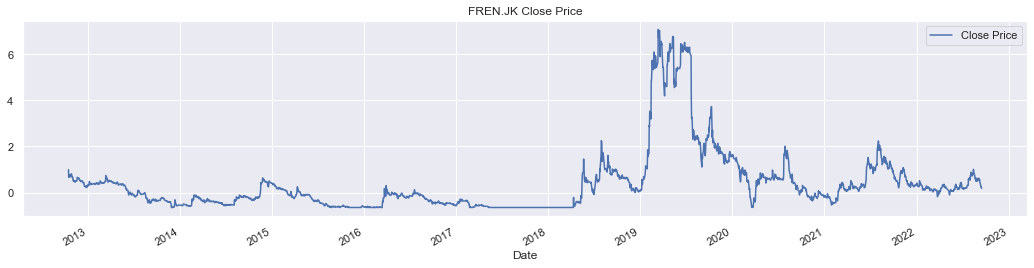

In [3]:
df['Close'].plot(figsize=(18, 4))
plt.legend(['Close Price'])
plt.title('FREN.JK Close Price')
plt.show()

### Split the data
- Split the data into independent variables and target variable
- Split the data into train and test set (80:20)

In [4]:
train_len = int(len(df)*.8)
train_dataset = df[:train_len]
test_dataset = df[train_len:len(df)]

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close')
test_labels = test_features.pop('Close')

## Modeling

### Grid Search to find the best combination of hyperparameters

In [6]:
# ================
# XGBoost regression: 
# Parameters: 
# n_estimators  "Number of gradient boosted trees. Equivalent to number 
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make 
#                the model more complex and more likely to overfit." 
#=========================================================================
regressor = xgb.XGBRegressor(eval_metric='rmse')

#=========================================================================
# exhaustively search for the optimal hyperparameters
#=========================================================================
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5],
              "n_estimators": [500, 600, 700, 1000],
              "learning_rate": [0.01, 0.015],
              "base_score": [0.5],
              "booster": ["gbtree"],
              "early_stopping_rounds": [50]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.52921
[1]	validation_0-rmse:1.51451
[2]	validation_0-rmse:1.49996
[3]	validation_0-rmse:1.48556
[4]	validation_0-rmse:1.47131
[5]	validation_0-rmse:1.45720
[6]	validation_0-rmse:1.44325
[7]	validation_0-rmse:1.42941
[8]	validation_0-rmse:1.41577
[9]	validation_0-rmse:1.40226
[10]	validation_0-rmse:1.38885
[11]	validation_0-rmse:1.37560
[12]	validation_0-rmse:1.36246
[13]	validation_0-rmse:1.34947
[14]	validation_0-rmse:1.33658
[15]	validation_0-rmse:1.32386
[16]	validation_0-rmse:1.31124
[17]	validation_0-rmse:1.29872
[18]	validation_0-rmse:1.28634
[19]	validation_0-rmse:1.27412
[20]	validation_0-rmse:1.26203
[21]	validation_0-rmse:1.25000
[22]	validation_0-rmse:1.23811
[23]	validation_0-rmse:1.22639
[24]	validation_0-rmse:1.21479
[25]	validation_0-rmse:1.20325
[26]	validation_0-rmse:1.19189
[27]	validation_0-rmse:1.18058
[28]	validation_0-rmse:1.16945
[29]	validation_0-rmse:1.15843
[30]	validation_0-rmse:1.14746
[31]	validation_0-rmse:1.13657
[32]	validation_0-

[260]	validation_0-rmse:0.16693
[261]	validation_0-rmse:0.16583
[262]	validation_0-rmse:0.16480
[263]	validation_0-rmse:0.16378
[264]	validation_0-rmse:0.16271
[265]	validation_0-rmse:0.16166
[266]	validation_0-rmse:0.16066
[267]	validation_0-rmse:0.15962
[268]	validation_0-rmse:0.15864
[269]	validation_0-rmse:0.15767
[270]	validation_0-rmse:0.15667
[271]	validation_0-rmse:0.15572
[272]	validation_0-rmse:0.15477
[273]	validation_0-rmse:0.15381
[274]	validation_0-rmse:0.15289
[275]	validation_0-rmse:0.15194
[276]	validation_0-rmse:0.15103
[277]	validation_0-rmse:0.15013
[278]	validation_0-rmse:0.14926
[279]	validation_0-rmse:0.14834
[280]	validation_0-rmse:0.14748
[281]	validation_0-rmse:0.14659
[282]	validation_0-rmse:0.14573
[283]	validation_0-rmse:0.14490
[284]	validation_0-rmse:0.14404
[285]	validation_0-rmse:0.14322
[286]	validation_0-rmse:0.14240
[287]	validation_0-rmse:0.14161
[288]	validation_0-rmse:0.14080
[289]	validation_0-rmse:0.14000
[290]	validation_0-rmse:0.13922
[291]	va

[17]	validation_0-rmse:1.29957
[18]	validation_0-rmse:1.28720
[19]	validation_0-rmse:1.27502
[20]	validation_0-rmse:1.26290
[21]	validation_0-rmse:1.25093
[22]	validation_0-rmse:1.23908
[23]	validation_0-rmse:1.22736
[24]	validation_0-rmse:1.21575
[25]	validation_0-rmse:1.20424
[26]	validation_0-rmse:1.19284
[27]	validation_0-rmse:1.18158
[28]	validation_0-rmse:1.17041
[29]	validation_0-rmse:1.15938
[30]	validation_0-rmse:1.14843
[31]	validation_0-rmse:1.13762
[32]	validation_0-rmse:1.12688
[33]	validation_0-rmse:1.11626
[34]	validation_0-rmse:1.10575
[35]	validation_0-rmse:1.09535
[36]	validation_0-rmse:1.08503
[37]	validation_0-rmse:1.07483
[38]	validation_0-rmse:1.06476
[39]	validation_0-rmse:1.05477
[40]	validation_0-rmse:1.04486
[41]	validation_0-rmse:1.03507
[42]	validation_0-rmse:1.02534
[43]	validation_0-rmse:1.01575
[44]	validation_0-rmse:1.00619
[45]	validation_0-rmse:0.99676
[46]	validation_0-rmse:0.98739
[47]	validation_0-rmse:0.97820
[48]	validation_0-rmse:0.96902
[49]	val

[276]	validation_0-rmse:0.15369
[277]	validation_0-rmse:0.15279
[278]	validation_0-rmse:0.15194
[279]	validation_0-rmse:0.15105
[280]	validation_0-rmse:0.15016
[281]	validation_0-rmse:0.14928
[282]	validation_0-rmse:0.14845
[283]	validation_0-rmse:0.14762
[284]	validation_0-rmse:0.14677
[285]	validation_0-rmse:0.14595
[286]	validation_0-rmse:0.14514
[287]	validation_0-rmse:0.14434
[288]	validation_0-rmse:0.14353
[289]	validation_0-rmse:0.14268
[290]	validation_0-rmse:0.14186
[291]	validation_0-rmse:0.14106
[292]	validation_0-rmse:0.14026
[293]	validation_0-rmse:0.13952
[294]	validation_0-rmse:0.13872
[295]	validation_0-rmse:0.13800
[296]	validation_0-rmse:0.13722
[297]	validation_0-rmse:0.13649
[298]	validation_0-rmse:0.13575
[299]	validation_0-rmse:0.13498
[300]	validation_0-rmse:0.13423
[301]	validation_0-rmse:0.13351
[302]	validation_0-rmse:0.13284
[303]	validation_0-rmse:0.13212
[304]	validation_0-rmse:0.13145
[305]	validation_0-rmse:0.13075
[306]	validation_0-rmse:0.13005
[307]	va

[34]	validation_0-rmse:1.10595
[35]	validation_0-rmse:1.09554
[36]	validation_0-rmse:1.08525
[37]	validation_0-rmse:1.07509
[38]	validation_0-rmse:1.06502
[39]	validation_0-rmse:1.05502
[40]	validation_0-rmse:1.04515
[41]	validation_0-rmse:1.03536
[42]	validation_0-rmse:1.02566
[43]	validation_0-rmse:1.01608
[44]	validation_0-rmse:1.00660
[45]	validation_0-rmse:0.99719
[46]	validation_0-rmse:0.98789
[47]	validation_0-rmse:0.97869
[48]	validation_0-rmse:0.96959
[49]	validation_0-rmse:0.96054
[50]	validation_0-rmse:0.95155
[51]	validation_0-rmse:0.94264
[52]	validation_0-rmse:0.93383
[53]	validation_0-rmse:0.92516
[54]	validation_0-rmse:0.91651
[55]	validation_0-rmse:0.90802
[56]	validation_0-rmse:0.89955
[57]	validation_0-rmse:0.89118
[58]	validation_0-rmse:0.88294
[59]	validation_0-rmse:0.87472
[60]	validation_0-rmse:0.86659
[61]	validation_0-rmse:0.85860
[62]	validation_0-rmse:0.85063
[63]	validation_0-rmse:0.84279
[64]	validation_0-rmse:0.83500
[65]	validation_0-rmse:0.82731
[66]	val

[293]	validation_0-rmse:0.14091
[294]	validation_0-rmse:0.14014
[295]	validation_0-rmse:0.13941
[296]	validation_0-rmse:0.13868
[297]	validation_0-rmse:0.13791
[298]	validation_0-rmse:0.13713
[299]	validation_0-rmse:0.13637
[300]	validation_0-rmse:0.13560
[301]	validation_0-rmse:0.13488
[302]	validation_0-rmse:0.13414
[303]	validation_0-rmse:0.13341
[304]	validation_0-rmse:0.13276
[305]	validation_0-rmse:0.13203
[306]	validation_0-rmse:0.13132
[307]	validation_0-rmse:0.13065
[308]	validation_0-rmse:0.12997
[309]	validation_0-rmse:0.12927
[310]	validation_0-rmse:0.12862
[311]	validation_0-rmse:0.12795
[312]	validation_0-rmse:0.12729
[313]	validation_0-rmse:0.12664
[314]	validation_0-rmse:0.12599
[315]	validation_0-rmse:0.12537
[316]	validation_0-rmse:0.12475
[317]	validation_0-rmse:0.12412
[318]	validation_0-rmse:0.12351
[319]	validation_0-rmse:0.12292
[320]	validation_0-rmse:0.12231
[321]	validation_0-rmse:0.12172
[322]	validation_0-rmse:0.12113
[323]	validation_0-rmse:0.12056
[324]	va

[51]	validation_0-rmse:0.94265
[52]	validation_0-rmse:0.93382
[53]	validation_0-rmse:0.92521
[54]	validation_0-rmse:0.91656
[55]	validation_0-rmse:0.90819
[56]	validation_0-rmse:0.89970
[57]	validation_0-rmse:0.89131
[58]	validation_0-rmse:0.88309
[59]	validation_0-rmse:0.87488
[60]	validation_0-rmse:0.86691
[61]	validation_0-rmse:0.85894
[62]	validation_0-rmse:0.85109
[63]	validation_0-rmse:0.84320
[64]	validation_0-rmse:0.83540
[65]	validation_0-rmse:0.82775
[66]	validation_0-rmse:0.82025
[67]	validation_0-rmse:0.81269
[68]	validation_0-rmse:0.80531
[69]	validation_0-rmse:0.79792
[70]	validation_0-rmse:0.79074
[71]	validation_0-rmse:0.78355
[72]	validation_0-rmse:0.77637
[73]	validation_0-rmse:0.76932
[74]	validation_0-rmse:0.76243
[75]	validation_0-rmse:0.75546
[76]	validation_0-rmse:0.74863
[77]	validation_0-rmse:0.74190
[78]	validation_0-rmse:0.73528
[79]	validation_0-rmse:0.72859
[80]	validation_0-rmse:0.72197
[81]	validation_0-rmse:0.71555
[82]	validation_0-rmse:0.70912
[83]	val

[309]	validation_0-rmse:0.15365
[310]	validation_0-rmse:0.15311
[311]	validation_0-rmse:0.15249
[312]	validation_0-rmse:0.15194
[313]	validation_0-rmse:0.15142
[314]	validation_0-rmse:0.15081
[315]	validation_0-rmse:0.15025
[316]	validation_0-rmse:0.14967
[317]	validation_0-rmse:0.14904
[318]	validation_0-rmse:0.14853
[319]	validation_0-rmse:0.14796
[320]	validation_0-rmse:0.14742
[321]	validation_0-rmse:0.14682
[322]	validation_0-rmse:0.14627
[323]	validation_0-rmse:0.14580
[324]	validation_0-rmse:0.14526
[325]	validation_0-rmse:0.14481
[326]	validation_0-rmse:0.14424
[327]	validation_0-rmse:0.14372
[328]	validation_0-rmse:0.14327
[329]	validation_0-rmse:0.14285
[330]	validation_0-rmse:0.14230
[331]	validation_0-rmse:0.14178
[332]	validation_0-rmse:0.14129
[333]	validation_0-rmse:0.14088
[334]	validation_0-rmse:0.14039
[335]	validation_0-rmse:0.13992
[336]	validation_0-rmse:0.13952
[337]	validation_0-rmse:0.13906
[338]	validation_0-rmse:0.13868
[339]	validation_0-rmse:0.13823
[340]	va

[68]	validation_0-rmse:1.28794
[69]	validation_0-rmse:1.28560
[70]	validation_0-rmse:1.28321
[71]	validation_0-rmse:1.28080
[72]	validation_0-rmse:1.27880
[73]	validation_0-rmse:1.27657
[74]	validation_0-rmse:1.27429
[75]	validation_0-rmse:1.27214
[76]	validation_0-rmse:1.26992
[77]	validation_0-rmse:1.26749
[78]	validation_0-rmse:1.26533
[79]	validation_0-rmse:1.26319
[80]	validation_0-rmse:1.26163
[81]	validation_0-rmse:1.25955
[82]	validation_0-rmse:1.25784
[83]	validation_0-rmse:1.25631
[84]	validation_0-rmse:1.25430
[85]	validation_0-rmse:1.25238
[86]	validation_0-rmse:1.25041
[87]	validation_0-rmse:1.24848
[88]	validation_0-rmse:1.24651
[89]	validation_0-rmse:1.24513
[90]	validation_0-rmse:1.24326
[91]	validation_0-rmse:1.24191
[92]	validation_0-rmse:1.24009
[93]	validation_0-rmse:1.23781
[94]	validation_0-rmse:1.23603
[95]	validation_0-rmse:1.23434
[96]	validation_0-rmse:1.23262
[97]	validation_0-rmse:1.23139
[98]	validation_0-rmse:1.22992
[99]	validation_0-rmse:1.22825
[100]	va

[326]	validation_0-rmse:1.05318
[327]	validation_0-rmse:1.05295
[328]	validation_0-rmse:1.05254
[329]	validation_0-rmse:1.05238
[330]	validation_0-rmse:1.05215
[331]	validation_0-rmse:1.05201
[332]	validation_0-rmse:1.05185
[333]	validation_0-rmse:1.05135
[334]	validation_0-rmse:1.05117
[335]	validation_0-rmse:1.05067
[336]	validation_0-rmse:1.05060
[337]	validation_0-rmse:1.05038
[338]	validation_0-rmse:1.05006
[339]	validation_0-rmse:1.04999
[340]	validation_0-rmse:1.04977
[341]	validation_0-rmse:1.04952
[342]	validation_0-rmse:1.04946
[343]	validation_0-rmse:1.04896
[344]	validation_0-rmse:1.04872
[345]	validation_0-rmse:1.04866
[346]	validation_0-rmse:1.04842
[347]	validation_0-rmse:1.04818
[348]	validation_0-rmse:1.04787
[349]	validation_0-rmse:1.04781
[350]	validation_0-rmse:1.04734
[351]	validation_0-rmse:1.04728
[352]	validation_0-rmse:1.04698
[353]	validation_0-rmse:1.04669
[354]	validation_0-rmse:1.04623
[355]	validation_0-rmse:1.04617
[356]	validation_0-rmse:1.04588
[357]	va

[85]	validation_0-rmse:0.68609
[86]	validation_0-rmse:0.67986
[87]	validation_0-rmse:0.67369
[88]	validation_0-rmse:0.66756
[89]	validation_0-rmse:0.66147
[90]	validation_0-rmse:0.65545
[91]	validation_0-rmse:0.64954
[92]	validation_0-rmse:0.64365
[93]	validation_0-rmse:0.63784
[94]	validation_0-rmse:0.63206
[95]	validation_0-rmse:0.62638
[96]	validation_0-rmse:0.62075
[97]	validation_0-rmse:0.61514
[98]	validation_0-rmse:0.60959
[99]	validation_0-rmse:0.60414
[100]	validation_0-rmse:0.59871
[101]	validation_0-rmse:0.59337
[102]	validation_0-rmse:0.58804
[103]	validation_0-rmse:0.58275
[104]	validation_0-rmse:0.57752
[105]	validation_0-rmse:0.57238
[106]	validation_0-rmse:0.56727
[107]	validation_0-rmse:0.56220
[108]	validation_0-rmse:0.55717
[109]	validation_0-rmse:0.55221
[110]	validation_0-rmse:0.54729
[111]	validation_0-rmse:0.54242
[112]	validation_0-rmse:0.53760
[113]	validation_0-rmse:0.53285
[114]	validation_0-rmse:0.52812
[115]	validation_0-rmse:0.52345
[116]	validation_0-rmse

[342]	validation_0-rmse:0.10759
[343]	validation_0-rmse:0.10712
[344]	validation_0-rmse:0.10669
[345]	validation_0-rmse:0.10626
[346]	validation_0-rmse:0.10584
[347]	validation_0-rmse:0.10541
[348]	validation_0-rmse:0.10497
[349]	validation_0-rmse:0.10453
[350]	validation_0-rmse:0.10413
[351]	validation_0-rmse:0.10372
[352]	validation_0-rmse:0.10331
[353]	validation_0-rmse:0.10291
[354]	validation_0-rmse:0.10252
[355]	validation_0-rmse:0.10211
[356]	validation_0-rmse:0.10169
[357]	validation_0-rmse:0.10132
[358]	validation_0-rmse:0.10096
[359]	validation_0-rmse:0.10058
[360]	validation_0-rmse:0.10018
[361]	validation_0-rmse:0.09981
[362]	validation_0-rmse:0.09943
[363]	validation_0-rmse:0.09907
[364]	validation_0-rmse:0.09870
[365]	validation_0-rmse:0.09832
[366]	validation_0-rmse:0.09799
[367]	validation_0-rmse:0.09763
[368]	validation_0-rmse:0.09730
[369]	validation_0-rmse:0.09693
[370]	validation_0-rmse:0.09659
[371]	validation_0-rmse:0.09626
[372]	validation_0-rmse:0.09593
[373]	va

[599]	validation_0-rmse:0.06316
[0]	validation_0-rmse:1.52928
[1]	validation_0-rmse:1.51465
[2]	validation_0-rmse:1.50017
[3]	validation_0-rmse:1.48584
[4]	validation_0-rmse:1.47165
[5]	validation_0-rmse:1.45761
[6]	validation_0-rmse:1.44371
[7]	validation_0-rmse:1.42995
[8]	validation_0-rmse:1.41633
[9]	validation_0-rmse:1.40283
[10]	validation_0-rmse:1.38949
[11]	validation_0-rmse:1.37626
[12]	validation_0-rmse:1.36319
[13]	validation_0-rmse:1.35022
[14]	validation_0-rmse:1.33741
[15]	validation_0-rmse:1.32467
[16]	validation_0-rmse:1.31205
[17]	validation_0-rmse:1.29957
[18]	validation_0-rmse:1.28720
[19]	validation_0-rmse:1.27502
[20]	validation_0-rmse:1.26290
[21]	validation_0-rmse:1.25093
[22]	validation_0-rmse:1.23908
[23]	validation_0-rmse:1.22736
[24]	validation_0-rmse:1.21575
[25]	validation_0-rmse:1.20424
[26]	validation_0-rmse:1.19284
[27]	validation_0-rmse:1.18158
[28]	validation_0-rmse:1.17041
[29]	validation_0-rmse:1.15938
[30]	validation_0-rmse:1.14843
[31]	validation_0

[259]	validation_0-rmse:0.17054
[260]	validation_0-rmse:0.16944
[261]	validation_0-rmse:0.16840
[262]	validation_0-rmse:0.16735
[263]	validation_0-rmse:0.16629
[264]	validation_0-rmse:0.16526
[265]	validation_0-rmse:0.16423
[266]	validation_0-rmse:0.16322
[267]	validation_0-rmse:0.16223
[268]	validation_0-rmse:0.16123
[269]	validation_0-rmse:0.16024
[270]	validation_0-rmse:0.15927
[271]	validation_0-rmse:0.15833
[272]	validation_0-rmse:0.15734
[273]	validation_0-rmse:0.15641
[274]	validation_0-rmse:0.15550
[275]	validation_0-rmse:0.15458
[276]	validation_0-rmse:0.15369
[277]	validation_0-rmse:0.15279
[278]	validation_0-rmse:0.15194
[279]	validation_0-rmse:0.15105
[280]	validation_0-rmse:0.15016
[281]	validation_0-rmse:0.14928
[282]	validation_0-rmse:0.14845
[283]	validation_0-rmse:0.14762
[284]	validation_0-rmse:0.14677
[285]	validation_0-rmse:0.14595
[286]	validation_0-rmse:0.14514
[287]	validation_0-rmse:0.14434
[288]	validation_0-rmse:0.14353
[289]	validation_0-rmse:0.14268
[290]	va

[516]	validation_0-rmse:0.07204
[517]	validation_0-rmse:0.07196
[518]	validation_0-rmse:0.07188
[519]	validation_0-rmse:0.07178
[520]	validation_0-rmse:0.07170
[521]	validation_0-rmse:0.07162
[522]	validation_0-rmse:0.07154
[523]	validation_0-rmse:0.07146
[524]	validation_0-rmse:0.07138
[525]	validation_0-rmse:0.07128
[526]	validation_0-rmse:0.07121
[527]	validation_0-rmse:0.07113
[528]	validation_0-rmse:0.07101
[529]	validation_0-rmse:0.07093
[530]	validation_0-rmse:0.07086
[531]	validation_0-rmse:0.07078
[532]	validation_0-rmse:0.07070
[533]	validation_0-rmse:0.07064
[534]	validation_0-rmse:0.07055
[535]	validation_0-rmse:0.07048
[536]	validation_0-rmse:0.07042
[537]	validation_0-rmse:0.07034
[538]	validation_0-rmse:0.07024
[539]	validation_0-rmse:0.07016
[540]	validation_0-rmse:0.07010
[541]	validation_0-rmse:0.07002
[542]	validation_0-rmse:0.06992
[543]	validation_0-rmse:0.06985
[544]	validation_0-rmse:0.06978
[545]	validation_0-rmse:0.06971
[546]	validation_0-rmse:0.06962
[547]	va

[176]	validation_0-rmse:0.31407
[177]	validation_0-rmse:0.31153
[178]	validation_0-rmse:0.30902
[179]	validation_0-rmse:0.30661
[180]	validation_0-rmse:0.30414
[181]	validation_0-rmse:0.30172
[182]	validation_0-rmse:0.29935
[183]	validation_0-rmse:0.29696
[184]	validation_0-rmse:0.29460
[185]	validation_0-rmse:0.29234
[186]	validation_0-rmse:0.29002
[187]	validation_0-rmse:0.28774
[188]	validation_0-rmse:0.28554
[189]	validation_0-rmse:0.28334
[190]	validation_0-rmse:0.28119
[191]	validation_0-rmse:0.27898
[192]	validation_0-rmse:0.27689
[193]	validation_0-rmse:0.27473
[194]	validation_0-rmse:0.27263
[195]	validation_0-rmse:0.27053
[196]	validation_0-rmse:0.26850
[197]	validation_0-rmse:0.26646
[198]	validation_0-rmse:0.26449
[199]	validation_0-rmse:0.26246
[200]	validation_0-rmse:0.26046
[201]	validation_0-rmse:0.25848
[202]	validation_0-rmse:0.25658
[203]	validation_0-rmse:0.25465
[204]	validation_0-rmse:0.25277
[205]	validation_0-rmse:0.25094
[206]	validation_0-rmse:0.24900
[207]	va

[433]	validation_0-rmse:0.08261
[434]	validation_0-rmse:0.08243
[435]	validation_0-rmse:0.08222
[436]	validation_0-rmse:0.08203
[437]	validation_0-rmse:0.08185
[438]	validation_0-rmse:0.08166
[439]	validation_0-rmse:0.08148
[440]	validation_0-rmse:0.08129
[441]	validation_0-rmse:0.08111
[442]	validation_0-rmse:0.08094
[443]	validation_0-rmse:0.08076
[444]	validation_0-rmse:0.08058
[445]	validation_0-rmse:0.08041
[446]	validation_0-rmse:0.08023
[447]	validation_0-rmse:0.08007
[448]	validation_0-rmse:0.07990
[449]	validation_0-rmse:0.07974
[450]	validation_0-rmse:0.07957
[451]	validation_0-rmse:0.07940
[452]	validation_0-rmse:0.07924
[453]	validation_0-rmse:0.07907
[454]	validation_0-rmse:0.07892
[455]	validation_0-rmse:0.07878
[456]	validation_0-rmse:0.07861
[457]	validation_0-rmse:0.07847
[458]	validation_0-rmse:0.07831
[459]	validation_0-rmse:0.07812
[460]	validation_0-rmse:0.07796
[461]	validation_0-rmse:0.07777
[462]	validation_0-rmse:0.07761
[463]	validation_0-rmse:0.07744
[464]	va

[93]	validation_0-rmse:0.64217
[94]	validation_0-rmse:0.63641
[95]	validation_0-rmse:0.63085
[96]	validation_0-rmse:0.62533
[97]	validation_0-rmse:0.61974
[98]	validation_0-rmse:0.61432
[99]	validation_0-rmse:0.60884
[100]	validation_0-rmse:0.60356
[101]	validation_0-rmse:0.59823
[102]	validation_0-rmse:0.59292
[103]	validation_0-rmse:0.58766
[104]	validation_0-rmse:0.58257
[105]	validation_0-rmse:0.57742
[106]	validation_0-rmse:0.57238
[107]	validation_0-rmse:0.56734
[108]	validation_0-rmse:0.56235
[109]	validation_0-rmse:0.55750
[110]	validation_0-rmse:0.55261
[111]	validation_0-rmse:0.54779
[112]	validation_0-rmse:0.54312
[113]	validation_0-rmse:0.53847
[114]	validation_0-rmse:0.53377
[115]	validation_0-rmse:0.52916
[116]	validation_0-rmse:0.52466
[117]	validation_0-rmse:0.52012
[118]	validation_0-rmse:0.51565
[119]	validation_0-rmse:0.51130
[120]	validation_0-rmse:0.50691
[121]	validation_0-rmse:0.50256
[122]	validation_0-rmse:0.49832
[123]	validation_0-rmse:0.49408
[124]	validatio

[350]	validation_0-rmse:0.13376
[351]	validation_0-rmse:0.13336
[352]	validation_0-rmse:0.13300
[353]	validation_0-rmse:0.13262
[354]	validation_0-rmse:0.13224
[355]	validation_0-rmse:0.13187
[356]	validation_0-rmse:0.13149
[357]	validation_0-rmse:0.13115
[358]	validation_0-rmse:0.13081
[359]	validation_0-rmse:0.13045
[360]	validation_0-rmse:0.13011
[361]	validation_0-rmse:0.12977
[362]	validation_0-rmse:0.12942
[363]	validation_0-rmse:0.12908
[364]	validation_0-rmse:0.12873
[365]	validation_0-rmse:0.12839
[366]	validation_0-rmse:0.12808
[367]	validation_0-rmse:0.12781
[368]	validation_0-rmse:0.12747
[369]	validation_0-rmse:0.12720
[370]	validation_0-rmse:0.12688
[371]	validation_0-rmse:0.12657
[372]	validation_0-rmse:0.12626
[373]	validation_0-rmse:0.12597
[374]	validation_0-rmse:0.12570
[375]	validation_0-rmse:0.12540
[376]	validation_0-rmse:0.12511
[377]	validation_0-rmse:0.12482
[378]	validation_0-rmse:0.12456
[379]	validation_0-rmse:0.12421
[380]	validation_0-rmse:0.12392
[381]	va

[7]	validation_0-rmse:1.50089
[8]	validation_0-rmse:1.49612
[9]	validation_0-rmse:1.49099
[10]	validation_0-rmse:1.48635
[11]	validation_0-rmse:1.48135
[12]	validation_0-rmse:1.47643
[13]	validation_0-rmse:1.47197
[14]	validation_0-rmse:1.46717
[15]	validation_0-rmse:1.46283
[16]	validation_0-rmse:1.45817
[17]	validation_0-rmse:1.45342
[18]	validation_0-rmse:1.44925
[19]	validation_0-rmse:1.44496
[20]	validation_0-rmse:1.44068
[21]	validation_0-rmse:1.43629
[22]	validation_0-rmse:1.43212
[23]	validation_0-rmse:1.42812
[24]	validation_0-rmse:1.42405
[25]	validation_0-rmse:1.41990
[26]	validation_0-rmse:1.41564
[27]	validation_0-rmse:1.41147
[28]	validation_0-rmse:1.40751
[29]	validation_0-rmse:1.40361
[30]	validation_0-rmse:1.39973
[31]	validation_0-rmse:1.39603
[32]	validation_0-rmse:1.39213
[33]	validation_0-rmse:1.38843
[34]	validation_0-rmse:1.38500
[35]	validation_0-rmse:1.38141
[36]	validation_0-rmse:1.37796
[37]	validation_0-rmse:1.37467
[38]	validation_0-rmse:1.37116
[39]	valida

[267]	validation_0-rmse:1.07279
[268]	validation_0-rmse:1.07226
[269]	validation_0-rmse:1.07170
[270]	validation_0-rmse:1.07129
[271]	validation_0-rmse:1.07099
[272]	validation_0-rmse:1.07052
[273]	validation_0-rmse:1.07023
[274]	validation_0-rmse:1.06972
[275]	validation_0-rmse:1.06947
[276]	validation_0-rmse:1.06897
[277]	validation_0-rmse:1.06874
[278]	validation_0-rmse:1.06829
[279]	validation_0-rmse:1.06804
[280]	validation_0-rmse:1.06756
[281]	validation_0-rmse:1.06729
[282]	validation_0-rmse:1.06696
[283]	validation_0-rmse:1.06673
[284]	validation_0-rmse:1.06626
[285]	validation_0-rmse:1.06603
[286]	validation_0-rmse:1.06561
[287]	validation_0-rmse:1.06514
[288]	validation_0-rmse:1.06493
[289]	validation_0-rmse:1.06452
[290]	validation_0-rmse:1.06397
[291]	validation_0-rmse:1.06376
[292]	validation_0-rmse:1.06335
[293]	validation_0-rmse:1.06314
[294]	validation_0-rmse:1.06261
[295]	validation_0-rmse:1.06207
[296]	validation_0-rmse:1.06186
[297]	validation_0-rmse:1.06165
[298]	va

[524]	validation_0-rmse:1.02625
[525]	validation_0-rmse:1.02624
[526]	validation_0-rmse:1.02619
[527]	validation_0-rmse:1.02619
[528]	validation_0-rmse:1.02613
[529]	validation_0-rmse:1.02601
[530]	validation_0-rmse:1.02600
[531]	validation_0-rmse:1.02596
[532]	validation_0-rmse:1.02590
[533]	validation_0-rmse:1.02578
[534]	validation_0-rmse:1.02571
[535]	validation_0-rmse:1.02570
[536]	validation_0-rmse:1.02564
[537]	validation_0-rmse:1.02558
[538]	validation_0-rmse:1.02558
[539]	validation_0-rmse:1.02555
[540]	validation_0-rmse:1.02554
[541]	validation_0-rmse:1.02535
[542]	validation_0-rmse:1.02534
[543]	validation_0-rmse:1.02530
[544]	validation_0-rmse:1.02526
[545]	validation_0-rmse:1.02526
[546]	validation_0-rmse:1.02521
[547]	validation_0-rmse:1.02517
[548]	validation_0-rmse:1.02511
[549]	validation_0-rmse:1.02507
[550]	validation_0-rmse:1.02506
[551]	validation_0-rmse:1.02505
[552]	validation_0-rmse:1.02505
[553]	validation_0-rmse:1.02487
[554]	validation_0-rmse:1.02485
[555]	va

[184]	validation_0-rmse:0.29101
[185]	validation_0-rmse:0.28869
[186]	validation_0-rmse:0.28638
[187]	validation_0-rmse:0.28411
[188]	validation_0-rmse:0.28185
[189]	validation_0-rmse:0.27961
[190]	validation_0-rmse:0.27742
[191]	validation_0-rmse:0.27525
[192]	validation_0-rmse:0.27310
[193]	validation_0-rmse:0.27096
[194]	validation_0-rmse:0.26884
[195]	validation_0-rmse:0.26674
[196]	validation_0-rmse:0.26466
[197]	validation_0-rmse:0.26260
[198]	validation_0-rmse:0.26061
[199]	validation_0-rmse:0.25859
[200]	validation_0-rmse:0.25660
[201]	validation_0-rmse:0.25463
[202]	validation_0-rmse:0.25267
[203]	validation_0-rmse:0.25076
[204]	validation_0-rmse:0.24888
[205]	validation_0-rmse:0.24699
[206]	validation_0-rmse:0.24510
[207]	validation_0-rmse:0.24327
[208]	validation_0-rmse:0.24146
[209]	validation_0-rmse:0.23964
[210]	validation_0-rmse:0.23779
[211]	validation_0-rmse:0.23595
[212]	validation_0-rmse:0.23420
[213]	validation_0-rmse:0.23247
[214]	validation_0-rmse:0.23067
[215]	va

[441]	validation_0-rmse:0.07954
[442]	validation_0-rmse:0.07937
[443]	validation_0-rmse:0.07921
[444]	validation_0-rmse:0.07905
[445]	validation_0-rmse:0.07888
[446]	validation_0-rmse:0.07872
[447]	validation_0-rmse:0.07856
[448]	validation_0-rmse:0.07840
[449]	validation_0-rmse:0.07824
[450]	validation_0-rmse:0.07809
[451]	validation_0-rmse:0.07794
[452]	validation_0-rmse:0.07778
[453]	validation_0-rmse:0.07763
[454]	validation_0-rmse:0.07748
[455]	validation_0-rmse:0.07735
[456]	validation_0-rmse:0.07718
[457]	validation_0-rmse:0.07704
[458]	validation_0-rmse:0.07689
[459]	validation_0-rmse:0.07675
[460]	validation_0-rmse:0.07661
[461]	validation_0-rmse:0.07646
[462]	validation_0-rmse:0.07634
[463]	validation_0-rmse:0.07621
[464]	validation_0-rmse:0.07606
[465]	validation_0-rmse:0.07590
[466]	validation_0-rmse:0.07577
[467]	validation_0-rmse:0.07564
[468]	validation_0-rmse:0.07550
[469]	validation_0-rmse:0.07535
[470]	validation_0-rmse:0.07523
[471]	validation_0-rmse:0.07508
[472]	va

[698]	validation_0-rmse:0.05849
[699]	validation_0-rmse:0.05846
[0]	validation_0-rmse:1.52928
[1]	validation_0-rmse:1.51465
[2]	validation_0-rmse:1.50017
[3]	validation_0-rmse:1.48584
[4]	validation_0-rmse:1.47165
[5]	validation_0-rmse:1.45761
[6]	validation_0-rmse:1.44371
[7]	validation_0-rmse:1.42995
[8]	validation_0-rmse:1.41633
[9]	validation_0-rmse:1.40283
[10]	validation_0-rmse:1.38949
[11]	validation_0-rmse:1.37626
[12]	validation_0-rmse:1.36319
[13]	validation_0-rmse:1.35022
[14]	validation_0-rmse:1.33741
[15]	validation_0-rmse:1.32467
[16]	validation_0-rmse:1.31205
[17]	validation_0-rmse:1.29957
[18]	validation_0-rmse:1.28720
[19]	validation_0-rmse:1.27502
[20]	validation_0-rmse:1.26290
[21]	validation_0-rmse:1.25093
[22]	validation_0-rmse:1.23908
[23]	validation_0-rmse:1.22736
[24]	validation_0-rmse:1.21575
[25]	validation_0-rmse:1.20424
[26]	validation_0-rmse:1.19284
[27]	validation_0-rmse:1.18158
[28]	validation_0-rmse:1.17041
[29]	validation_0-rmse:1.15938
[30]	validation_

[258]	validation_0-rmse:0.17164
[259]	validation_0-rmse:0.17054
[260]	validation_0-rmse:0.16944
[261]	validation_0-rmse:0.16840
[262]	validation_0-rmse:0.16735
[263]	validation_0-rmse:0.16629
[264]	validation_0-rmse:0.16526
[265]	validation_0-rmse:0.16423
[266]	validation_0-rmse:0.16322
[267]	validation_0-rmse:0.16223
[268]	validation_0-rmse:0.16123
[269]	validation_0-rmse:0.16024
[270]	validation_0-rmse:0.15927
[271]	validation_0-rmse:0.15833
[272]	validation_0-rmse:0.15734
[273]	validation_0-rmse:0.15641
[274]	validation_0-rmse:0.15550
[275]	validation_0-rmse:0.15458
[276]	validation_0-rmse:0.15369
[277]	validation_0-rmse:0.15279
[278]	validation_0-rmse:0.15194
[279]	validation_0-rmse:0.15105
[280]	validation_0-rmse:0.15016
[281]	validation_0-rmse:0.14928
[282]	validation_0-rmse:0.14845
[283]	validation_0-rmse:0.14762
[284]	validation_0-rmse:0.14677
[285]	validation_0-rmse:0.14595
[286]	validation_0-rmse:0.14514
[287]	validation_0-rmse:0.14434
[288]	validation_0-rmse:0.14353
[289]	va

[515]	validation_0-rmse:0.07213
[516]	validation_0-rmse:0.07204
[517]	validation_0-rmse:0.07196
[518]	validation_0-rmse:0.07188
[519]	validation_0-rmse:0.07178
[520]	validation_0-rmse:0.07170
[521]	validation_0-rmse:0.07162
[522]	validation_0-rmse:0.07154
[523]	validation_0-rmse:0.07146
[524]	validation_0-rmse:0.07138
[525]	validation_0-rmse:0.07128
[526]	validation_0-rmse:0.07121
[527]	validation_0-rmse:0.07113
[528]	validation_0-rmse:0.07101
[529]	validation_0-rmse:0.07093
[530]	validation_0-rmse:0.07086
[531]	validation_0-rmse:0.07078
[532]	validation_0-rmse:0.07070
[533]	validation_0-rmse:0.07064
[534]	validation_0-rmse:0.07055
[535]	validation_0-rmse:0.07048
[536]	validation_0-rmse:0.07042
[537]	validation_0-rmse:0.07034
[538]	validation_0-rmse:0.07024
[539]	validation_0-rmse:0.07016
[540]	validation_0-rmse:0.07010
[541]	validation_0-rmse:0.07002
[542]	validation_0-rmse:0.06992
[543]	validation_0-rmse:0.06985
[544]	validation_0-rmse:0.06978
[545]	validation_0-rmse:0.06971
[546]	va

[74]	validation_0-rmse:0.76138
[75]	validation_0-rmse:0.75441
[76]	validation_0-rmse:0.74753
[77]	validation_0-rmse:0.74070
[78]	validation_0-rmse:0.73395
[79]	validation_0-rmse:0.72725
[80]	validation_0-rmse:0.72062
[81]	validation_0-rmse:0.71408
[82]	validation_0-rmse:0.70758
[83]	validation_0-rmse:0.70118
[84]	validation_0-rmse:0.69482
[85]	validation_0-rmse:0.68853
[86]	validation_0-rmse:0.68231
[87]	validation_0-rmse:0.67613
[88]	validation_0-rmse:0.67003
[89]	validation_0-rmse:0.66400
[90]	validation_0-rmse:0.65797
[91]	validation_0-rmse:0.65207
[92]	validation_0-rmse:0.64621
[93]	validation_0-rmse:0.64040
[94]	validation_0-rmse:0.63467
[95]	validation_0-rmse:0.62894
[96]	validation_0-rmse:0.62325
[97]	validation_0-rmse:0.61763
[98]	validation_0-rmse:0.61213
[99]	validation_0-rmse:0.60662
[100]	validation_0-rmse:0.60121
[101]	validation_0-rmse:0.59588
[102]	validation_0-rmse:0.59057
[103]	validation_0-rmse:0.58528
[104]	validation_0-rmse:0.58007
[105]	validation_0-rmse:0.57487
[1

[331]	validation_0-rmse:0.11617
[332]	validation_0-rmse:0.11563
[333]	validation_0-rmse:0.11510
[334]	validation_0-rmse:0.11459
[335]	validation_0-rmse:0.11408
[336]	validation_0-rmse:0.11359
[337]	validation_0-rmse:0.11310
[338]	validation_0-rmse:0.11261
[339]	validation_0-rmse:0.11213
[340]	validation_0-rmse:0.11164
[341]	validation_0-rmse:0.11119
[342]	validation_0-rmse:0.11070
[343]	validation_0-rmse:0.11025
[344]	validation_0-rmse:0.10979
[345]	validation_0-rmse:0.10932
[346]	validation_0-rmse:0.10885
[347]	validation_0-rmse:0.10842
[348]	validation_0-rmse:0.10793
[349]	validation_0-rmse:0.10747
[350]	validation_0-rmse:0.10702
[351]	validation_0-rmse:0.10657
[352]	validation_0-rmse:0.10618
[353]	validation_0-rmse:0.10574
[354]	validation_0-rmse:0.10532
[355]	validation_0-rmse:0.10488
[356]	validation_0-rmse:0.10446
[357]	validation_0-rmse:0.10404
[358]	validation_0-rmse:0.10362
[359]	validation_0-rmse:0.10324
[360]	validation_0-rmse:0.10283
[361]	validation_0-rmse:0.10246
[362]	va

[588]	validation_0-rmse:0.06389
[589]	validation_0-rmse:0.06383
[590]	validation_0-rmse:0.06374
[591]	validation_0-rmse:0.06368
[592]	validation_0-rmse:0.06360
[593]	validation_0-rmse:0.06353
[594]	validation_0-rmse:0.06347
[595]	validation_0-rmse:0.06341
[596]	validation_0-rmse:0.06334
[597]	validation_0-rmse:0.06327
[598]	validation_0-rmse:0.06321
[599]	validation_0-rmse:0.06315
[600]	validation_0-rmse:0.06309
[601]	validation_0-rmse:0.06301
[602]	validation_0-rmse:0.06296
[603]	validation_0-rmse:0.06290
[604]	validation_0-rmse:0.06283
[605]	validation_0-rmse:0.06275
[606]	validation_0-rmse:0.06269
[607]	validation_0-rmse:0.06263
[608]	validation_0-rmse:0.06257
[609]	validation_0-rmse:0.06251
[610]	validation_0-rmse:0.06244
[611]	validation_0-rmse:0.06238
[612]	validation_0-rmse:0.06232
[613]	validation_0-rmse:0.06226
[614]	validation_0-rmse:0.06220
[615]	validation_0-rmse:0.06213
[616]	validation_0-rmse:0.06207
[617]	validation_0-rmse:0.06202
[618]	validation_0-rmse:0.06193
[619]	va

[148]	validation_0-rmse:0.40257
[149]	validation_0-rmse:0.39942
[150]	validation_0-rmse:0.39627
[151]	validation_0-rmse:0.39317
[152]	validation_0-rmse:0.39008
[153]	validation_0-rmse:0.38707
[154]	validation_0-rmse:0.38406
[155]	validation_0-rmse:0.38109
[156]	validation_0-rmse:0.37815
[157]	validation_0-rmse:0.37528
[158]	validation_0-rmse:0.37240
[159]	validation_0-rmse:0.36960
[160]	validation_0-rmse:0.36677
[161]	validation_0-rmse:0.36399
[162]	validation_0-rmse:0.36127
[163]	validation_0-rmse:0.35852
[164]	validation_0-rmse:0.35579
[165]	validation_0-rmse:0.35309
[166]	validation_0-rmse:0.35039
[167]	validation_0-rmse:0.34775
[168]	validation_0-rmse:0.34515
[169]	validation_0-rmse:0.34258
[170]	validation_0-rmse:0.34002
[171]	validation_0-rmse:0.33749
[172]	validation_0-rmse:0.33498
[173]	validation_0-rmse:0.33251
[174]	validation_0-rmse:0.33007
[175]	validation_0-rmse:0.32761
[176]	validation_0-rmse:0.32523
[177]	validation_0-rmse:0.32284
[178]	validation_0-rmse:0.32048
[179]	va

[405]	validation_0-rmse:0.11777
[406]	validation_0-rmse:0.11758
[407]	validation_0-rmse:0.11739
[408]	validation_0-rmse:0.11718
[409]	validation_0-rmse:0.11696
[410]	validation_0-rmse:0.11676
[411]	validation_0-rmse:0.11654
[412]	validation_0-rmse:0.11634
[413]	validation_0-rmse:0.11612
[414]	validation_0-rmse:0.11595
[415]	validation_0-rmse:0.11578
[416]	validation_0-rmse:0.11560
[417]	validation_0-rmse:0.11539
[418]	validation_0-rmse:0.11521
[419]	validation_0-rmse:0.11502
[420]	validation_0-rmse:0.11486
[421]	validation_0-rmse:0.11469
[422]	validation_0-rmse:0.11446
[423]	validation_0-rmse:0.11428
[424]	validation_0-rmse:0.11411
[425]	validation_0-rmse:0.11393
[426]	validation_0-rmse:0.11374
[427]	validation_0-rmse:0.11359
[428]	validation_0-rmse:0.11337
[429]	validation_0-rmse:0.11320
[430]	validation_0-rmse:0.11301
[431]	validation_0-rmse:0.11286
[432]	validation_0-rmse:0.11266
[433]	validation_0-rmse:0.11246
[434]	validation_0-rmse:0.11227
[435]	validation_0-rmse:0.11209
[436]	va

[662]	validation_0-rmse:0.09296
[663]	validation_0-rmse:0.09293
[664]	validation_0-rmse:0.09291
[665]	validation_0-rmse:0.09287
[666]	validation_0-rmse:0.09284
[667]	validation_0-rmse:0.09276
[668]	validation_0-rmse:0.09274
[669]	validation_0-rmse:0.09269
[670]	validation_0-rmse:0.09265
[671]	validation_0-rmse:0.09262
[672]	validation_0-rmse:0.09259
[673]	validation_0-rmse:0.09254
[674]	validation_0-rmse:0.09251
[675]	validation_0-rmse:0.09249
[676]	validation_0-rmse:0.09244
[677]	validation_0-rmse:0.09241
[678]	validation_0-rmse:0.09236
[679]	validation_0-rmse:0.09232
[680]	validation_0-rmse:0.09228
[681]	validation_0-rmse:0.09224
[682]	validation_0-rmse:0.09220
[683]	validation_0-rmse:0.09215
[684]	validation_0-rmse:0.09212
[685]	validation_0-rmse:0.09207
[686]	validation_0-rmse:0.09203
[687]	validation_0-rmse:0.09199
[688]	validation_0-rmse:0.09194
[689]	validation_0-rmse:0.09191
[690]	validation_0-rmse:0.09187
[691]	validation_0-rmse:0.09183
[692]	validation_0-rmse:0.09179
[693]	va

[222]	validation_0-rmse:1.10046
[223]	validation_0-rmse:1.09900
[224]	validation_0-rmse:1.09869
[225]	validation_0-rmse:1.09726
[226]	validation_0-rmse:1.09583
[227]	validation_0-rmse:1.09553
[228]	validation_0-rmse:1.09413
[229]	validation_0-rmse:1.09382
[230]	validation_0-rmse:1.09244
[231]	validation_0-rmse:1.09201
[232]	validation_0-rmse:1.09175
[233]	validation_0-rmse:1.09041
[234]	validation_0-rmse:1.09012
[235]	validation_0-rmse:1.08958
[236]	validation_0-rmse:1.08920
[237]	validation_0-rmse:1.08860
[238]	validation_0-rmse:1.08801
[239]	validation_0-rmse:1.08772
[240]	validation_0-rmse:1.08714
[241]	validation_0-rmse:1.08656
[242]	validation_0-rmse:1.08530
[243]	validation_0-rmse:1.08502
[244]	validation_0-rmse:1.08446
[245]	validation_0-rmse:1.08390
[246]	validation_0-rmse:1.08333
[247]	validation_0-rmse:1.08298
[248]	validation_0-rmse:1.08244
[249]	validation_0-rmse:1.08210
[250]	validation_0-rmse:1.08150
[251]	validation_0-rmse:1.08095
[252]	validation_0-rmse:1.08026
[253]	va

[479]	validation_0-rmse:1.02915
[480]	validation_0-rmse:1.02899
[481]	validation_0-rmse:1.02896
[482]	validation_0-rmse:1.02880
[483]	validation_0-rmse:1.02877
[484]	validation_0-rmse:1.02871
[485]	validation_0-rmse:1.02869
[486]	validation_0-rmse:1.02854
[487]	validation_0-rmse:1.02846
[488]	validation_0-rmse:1.02844
[489]	validation_0-rmse:1.02829
[490]	validation_0-rmse:1.02828
[491]	validation_0-rmse:1.02821
[492]	validation_0-rmse:1.02814
[493]	validation_0-rmse:1.02811
[494]	validation_0-rmse:1.02796
[495]	validation_0-rmse:1.02789
[496]	validation_0-rmse:1.02789
[497]	validation_0-rmse:1.02774
[498]	validation_0-rmse:1.02768
[499]	validation_0-rmse:1.02753
[500]	validation_0-rmse:1.02746
[501]	validation_0-rmse:1.02746
[502]	validation_0-rmse:1.02746
[503]	validation_0-rmse:1.02732
[504]	validation_0-rmse:1.02732
[505]	validation_0-rmse:1.02727
[506]	validation_0-rmse:1.02727
[507]	validation_0-rmse:1.02714
[508]	validation_0-rmse:1.02701
[509]	validation_0-rmse:1.02700
[510]	va

[37]	validation_0-rmse:1.07380
[38]	validation_0-rmse:1.06367
[39]	validation_0-rmse:1.05372
[40]	validation_0-rmse:1.04378
[41]	validation_0-rmse:1.03392
[42]	validation_0-rmse:1.02418
[43]	validation_0-rmse:1.01451
[44]	validation_0-rmse:1.00497
[45]	validation_0-rmse:0.99552
[46]	validation_0-rmse:0.98615
[47]	validation_0-rmse:0.97689
[48]	validation_0-rmse:0.96775
[49]	validation_0-rmse:0.95864
[50]	validation_0-rmse:0.94966
[51]	validation_0-rmse:0.94073
[52]	validation_0-rmse:0.93193
[53]	validation_0-rmse:0.92320
[54]	validation_0-rmse:0.91457
[55]	validation_0-rmse:0.90603
[56]	validation_0-rmse:0.89754
[57]	validation_0-rmse:0.88918
[58]	validation_0-rmse:0.88087
[59]	validation_0-rmse:0.87267
[60]	validation_0-rmse:0.86453
[61]	validation_0-rmse:0.85650
[62]	validation_0-rmse:0.84851
[63]	validation_0-rmse:0.84070
[64]	validation_0-rmse:0.83291
[65]	validation_0-rmse:0.82517
[66]	validation_0-rmse:0.81753
[67]	validation_0-rmse:0.80996
[68]	validation_0-rmse:0.80247
[69]	val

[295]	validation_0-rmse:0.13532
[296]	validation_0-rmse:0.13458
[297]	validation_0-rmse:0.13385
[298]	validation_0-rmse:0.13312
[299]	validation_0-rmse:0.13239
[300]	validation_0-rmse:0.13168
[301]	validation_0-rmse:0.13095
[302]	validation_0-rmse:0.13025
[303]	validation_0-rmse:0.12958
[304]	validation_0-rmse:0.12889
[305]	validation_0-rmse:0.12823
[306]	validation_0-rmse:0.12755
[307]	validation_0-rmse:0.12688
[308]	validation_0-rmse:0.12622
[309]	validation_0-rmse:0.12557
[310]	validation_0-rmse:0.12491
[311]	validation_0-rmse:0.12427
[312]	validation_0-rmse:0.12364
[313]	validation_0-rmse:0.12302
[314]	validation_0-rmse:0.12241
[315]	validation_0-rmse:0.12181
[316]	validation_0-rmse:0.12121
[317]	validation_0-rmse:0.12059
[318]	validation_0-rmse:0.12000
[319]	validation_0-rmse:0.11942
[320]	validation_0-rmse:0.11885
[321]	validation_0-rmse:0.11826
[322]	validation_0-rmse:0.11770
[323]	validation_0-rmse:0.11715
[324]	validation_0-rmse:0.11661
[325]	validation_0-rmse:0.11603
[326]	va

[552]	validation_0-rmse:0.06623
[553]	validation_0-rmse:0.06616
[554]	validation_0-rmse:0.06610
[555]	validation_0-rmse:0.06603
[556]	validation_0-rmse:0.06596
[557]	validation_0-rmse:0.06589
[558]	validation_0-rmse:0.06582
[559]	validation_0-rmse:0.06576
[560]	validation_0-rmse:0.06568
[561]	validation_0-rmse:0.06557
[562]	validation_0-rmse:0.06550
[563]	validation_0-rmse:0.06543
[564]	validation_0-rmse:0.06538
[565]	validation_0-rmse:0.06531
[566]	validation_0-rmse:0.06524
[567]	validation_0-rmse:0.06518
[568]	validation_0-rmse:0.06512
[569]	validation_0-rmse:0.06505
[570]	validation_0-rmse:0.06500
[571]	validation_0-rmse:0.06493
[572]	validation_0-rmse:0.06487
[573]	validation_0-rmse:0.06478
[574]	validation_0-rmse:0.06472
[575]	validation_0-rmse:0.06466
[576]	validation_0-rmse:0.06461
[577]	validation_0-rmse:0.06453
[578]	validation_0-rmse:0.06442
[579]	validation_0-rmse:0.06436
[580]	validation_0-rmse:0.06430
[581]	validation_0-rmse:0.06426
[582]	validation_0-rmse:0.06420
[583]	va

[809]	validation_0-rmse:0.05502
[810]	validation_0-rmse:0.05500
[811]	validation_0-rmse:0.05499
[812]	validation_0-rmse:0.05494
[813]	validation_0-rmse:0.05494
[814]	validation_0-rmse:0.05490
[815]	validation_0-rmse:0.05487
[816]	validation_0-rmse:0.05482
[817]	validation_0-rmse:0.05481
[818]	validation_0-rmse:0.05478
[819]	validation_0-rmse:0.05476
[820]	validation_0-rmse:0.05472
[821]	validation_0-rmse:0.05469
[822]	validation_0-rmse:0.05468
[823]	validation_0-rmse:0.05467
[824]	validation_0-rmse:0.05463
[825]	validation_0-rmse:0.05463
[826]	validation_0-rmse:0.05458
[827]	validation_0-rmse:0.05457
[828]	validation_0-rmse:0.05456
[829]	validation_0-rmse:0.05454
[830]	validation_0-rmse:0.05453
[831]	validation_0-rmse:0.05452
[832]	validation_0-rmse:0.05449
[833]	validation_0-rmse:0.05445
[834]	validation_0-rmse:0.05442
[835]	validation_0-rmse:0.05438
[836]	validation_0-rmse:0.05434
[837]	validation_0-rmse:0.05430
[838]	validation_0-rmse:0.05425
[839]	validation_0-rmse:0.05425
[840]	va

[68]	validation_0-rmse:0.80399
[69]	validation_0-rmse:0.79660
[70]	validation_0-rmse:0.78928
[71]	validation_0-rmse:0.78202
[72]	validation_0-rmse:0.77482
[73]	validation_0-rmse:0.76772
[74]	validation_0-rmse:0.76067
[75]	validation_0-rmse:0.75371
[76]	validation_0-rmse:0.74679
[77]	validation_0-rmse:0.73996
[78]	validation_0-rmse:0.73321
[79]	validation_0-rmse:0.72650
[80]	validation_0-rmse:0.71989
[81]	validation_0-rmse:0.71332
[82]	validation_0-rmse:0.70685
[83]	validation_0-rmse:0.70041
[84]	validation_0-rmse:0.69407
[85]	validation_0-rmse:0.68775
[86]	validation_0-rmse:0.68152
[87]	validation_0-rmse:0.67535
[88]	validation_0-rmse:0.66923
[89]	validation_0-rmse:0.66320
[90]	validation_0-rmse:0.65721
[91]	validation_0-rmse:0.65128
[92]	validation_0-rmse:0.64541
[93]	validation_0-rmse:0.63955
[94]	validation_0-rmse:0.63375
[95]	validation_0-rmse:0.62806
[96]	validation_0-rmse:0.62237
[97]	validation_0-rmse:0.61678
[98]	validation_0-rmse:0.61126
[99]	validation_0-rmse:0.60579
[100]	va

[326]	validation_0-rmse:0.11782
[327]	validation_0-rmse:0.11728
[328]	validation_0-rmse:0.11674
[329]	validation_0-rmse:0.11618
[330]	validation_0-rmse:0.11566
[331]	validation_0-rmse:0.11518
[332]	validation_0-rmse:0.11466
[333]	validation_0-rmse:0.11414
[334]	validation_0-rmse:0.11364
[335]	validation_0-rmse:0.11312
[336]	validation_0-rmse:0.11261
[337]	validation_0-rmse:0.11212
[338]	validation_0-rmse:0.11165
[339]	validation_0-rmse:0.11115
[340]	validation_0-rmse:0.11067
[341]	validation_0-rmse:0.11020
[342]	validation_0-rmse:0.10973
[343]	validation_0-rmse:0.10928
[344]	validation_0-rmse:0.10883
[345]	validation_0-rmse:0.10836
[346]	validation_0-rmse:0.10793
[347]	validation_0-rmse:0.10746
[348]	validation_0-rmse:0.10704
[349]	validation_0-rmse:0.10659
[350]	validation_0-rmse:0.10618
[351]	validation_0-rmse:0.10576
[352]	validation_0-rmse:0.10535
[353]	validation_0-rmse:0.10492
[354]	validation_0-rmse:0.10451
[355]	validation_0-rmse:0.10412
[356]	validation_0-rmse:0.10373
[357]	va

[583]	validation_0-rmse:0.06711
[584]	validation_0-rmse:0.06706
[585]	validation_0-rmse:0.06700
[586]	validation_0-rmse:0.06696
[587]	validation_0-rmse:0.06689
[588]	validation_0-rmse:0.06682
[589]	validation_0-rmse:0.06676
[590]	validation_0-rmse:0.06668
[591]	validation_0-rmse:0.06663
[592]	validation_0-rmse:0.06658
[593]	validation_0-rmse:0.06652
[594]	validation_0-rmse:0.06648
[595]	validation_0-rmse:0.06642
[596]	validation_0-rmse:0.06635
[597]	validation_0-rmse:0.06629
[598]	validation_0-rmse:0.06624
[599]	validation_0-rmse:0.06618
[600]	validation_0-rmse:0.06613
[601]	validation_0-rmse:0.06606
[602]	validation_0-rmse:0.06601
[603]	validation_0-rmse:0.06594
[604]	validation_0-rmse:0.06589
[605]	validation_0-rmse:0.06584
[606]	validation_0-rmse:0.06579
[607]	validation_0-rmse:0.06574
[608]	validation_0-rmse:0.06569
[609]	validation_0-rmse:0.06565
[610]	validation_0-rmse:0.06559
[611]	validation_0-rmse:0.06554
[612]	validation_0-rmse:0.06550
[613]	validation_0-rmse:0.06544
[614]	va

[840]	validation_0-rmse:0.05888
[841]	validation_0-rmse:0.05886
[842]	validation_0-rmse:0.05883
[843]	validation_0-rmse:0.05882
[844]	validation_0-rmse:0.05880
[845]	validation_0-rmse:0.05879
[846]	validation_0-rmse:0.05876
[847]	validation_0-rmse:0.05874
[848]	validation_0-rmse:0.05872
[849]	validation_0-rmse:0.05868
[850]	validation_0-rmse:0.05868
[851]	validation_0-rmse:0.05865
[852]	validation_0-rmse:0.05863
[853]	validation_0-rmse:0.05861
[854]	validation_0-rmse:0.05858
[855]	validation_0-rmse:0.05855
[856]	validation_0-rmse:0.05854
[857]	validation_0-rmse:0.05853
[858]	validation_0-rmse:0.05850
[859]	validation_0-rmse:0.05847
[860]	validation_0-rmse:0.05847
[861]	validation_0-rmse:0.05844
[862]	validation_0-rmse:0.05843
[863]	validation_0-rmse:0.05840
[864]	validation_0-rmse:0.05839
[865]	validation_0-rmse:0.05838
[866]	validation_0-rmse:0.05835
[867]	validation_0-rmse:0.05833
[868]	validation_0-rmse:0.05830
[869]	validation_0-rmse:0.05829
[870]	validation_0-rmse:0.05828
[871]	va

[100]	validation_0-rmse:0.60121
[101]	validation_0-rmse:0.59588
[102]	validation_0-rmse:0.59057
[103]	validation_0-rmse:0.58528
[104]	validation_0-rmse:0.58007
[105]	validation_0-rmse:0.57487
[106]	validation_0-rmse:0.56974
[107]	validation_0-rmse:0.56464
[108]	validation_0-rmse:0.55967
[109]	validation_0-rmse:0.55472
[110]	validation_0-rmse:0.54979
[111]	validation_0-rmse:0.54488
[112]	validation_0-rmse:0.54011
[113]	validation_0-rmse:0.53533
[114]	validation_0-rmse:0.53057
[115]	validation_0-rmse:0.52590
[116]	validation_0-rmse:0.52129
[117]	validation_0-rmse:0.51668
[118]	validation_0-rmse:0.51211
[119]	validation_0-rmse:0.50759
[120]	validation_0-rmse:0.50314
[121]	validation_0-rmse:0.49877
[122]	validation_0-rmse:0.49439
[123]	validation_0-rmse:0.49009
[124]	validation_0-rmse:0.48585
[125]	validation_0-rmse:0.48161
[126]	validation_0-rmse:0.47740
[127]	validation_0-rmse:0.47326
[128]	validation_0-rmse:0.46916
[129]	validation_0-rmse:0.46513
[130]	validation_0-rmse:0.46111
[131]	va

[357]	validation_0-rmse:0.10404
[358]	validation_0-rmse:0.10362
[359]	validation_0-rmse:0.10324
[360]	validation_0-rmse:0.10283
[361]	validation_0-rmse:0.10246
[362]	validation_0-rmse:0.10206
[363]	validation_0-rmse:0.10166
[364]	validation_0-rmse:0.10130
[365]	validation_0-rmse:0.10092
[366]	validation_0-rmse:0.10055
[367]	validation_0-rmse:0.10018
[368]	validation_0-rmse:0.09983
[369]	validation_0-rmse:0.09946
[370]	validation_0-rmse:0.09910
[371]	validation_0-rmse:0.09876
[372]	validation_0-rmse:0.09841
[373]	validation_0-rmse:0.09806
[374]	validation_0-rmse:0.09772
[375]	validation_0-rmse:0.09738
[376]	validation_0-rmse:0.09704
[377]	validation_0-rmse:0.09669
[378]	validation_0-rmse:0.09638
[379]	validation_0-rmse:0.09605
[380]	validation_0-rmse:0.09573
[381]	validation_0-rmse:0.09541
[382]	validation_0-rmse:0.09511
[383]	validation_0-rmse:0.09479
[384]	validation_0-rmse:0.09448
[385]	validation_0-rmse:0.09417
[386]	validation_0-rmse:0.09387
[387]	validation_0-rmse:0.09359
[388]	va

[614]	validation_0-rmse:0.06220
[615]	validation_0-rmse:0.06213
[616]	validation_0-rmse:0.06207
[617]	validation_0-rmse:0.06202
[618]	validation_0-rmse:0.06193
[619]	validation_0-rmse:0.06187
[620]	validation_0-rmse:0.06182
[621]	validation_0-rmse:0.06176
[622]	validation_0-rmse:0.06167
[623]	validation_0-rmse:0.06162
[624]	validation_0-rmse:0.06153
[625]	validation_0-rmse:0.06148
[626]	validation_0-rmse:0.06140
[627]	validation_0-rmse:0.06134
[628]	validation_0-rmse:0.06128
[629]	validation_0-rmse:0.06122
[630]	validation_0-rmse:0.06117
[631]	validation_0-rmse:0.06112
[632]	validation_0-rmse:0.06106
[633]	validation_0-rmse:0.06098
[634]	validation_0-rmse:0.06093
[635]	validation_0-rmse:0.06085
[636]	validation_0-rmse:0.06079
[637]	validation_0-rmse:0.06073
[638]	validation_0-rmse:0.06068
[639]	validation_0-rmse:0.06063
[640]	validation_0-rmse:0.06058
[641]	validation_0-rmse:0.06053
[642]	validation_0-rmse:0.06046
[643]	validation_0-rmse:0.06041
[644]	validation_0-rmse:0.06034
[645]	va

[871]	validation_0-rmse:0.05216
[872]	validation_0-rmse:0.05214
[873]	validation_0-rmse:0.05211
[874]	validation_0-rmse:0.05208
[875]	validation_0-rmse:0.05205
[876]	validation_0-rmse:0.05203
[877]	validation_0-rmse:0.05202
[878]	validation_0-rmse:0.05199
[879]	validation_0-rmse:0.05197
[880]	validation_0-rmse:0.05195
[881]	validation_0-rmse:0.05192
[882]	validation_0-rmse:0.05191
[883]	validation_0-rmse:0.05188
[884]	validation_0-rmse:0.05185
[885]	validation_0-rmse:0.05184
[886]	validation_0-rmse:0.05181
[887]	validation_0-rmse:0.05179
[888]	validation_0-rmse:0.05177
[889]	validation_0-rmse:0.05174
[890]	validation_0-rmse:0.05170
[891]	validation_0-rmse:0.05168
[892]	validation_0-rmse:0.05165
[893]	validation_0-rmse:0.05161
[894]	validation_0-rmse:0.05158
[895]	validation_0-rmse:0.05155
[896]	validation_0-rmse:0.05154
[897]	validation_0-rmse:0.05153
[898]	validation_0-rmse:0.05151
[899]	validation_0-rmse:0.05149
[900]	validation_0-rmse:0.05146
[901]	validation_0-rmse:0.05144
[902]	va

[131]	validation_0-rmse:0.46200
[132]	validation_0-rmse:0.45821
[133]	validation_0-rmse:0.45439
[134]	validation_0-rmse:0.45070
[135]	validation_0-rmse:0.44698
[136]	validation_0-rmse:0.44338
[137]	validation_0-rmse:0.43977
[138]	validation_0-rmse:0.43620
[139]	validation_0-rmse:0.43269
[140]	validation_0-rmse:0.42924
[141]	validation_0-rmse:0.42575
[142]	validation_0-rmse:0.42238
[143]	validation_0-rmse:0.41901
[144]	validation_0-rmse:0.41563
[145]	validation_0-rmse:0.41230
[146]	validation_0-rmse:0.40897
[147]	validation_0-rmse:0.40574
[148]	validation_0-rmse:0.40257
[149]	validation_0-rmse:0.39942
[150]	validation_0-rmse:0.39627
[151]	validation_0-rmse:0.39317
[152]	validation_0-rmse:0.39008
[153]	validation_0-rmse:0.38707
[154]	validation_0-rmse:0.38406
[155]	validation_0-rmse:0.38109
[156]	validation_0-rmse:0.37815
[157]	validation_0-rmse:0.37528
[158]	validation_0-rmse:0.37240
[159]	validation_0-rmse:0.36960
[160]	validation_0-rmse:0.36677
[161]	validation_0-rmse:0.36399
[162]	va

[388]	validation_0-rmse:0.12179
[389]	validation_0-rmse:0.12156
[390]	validation_0-rmse:0.12124
[391]	validation_0-rmse:0.12099
[392]	validation_0-rmse:0.12077
[393]	validation_0-rmse:0.12054
[394]	validation_0-rmse:0.12030
[395]	validation_0-rmse:0.12004
[396]	validation_0-rmse:0.11981
[397]	validation_0-rmse:0.11958
[398]	validation_0-rmse:0.11937
[399]	validation_0-rmse:0.11912
[400]	validation_0-rmse:0.11891
[401]	validation_0-rmse:0.11870
[402]	validation_0-rmse:0.11848
[403]	validation_0-rmse:0.11824
[404]	validation_0-rmse:0.11801
[405]	validation_0-rmse:0.11777
[406]	validation_0-rmse:0.11758
[407]	validation_0-rmse:0.11739
[408]	validation_0-rmse:0.11718
[409]	validation_0-rmse:0.11696
[410]	validation_0-rmse:0.11676
[411]	validation_0-rmse:0.11654
[412]	validation_0-rmse:0.11634
[413]	validation_0-rmse:0.11612
[414]	validation_0-rmse:0.11595
[415]	validation_0-rmse:0.11578
[416]	validation_0-rmse:0.11560
[417]	validation_0-rmse:0.11539
[418]	validation_0-rmse:0.11521
[419]	va

[645]	validation_0-rmse:0.09367
[646]	validation_0-rmse:0.09359
[647]	validation_0-rmse:0.09356
[648]	validation_0-rmse:0.09354
[649]	validation_0-rmse:0.09346
[650]	validation_0-rmse:0.09342
[651]	validation_0-rmse:0.09340
[652]	validation_0-rmse:0.09336
[653]	validation_0-rmse:0.09334
[654]	validation_0-rmse:0.09332
[655]	validation_0-rmse:0.09328
[656]	validation_0-rmse:0.09319
[657]	validation_0-rmse:0.09316
[658]	validation_0-rmse:0.09314
[659]	validation_0-rmse:0.09311
[660]	validation_0-rmse:0.09309
[661]	validation_0-rmse:0.09300
[662]	validation_0-rmse:0.09296
[663]	validation_0-rmse:0.09293
[664]	validation_0-rmse:0.09291
[665]	validation_0-rmse:0.09287
[666]	validation_0-rmse:0.09284
[667]	validation_0-rmse:0.09276
[668]	validation_0-rmse:0.09274
[669]	validation_0-rmse:0.09269
[670]	validation_0-rmse:0.09265
[671]	validation_0-rmse:0.09262
[672]	validation_0-rmse:0.09259
[673]	validation_0-rmse:0.09254
[674]	validation_0-rmse:0.09251
[675]	validation_0-rmse:0.09249
[676]	va

[902]	validation_0-rmse:0.08866
[903]	validation_0-rmse:0.08866
[904]	validation_0-rmse:0.08863
[905]	validation_0-rmse:0.08862
[906]	validation_0-rmse:0.08861
[907]	validation_0-rmse:0.08861
[908]	validation_0-rmse:0.08859
[909]	validation_0-rmse:0.08857
[910]	validation_0-rmse:0.08856
[911]	validation_0-rmse:0.08855
[912]	validation_0-rmse:0.08852
[913]	validation_0-rmse:0.08851
[914]	validation_0-rmse:0.08850
[915]	validation_0-rmse:0.08849
[916]	validation_0-rmse:0.08849
[917]	validation_0-rmse:0.08848
[918]	validation_0-rmse:0.08846
[919]	validation_0-rmse:0.08846
[920]	validation_0-rmse:0.08843
[921]	validation_0-rmse:0.08842
[922]	validation_0-rmse:0.08842
[923]	validation_0-rmse:0.08839
[924]	validation_0-rmse:0.08838
[925]	validation_0-rmse:0.08837
[926]	validation_0-rmse:0.08835
[927]	validation_0-rmse:0.08832
[928]	validation_0-rmse:0.08829
[929]	validation_0-rmse:0.08826
[930]	validation_0-rmse:0.08824
[931]	validation_0-rmse:0.08822
[932]	validation_0-rmse:0.08820
[933]	va

[162]	validation_0-rmse:1.14559
[163]	validation_0-rmse:1.14430
[164]	validation_0-rmse:1.14363
[165]	validation_0-rmse:1.14292
[166]	validation_0-rmse:1.14204
[167]	validation_0-rmse:1.14084
[168]	validation_0-rmse:1.14014
[169]	validation_0-rmse:1.13946
[170]	validation_0-rmse:1.13812
[171]	validation_0-rmse:1.13744
[172]	validation_0-rmse:1.13674
[173]	validation_0-rmse:1.13608
[174]	validation_0-rmse:1.13548
[175]	validation_0-rmse:1.13479
[176]	validation_0-rmse:1.13412
[177]	validation_0-rmse:1.13301
[178]	validation_0-rmse:1.13180
[179]	validation_0-rmse:1.13120
[180]	validation_0-rmse:1.13064
[181]	validation_0-rmse:1.13000
[182]	validation_0-rmse:1.12879
[183]	validation_0-rmse:1.12840
[184]	validation_0-rmse:1.12783
[185]	validation_0-rmse:1.12744
[186]	validation_0-rmse:1.12656
[187]	validation_0-rmse:1.12601
[188]	validation_0-rmse:1.12560
[189]	validation_0-rmse:1.12370
[190]	validation_0-rmse:1.12182
[191]	validation_0-rmse:1.12143
[192]	validation_0-rmse:1.12057
[193]	va

[419]	validation_0-rmse:1.03586
[420]	validation_0-rmse:1.03575
[421]	validation_0-rmse:1.03572
[422]	validation_0-rmse:1.03551
[423]	validation_0-rmse:1.03548
[424]	validation_0-rmse:1.03536
[425]	validation_0-rmse:1.03532
[426]	validation_0-rmse:1.03511
[427]	validation_0-rmse:1.03491
[428]	validation_0-rmse:1.03487
[429]	validation_0-rmse:1.03484
[430]	validation_0-rmse:1.03462
[431]	validation_0-rmse:1.03451
[432]	validation_0-rmse:1.03448
[433]	validation_0-rmse:1.03427
[434]	validation_0-rmse:1.03424
[435]	validation_0-rmse:1.03403
[436]	validation_0-rmse:1.03394
[437]	validation_0-rmse:1.03390
[438]	validation_0-rmse:1.03370
[439]	validation_0-rmse:1.03367
[440]	validation_0-rmse:1.03340
[441]	validation_0-rmse:1.03336
[442]	validation_0-rmse:1.03316
[443]	validation_0-rmse:1.03307
[444]	validation_0-rmse:1.03274
[445]	validation_0-rmse:1.03271
[446]	validation_0-rmse:1.03252
[447]	validation_0-rmse:1.03248
[448]	validation_0-rmse:1.03223
[449]	validation_0-rmse:1.03191
[450]	va

[676]	validation_0-rmse:1.02173
[677]	validation_0-rmse:1.02175
[678]	validation_0-rmse:1.02174
[679]	validation_0-rmse:1.02170
[680]	validation_0-rmse:1.02170
[681]	validation_0-rmse:1.02170
[682]	validation_0-rmse:1.02170
[683]	validation_0-rmse:1.02168
[684]	validation_0-rmse:1.02168
[685]	validation_0-rmse:1.02164
[686]	validation_0-rmse:1.02163
[687]	validation_0-rmse:1.02161
[688]	validation_0-rmse:1.02160
[689]	validation_0-rmse:1.02158
[690]	validation_0-rmse:1.02158
[691]	validation_0-rmse:1.02158
[692]	validation_0-rmse:1.02158
[693]	validation_0-rmse:1.02157
[694]	validation_0-rmse:1.02150
[695]	validation_0-rmse:1.02150
[696]	validation_0-rmse:1.02149
[697]	validation_0-rmse:1.02148
[698]	validation_0-rmse:1.02150
[699]	validation_0-rmse:1.02150
[700]	validation_0-rmse:1.02142
[701]	validation_0-rmse:1.02141
[702]	validation_0-rmse:1.02141
[703]	validation_0-rmse:1.02141
[704]	validation_0-rmse:1.02140
[705]	validation_0-rmse:1.02133
[706]	validation_0-rmse:1.02130
[707]	va

[933]	validation_0-rmse:1.01921
[934]	validation_0-rmse:1.01922
[935]	validation_0-rmse:1.01919
[936]	validation_0-rmse:1.01920
[937]	validation_0-rmse:1.01919
[938]	validation_0-rmse:1.01919
[939]	validation_0-rmse:1.01918
[940]	validation_0-rmse:1.01919
[941]	validation_0-rmse:1.01919
[942]	validation_0-rmse:1.01919
[943]	validation_0-rmse:1.01919
[944]	validation_0-rmse:1.01917
[945]	validation_0-rmse:1.01917
[946]	validation_0-rmse:1.01915
[947]	validation_0-rmse:1.01913
[948]	validation_0-rmse:1.01913
[949]	validation_0-rmse:1.01913
[950]	validation_0-rmse:1.01913
[951]	validation_0-rmse:1.01913
[952]	validation_0-rmse:1.01913
[953]	validation_0-rmse:1.01913
[954]	validation_0-rmse:1.01914
[955]	validation_0-rmse:1.01912
[956]	validation_0-rmse:1.01912
[957]	validation_0-rmse:1.01912
[958]	validation_0-rmse:1.01913
[959]	validation_0-rmse:1.01910
[960]	validation_0-rmse:1.01911
[961]	validation_0-rmse:1.01911
[962]	validation_0-rmse:1.01910
[963]	validation_0-rmse:1.01911
[964]	va

[193]	validation_0-rmse:0.25429
[194]	validation_0-rmse:0.25211
[195]	validation_0-rmse:0.24996
[196]	validation_0-rmse:0.24784
[197]	validation_0-rmse:0.24574
[198]	validation_0-rmse:0.24364
[199]	validation_0-rmse:0.24158
[200]	validation_0-rmse:0.23955
[201]	validation_0-rmse:0.23752
[202]	validation_0-rmse:0.23552
[203]	validation_0-rmse:0.23355
[204]	validation_0-rmse:0.23158
[205]	validation_0-rmse:0.22962
[206]	validation_0-rmse:0.22771
[207]	validation_0-rmse:0.22580
[208]	validation_0-rmse:0.22393
[209]	validation_0-rmse:0.22206
[210]	validation_0-rmse:0.22022
[211]	validation_0-rmse:0.21839
[212]	validation_0-rmse:0.21656
[213]	validation_0-rmse:0.21476
[214]	validation_0-rmse:0.21298
[215]	validation_0-rmse:0.21122
[216]	validation_0-rmse:0.20947
[217]	validation_0-rmse:0.20774
[218]	validation_0-rmse:0.20604
[219]	validation_0-rmse:0.20435
[220]	validation_0-rmse:0.20269
[221]	validation_0-rmse:0.20103
[222]	validation_0-rmse:0.19939
[223]	validation_0-rmse:0.19776
[224]	va

[450]	validation_0-rmse:0.05586
[451]	validation_0-rmse:0.05571
[452]	validation_0-rmse:0.05556
[453]	validation_0-rmse:0.05541
[454]	validation_0-rmse:0.05525
[455]	validation_0-rmse:0.05512
[456]	validation_0-rmse:0.05497
[457]	validation_0-rmse:0.05484
[458]	validation_0-rmse:0.05470
[459]	validation_0-rmse:0.05455
[460]	validation_0-rmse:0.05443
[461]	validation_0-rmse:0.05428
[462]	validation_0-rmse:0.05415
[463]	validation_0-rmse:0.05401
[464]	validation_0-rmse:0.05389
[465]	validation_0-rmse:0.05376
[466]	validation_0-rmse:0.05362
[467]	validation_0-rmse:0.05348
[468]	validation_0-rmse:0.05335
[469]	validation_0-rmse:0.05323
[470]	validation_0-rmse:0.05310
[471]	validation_0-rmse:0.05298
[472]	validation_0-rmse:0.05285
[473]	validation_0-rmse:0.05273
[474]	validation_0-rmse:0.05261
[475]	validation_0-rmse:0.05249
[476]	validation_0-rmse:0.05237
[477]	validation_0-rmse:0.05225
[478]	validation_0-rmse:0.05214
[479]	validation_0-rmse:0.05202
[480]	validation_0-rmse:0.05191
[481]	va

[210]	validation_0-rmse:0.22228
[211]	validation_0-rmse:0.22046
[212]	validation_0-rmse:0.21864
[213]	validation_0-rmse:0.21684
[214]	validation_0-rmse:0.21506
[215]	validation_0-rmse:0.21331
[216]	validation_0-rmse:0.21156
[217]	validation_0-rmse:0.20984
[218]	validation_0-rmse:0.20813
[219]	validation_0-rmse:0.20644
[220]	validation_0-rmse:0.20476
[221]	validation_0-rmse:0.20311
[222]	validation_0-rmse:0.20150
[223]	validation_0-rmse:0.19988
[224]	validation_0-rmse:0.19830
[225]	validation_0-rmse:0.19672
[226]	validation_0-rmse:0.19515
[227]	validation_0-rmse:0.19358
[228]	validation_0-rmse:0.19206
[229]	validation_0-rmse:0.19054
[230]	validation_0-rmse:0.18904
[231]	validation_0-rmse:0.18757
[232]	validation_0-rmse:0.18610
[233]	validation_0-rmse:0.18465
[234]	validation_0-rmse:0.18321
[235]	validation_0-rmse:0.18177
[236]	validation_0-rmse:0.18035
[237]	validation_0-rmse:0.17896
[238]	validation_0-rmse:0.17758
[239]	validation_0-rmse:0.17620
[240]	validation_0-rmse:0.17484
[241]	va

[467]	validation_0-rmse:0.05946
[468]	validation_0-rmse:0.05936
[469]	validation_0-rmse:0.05925
[470]	validation_0-rmse:0.05913
[471]	validation_0-rmse:0.05904
[472]	validation_0-rmse:0.05894
[473]	validation_0-rmse:0.05884
[474]	validation_0-rmse:0.05876
[475]	validation_0-rmse:0.05866
[476]	validation_0-rmse:0.05855
[477]	validation_0-rmse:0.05846
[478]	validation_0-rmse:0.05838
[479]	validation_0-rmse:0.05829
[480]	validation_0-rmse:0.05819
[481]	validation_0-rmse:0.05808
[482]	validation_0-rmse:0.05800
[483]	validation_0-rmse:0.05791
[484]	validation_0-rmse:0.05783
[485]	validation_0-rmse:0.05775
[486]	validation_0-rmse:0.05767
[487]	validation_0-rmse:0.05758
[488]	validation_0-rmse:0.05748
[489]	validation_0-rmse:0.05739
[490]	validation_0-rmse:0.05733
[491]	validation_0-rmse:0.05725
[492]	validation_0-rmse:0.05718
[493]	validation_0-rmse:0.05710
[494]	validation_0-rmse:0.05704
[495]	validation_0-rmse:0.05696
[496]	validation_0-rmse:0.05690
[497]	validation_0-rmse:0.05681
[498]	va

[227]	validation_0-rmse:0.19425
[228]	validation_0-rmse:0.19272
[229]	validation_0-rmse:0.19120
[230]	validation_0-rmse:0.18969
[231]	validation_0-rmse:0.18820
[232]	validation_0-rmse:0.18672
[233]	validation_0-rmse:0.18526
[234]	validation_0-rmse:0.18381
[235]	validation_0-rmse:0.18236
[236]	validation_0-rmse:0.18094
[237]	validation_0-rmse:0.17955
[238]	validation_0-rmse:0.17817
[239]	validation_0-rmse:0.17679
[240]	validation_0-rmse:0.17543
[241]	validation_0-rmse:0.17407
[242]	validation_0-rmse:0.17274
[243]	validation_0-rmse:0.17142
[244]	validation_0-rmse:0.17011
[245]	validation_0-rmse:0.16883
[246]	validation_0-rmse:0.16755
[247]	validation_0-rmse:0.16626
[248]	validation_0-rmse:0.16499
[249]	validation_0-rmse:0.16373
[250]	validation_0-rmse:0.16250
[251]	validation_0-rmse:0.16127
[252]	validation_0-rmse:0.16006
[253]	validation_0-rmse:0.15885
[254]	validation_0-rmse:0.15764
[255]	validation_0-rmse:0.15645
[256]	validation_0-rmse:0.15529
[257]	validation_0-rmse:0.15413
[258]	va

[484]	validation_0-rmse:0.05227
[485]	validation_0-rmse:0.05217
[486]	validation_0-rmse:0.05207
[487]	validation_0-rmse:0.05196
[488]	validation_0-rmse:0.05187
[489]	validation_0-rmse:0.05175
[490]	validation_0-rmse:0.05164
[491]	validation_0-rmse:0.05154
[492]	validation_0-rmse:0.05143
[493]	validation_0-rmse:0.05134
[494]	validation_0-rmse:0.05123
[495]	validation_0-rmse:0.05113
[496]	validation_0-rmse:0.05103
[497]	validation_0-rmse:0.05093
[498]	validation_0-rmse:0.05084
[499]	validation_0-rmse:0.05073
[0]	validation_0-rmse:1.52916
[1]	validation_0-rmse:1.51441
[2]	validation_0-rmse:1.49980
[3]	validation_0-rmse:1.48535
[4]	validation_0-rmse:1.47103
[5]	validation_0-rmse:1.45686
[6]	validation_0-rmse:1.44284
[7]	validation_0-rmse:1.42895
[8]	validation_0-rmse:1.41521
[9]	validation_0-rmse:1.40164
[10]	validation_0-rmse:1.38816
[11]	validation_0-rmse:1.37484
[12]	validation_0-rmse:1.36166
[13]	validation_0-rmse:1.34860
[14]	validation_0-rmse:1.33569
[15]	validation_0-rmse:1.32289
[1

[244]	validation_0-rmse:0.18666
[245]	validation_0-rmse:0.18550
[246]	validation_0-rmse:0.18432
[247]	validation_0-rmse:0.18313
[248]	validation_0-rmse:0.18203
[249]	validation_0-rmse:0.18089
[250]	validation_0-rmse:0.17978
[251]	validation_0-rmse:0.17864
[252]	validation_0-rmse:0.17752
[253]	validation_0-rmse:0.17642
[254]	validation_0-rmse:0.17533
[255]	validation_0-rmse:0.17429
[256]	validation_0-rmse:0.17324
[257]	validation_0-rmse:0.17218
[258]	validation_0-rmse:0.17114
[259]	validation_0-rmse:0.17015
[260]	validation_0-rmse:0.16914
[261]	validation_0-rmse:0.16815
[262]	validation_0-rmse:0.16715
[263]	validation_0-rmse:0.16618
[264]	validation_0-rmse:0.16522
[265]	validation_0-rmse:0.16427
[266]	validation_0-rmse:0.16334
[267]	validation_0-rmse:0.16239
[268]	validation_0-rmse:0.16147
[269]	validation_0-rmse:0.16056
[270]	validation_0-rmse:0.15964
[271]	validation_0-rmse:0.15878
[272]	validation_0-rmse:0.15790
[273]	validation_0-rmse:0.15702
[274]	validation_0-rmse:0.15615
[275]	va

[1]	validation_0-rmse:1.53220
[2]	validation_0-rmse:1.52638
[3]	validation_0-rmse:1.52064
[4]	validation_0-rmse:1.51498
[5]	validation_0-rmse:1.50938
[6]	validation_0-rmse:1.50386
[7]	validation_0-rmse:1.49869
[8]	validation_0-rmse:1.49331
[9]	validation_0-rmse:1.48800
[10]	validation_0-rmse:1.48303
[11]	validation_0-rmse:1.47813
[12]	validation_0-rmse:1.47301
[13]	validation_0-rmse:1.46826
[14]	validation_0-rmse:1.46324
[15]	validation_0-rmse:1.45859
[16]	validation_0-rmse:1.45401
[17]	validation_0-rmse:1.44919
[18]	validation_0-rmse:1.44473
[19]	validation_0-rmse:1.44003
[20]	validation_0-rmse:1.43569
[21]	validation_0-rmse:1.43141
[22]	validation_0-rmse:1.42688
[23]	validation_0-rmse:1.42275
[24]	validation_0-rmse:1.41879
[25]	validation_0-rmse:1.41453
[26]	validation_0-rmse:1.41056
[27]	validation_0-rmse:1.40676
[28]	validation_0-rmse:1.40256
[29]	validation_0-rmse:1.39841
[30]	validation_0-rmse:1.39476
[31]	validation_0-rmse:1.39072
[32]	validation_0-rmse:1.38717
[33]	validation_0

[261]	validation_0-rmse:1.09456
[262]	validation_0-rmse:1.09432
[263]	validation_0-rmse:1.09404
[264]	validation_0-rmse:1.09375
[265]	validation_0-rmse:1.09350
[266]	validation_0-rmse:1.09325
[267]	validation_0-rmse:1.09301
[268]	validation_0-rmse:1.09280
[269]	validation_0-rmse:1.09260
[270]	validation_0-rmse:1.09233
[271]	validation_0-rmse:1.09210
[272]	validation_0-rmse:1.09190
[273]	validation_0-rmse:1.09167
[274]	validation_0-rmse:1.09144
[275]	validation_0-rmse:1.09125
[276]	validation_0-rmse:1.09103
[277]	validation_0-rmse:1.09080
[278]	validation_0-rmse:1.09062
[279]	validation_0-rmse:1.09040
[280]	validation_0-rmse:1.09023
[281]	validation_0-rmse:1.09000
[282]	validation_0-rmse:1.08976
[283]	validation_0-rmse:1.08959
[284]	validation_0-rmse:1.08934
[285]	validation_0-rmse:1.08910
[286]	validation_0-rmse:1.08894
[287]	validation_0-rmse:1.08870
[288]	validation_0-rmse:1.08850
[289]	validation_0-rmse:1.08834
[290]	validation_0-rmse:1.08812
[291]	validation_0-rmse:1.08795
[292]	va

[18]	validation_0-rmse:1.28413
[19]	validation_0-rmse:1.27177
[20]	validation_0-rmse:1.25957
[21]	validation_0-rmse:1.24750
[22]	validation_0-rmse:1.23553
[23]	validation_0-rmse:1.22367
[24]	validation_0-rmse:1.21190
[25]	validation_0-rmse:1.20028
[26]	validation_0-rmse:1.18876
[27]	validation_0-rmse:1.17737
[28]	validation_0-rmse:1.16610
[29]	validation_0-rmse:1.15492
[30]	validation_0-rmse:1.14386
[31]	validation_0-rmse:1.13290
[32]	validation_0-rmse:1.12205
[33]	validation_0-rmse:1.11131
[34]	validation_0-rmse:1.10069
[35]	validation_0-rmse:1.09019
[36]	validation_0-rmse:1.07976
[37]	validation_0-rmse:1.06943
[38]	validation_0-rmse:1.05922
[39]	validation_0-rmse:1.04911
[40]	validation_0-rmse:1.03910
[41]	validation_0-rmse:1.02918
[42]	validation_0-rmse:1.01936
[43]	validation_0-rmse:1.00967
[44]	validation_0-rmse:1.00006
[45]	validation_0-rmse:0.99055
[46]	validation_0-rmse:0.98111
[47]	validation_0-rmse:0.97177
[48]	validation_0-rmse:0.96254
[49]	validation_0-rmse:0.95339
[50]	val

[277]	validation_0-rmse:0.13002
[278]	validation_0-rmse:0.12908
[279]	validation_0-rmse:0.12816
[280]	validation_0-rmse:0.12726
[281]	validation_0-rmse:0.12636
[282]	validation_0-rmse:0.12548
[283]	validation_0-rmse:0.12460
[284]	validation_0-rmse:0.12373
[285]	validation_0-rmse:0.12289
[286]	validation_0-rmse:0.12206
[287]	validation_0-rmse:0.12123
[288]	validation_0-rmse:0.12040
[289]	validation_0-rmse:0.11959
[290]	validation_0-rmse:0.11877
[291]	validation_0-rmse:0.11798
[292]	validation_0-rmse:0.11717
[293]	validation_0-rmse:0.11640
[294]	validation_0-rmse:0.11563
[295]	validation_0-rmse:0.11486
[296]	validation_0-rmse:0.11411
[297]	validation_0-rmse:0.11336
[298]	validation_0-rmse:0.11263
[299]	validation_0-rmse:0.11189
[300]	validation_0-rmse:0.11116
[301]	validation_0-rmse:0.11038
[302]	validation_0-rmse:0.10965
[303]	validation_0-rmse:0.10889
[304]	validation_0-rmse:0.10813
[305]	validation_0-rmse:0.10744
[306]	validation_0-rmse:0.10670
[307]	validation_0-rmse:0.10599
[308]	va

[534]	validation_0-rmse:0.04762
[535]	validation_0-rmse:0.04756
[536]	validation_0-rmse:0.04751
[537]	validation_0-rmse:0.04744
[538]	validation_0-rmse:0.04736
[539]	validation_0-rmse:0.04730
[540]	validation_0-rmse:0.04725
[541]	validation_0-rmse:0.04720
[542]	validation_0-rmse:0.04713
[543]	validation_0-rmse:0.04707
[544]	validation_0-rmse:0.04702
[545]	validation_0-rmse:0.04697
[546]	validation_0-rmse:0.04691
[547]	validation_0-rmse:0.04685
[548]	validation_0-rmse:0.04680
[549]	validation_0-rmse:0.04674
[550]	validation_0-rmse:0.04669
[551]	validation_0-rmse:0.04665
[552]	validation_0-rmse:0.04660
[553]	validation_0-rmse:0.04656
[554]	validation_0-rmse:0.04650
[555]	validation_0-rmse:0.04644
[556]	validation_0-rmse:0.04638
[557]	validation_0-rmse:0.04633
[558]	validation_0-rmse:0.04629
[559]	validation_0-rmse:0.04624
[560]	validation_0-rmse:0.04619
[561]	validation_0-rmse:0.04613
[562]	validation_0-rmse:0.04608
[563]	validation_0-rmse:0.04602
[564]	validation_0-rmse:0.04596
[565]	va

[194]	validation_0-rmse:0.25406
[195]	validation_0-rmse:0.25192
[196]	validation_0-rmse:0.24979
[197]	validation_0-rmse:0.24771
[198]	validation_0-rmse:0.24563
[199]	validation_0-rmse:0.24358
[200]	validation_0-rmse:0.24157
[201]	validation_0-rmse:0.23955
[202]	validation_0-rmse:0.23756
[203]	validation_0-rmse:0.23558
[204]	validation_0-rmse:0.23361
[205]	validation_0-rmse:0.23168
[206]	validation_0-rmse:0.22977
[207]	validation_0-rmse:0.22787
[208]	validation_0-rmse:0.22598
[209]	validation_0-rmse:0.22413
[210]	validation_0-rmse:0.22228
[211]	validation_0-rmse:0.22046
[212]	validation_0-rmse:0.21864
[213]	validation_0-rmse:0.21684
[214]	validation_0-rmse:0.21506
[215]	validation_0-rmse:0.21331
[216]	validation_0-rmse:0.21156
[217]	validation_0-rmse:0.20984
[218]	validation_0-rmse:0.20813
[219]	validation_0-rmse:0.20644
[220]	validation_0-rmse:0.20476
[221]	validation_0-rmse:0.20311
[222]	validation_0-rmse:0.20150
[223]	validation_0-rmse:0.19988
[224]	validation_0-rmse:0.19830
[225]	va

[451]	validation_0-rmse:0.06148
[452]	validation_0-rmse:0.06135
[453]	validation_0-rmse:0.06121
[454]	validation_0-rmse:0.06106
[455]	validation_0-rmse:0.06092
[456]	validation_0-rmse:0.06078
[457]	validation_0-rmse:0.06065
[458]	validation_0-rmse:0.06052
[459]	validation_0-rmse:0.06039
[460]	validation_0-rmse:0.06026
[461]	validation_0-rmse:0.06015
[462]	validation_0-rmse:0.06003
[463]	validation_0-rmse:0.05993
[464]	validation_0-rmse:0.05980
[465]	validation_0-rmse:0.05968
[466]	validation_0-rmse:0.05956
[467]	validation_0-rmse:0.05946
[468]	validation_0-rmse:0.05936
[469]	validation_0-rmse:0.05925
[470]	validation_0-rmse:0.05913
[471]	validation_0-rmse:0.05904
[472]	validation_0-rmse:0.05894
[473]	validation_0-rmse:0.05884
[474]	validation_0-rmse:0.05876
[475]	validation_0-rmse:0.05866
[476]	validation_0-rmse:0.05855
[477]	validation_0-rmse:0.05846
[478]	validation_0-rmse:0.05838
[479]	validation_0-rmse:0.05829
[480]	validation_0-rmse:0.05819
[481]	validation_0-rmse:0.05808
[482]	va

[111]	validation_0-rmse:0.53299
[112]	validation_0-rmse:0.52807
[113]	validation_0-rmse:0.52322
[114]	validation_0-rmse:0.51838
[115]	validation_0-rmse:0.51362
[116]	validation_0-rmse:0.50890
[117]	validation_0-rmse:0.50424
[118]	validation_0-rmse:0.49960
[119]	validation_0-rmse:0.49503
[120]	validation_0-rmse:0.49049
[121]	validation_0-rmse:0.48603
[122]	validation_0-rmse:0.48158
[123]	validation_0-rmse:0.47719
[124]	validation_0-rmse:0.47282
[125]	validation_0-rmse:0.46851
[126]	validation_0-rmse:0.46423
[127]	validation_0-rmse:0.46002
[128]	validation_0-rmse:0.45582
[129]	validation_0-rmse:0.45170
[130]	validation_0-rmse:0.44761
[131]	validation_0-rmse:0.44357
[132]	validation_0-rmse:0.43955
[133]	validation_0-rmse:0.43560
[134]	validation_0-rmse:0.43164
[135]	validation_0-rmse:0.42777
[136]	validation_0-rmse:0.42392
[137]	validation_0-rmse:0.42011
[138]	validation_0-rmse:0.41633
[139]	validation_0-rmse:0.41258
[140]	validation_0-rmse:0.40888
[141]	validation_0-rmse:0.40522
[142]	va

[368]	validation_0-rmse:0.07722
[369]	validation_0-rmse:0.07684
[370]	validation_0-rmse:0.07648
[371]	validation_0-rmse:0.07613
[372]	validation_0-rmse:0.07577
[373]	validation_0-rmse:0.07542
[374]	validation_0-rmse:0.07509
[375]	validation_0-rmse:0.07474
[376]	validation_0-rmse:0.07440
[377]	validation_0-rmse:0.07406
[378]	validation_0-rmse:0.07373
[379]	validation_0-rmse:0.07339
[380]	validation_0-rmse:0.07306
[381]	validation_0-rmse:0.07275
[382]	validation_0-rmse:0.07244
[383]	validation_0-rmse:0.07213
[384]	validation_0-rmse:0.07183
[385]	validation_0-rmse:0.07153
[386]	validation_0-rmse:0.07121
[387]	validation_0-rmse:0.07089
[388]	validation_0-rmse:0.07059
[389]	validation_0-rmse:0.07029
[390]	validation_0-rmse:0.07000
[391]	validation_0-rmse:0.06970
[392]	validation_0-rmse:0.06940
[393]	validation_0-rmse:0.06913
[394]	validation_0-rmse:0.06886
[395]	validation_0-rmse:0.06856
[396]	validation_0-rmse:0.06828
[397]	validation_0-rmse:0.06801
[398]	validation_0-rmse:0.06773
[399]	va

[26]	validation_0-rmse:1.19012
[27]	validation_0-rmse:1.17874
[28]	validation_0-rmse:1.16749
[29]	validation_0-rmse:1.15639
[30]	validation_0-rmse:1.14537
[31]	validation_0-rmse:1.13444
[32]	validation_0-rmse:1.12364
[33]	validation_0-rmse:1.11293
[34]	validation_0-rmse:1.10234
[35]	validation_0-rmse:1.09186
[36]	validation_0-rmse:1.08150
[37]	validation_0-rmse:1.07123
[38]	validation_0-rmse:1.06107
[39]	validation_0-rmse:1.05103
[40]	validation_0-rmse:1.04107
[41]	validation_0-rmse:1.03121
[42]	validation_0-rmse:1.02144
[43]	validation_0-rmse:1.01180
[44]	validation_0-rmse:1.00224
[45]	validation_0-rmse:0.99271
[46]	validation_0-rmse:0.98334
[47]	validation_0-rmse:0.97408
[48]	validation_0-rmse:0.96484
[49]	validation_0-rmse:0.95570
[50]	validation_0-rmse:0.94665
[51]	validation_0-rmse:0.93775
[52]	validation_0-rmse:0.92894
[53]	validation_0-rmse:0.92020
[54]	validation_0-rmse:0.91155
[55]	validation_0-rmse:0.90296
[56]	validation_0-rmse:0.89451
[57]	validation_0-rmse:0.88612
[58]	val

[285]	validation_0-rmse:0.14735
[286]	validation_0-rmse:0.14660
[287]	validation_0-rmse:0.14587
[288]	validation_0-rmse:0.14516
[289]	validation_0-rmse:0.14441
[290]	validation_0-rmse:0.14371
[291]	validation_0-rmse:0.14299
[292]	validation_0-rmse:0.14232
[293]	validation_0-rmse:0.14163
[294]	validation_0-rmse:0.14097
[295]	validation_0-rmse:0.14030
[296]	validation_0-rmse:0.13963
[297]	validation_0-rmse:0.13896
[298]	validation_0-rmse:0.13832
[299]	validation_0-rmse:0.13769
[300]	validation_0-rmse:0.13704
[301]	validation_0-rmse:0.13642
[302]	validation_0-rmse:0.13579
[303]	validation_0-rmse:0.13519
[304]	validation_0-rmse:0.13460
[305]	validation_0-rmse:0.13400
[306]	validation_0-rmse:0.13343
[307]	validation_0-rmse:0.13285
[308]	validation_0-rmse:0.13227
[309]	validation_0-rmse:0.13169
[310]	validation_0-rmse:0.13109
[311]	validation_0-rmse:0.13057
[312]	validation_0-rmse:0.13004
[313]	validation_0-rmse:0.12948
[314]	validation_0-rmse:0.12893
[315]	validation_0-rmse:0.12842
[316]	va

[542]	validation_0-rmse:0.08457
[543]	validation_0-rmse:0.08454
[544]	validation_0-rmse:0.08450
[545]	validation_0-rmse:0.08445
[546]	validation_0-rmse:0.08440
[547]	validation_0-rmse:0.08437
[548]	validation_0-rmse:0.08434
[549]	validation_0-rmse:0.08430
[550]	validation_0-rmse:0.08426
[551]	validation_0-rmse:0.08423
[552]	validation_0-rmse:0.08420
[553]	validation_0-rmse:0.08415
[554]	validation_0-rmse:0.08410
[555]	validation_0-rmse:0.08407
[556]	validation_0-rmse:0.08404
[557]	validation_0-rmse:0.08400
[558]	validation_0-rmse:0.08396
[559]	validation_0-rmse:0.08393
[560]	validation_0-rmse:0.08390
[561]	validation_0-rmse:0.08387
[562]	validation_0-rmse:0.08384
[563]	validation_0-rmse:0.08380
[564]	validation_0-rmse:0.08376
[565]	validation_0-rmse:0.08372
[566]	validation_0-rmse:0.08368
[567]	validation_0-rmse:0.08366
[568]	validation_0-rmse:0.08362
[569]	validation_0-rmse:0.08357
[570]	validation_0-rmse:0.08354
[571]	validation_0-rmse:0.08351
[572]	validation_0-rmse:0.08347
[573]	va

[202]	validation_0-rmse:1.11614
[203]	validation_0-rmse:1.11569
[204]	validation_0-rmse:1.11524
[205]	validation_0-rmse:1.11446
[206]	validation_0-rmse:1.11387
[207]	validation_0-rmse:1.11337
[208]	validation_0-rmse:1.11293
[209]	validation_0-rmse:1.11236
[210]	validation_0-rmse:1.11193
[211]	validation_0-rmse:1.11150
[212]	validation_0-rmse:1.11112
[213]	validation_0-rmse:1.11057
[214]	validation_0-rmse:1.11016
[215]	validation_0-rmse:1.10979
[216]	validation_0-rmse:1.10938
[217]	validation_0-rmse:1.10899
[218]	validation_0-rmse:1.10855
[219]	validation_0-rmse:1.10820
[220]	validation_0-rmse:1.10787
[221]	validation_0-rmse:1.10745
[222]	validation_0-rmse:1.10703
[223]	validation_0-rmse:1.10661
[224]	validation_0-rmse:1.10632
[225]	validation_0-rmse:1.10592
[226]	validation_0-rmse:1.10551
[227]	validation_0-rmse:1.10511
[228]	validation_0-rmse:1.10478
[229]	validation_0-rmse:1.10438
[230]	validation_0-rmse:1.10400
[231]	validation_0-rmse:1.10373
[232]	validation_0-rmse:1.10336
[233]	va

[459]	validation_0-rmse:1.06211
[460]	validation_0-rmse:1.06188
[461]	validation_0-rmse:1.06185
[462]	validation_0-rmse:1.06182
[463]	validation_0-rmse:1.06178
[464]	validation_0-rmse:1.06175
[465]	validation_0-rmse:1.06153
[466]	validation_0-rmse:1.06151
[467]	validation_0-rmse:1.06130
[468]	validation_0-rmse:1.06127
[469]	validation_0-rmse:1.06106
[470]	validation_0-rmse:1.06104
[471]	validation_0-rmse:1.06083
[472]	validation_0-rmse:1.06081
[473]	validation_0-rmse:1.06079
[474]	validation_0-rmse:1.06059
[475]	validation_0-rmse:1.06038
[476]	validation_0-rmse:1.06036
[477]	validation_0-rmse:1.06016
[478]	validation_0-rmse:1.06013
[479]	validation_0-rmse:1.06003
[480]	validation_0-rmse:1.06000
[481]	validation_0-rmse:1.05989
[482]	validation_0-rmse:1.05987
[483]	validation_0-rmse:1.05976
[484]	validation_0-rmse:1.05974
[485]	validation_0-rmse:1.05972
[486]	validation_0-rmse:1.05962
[487]	validation_0-rmse:1.05943
[488]	validation_0-rmse:1.05941
[489]	validation_0-rmse:1.05938
[490]	va

[119]	validation_0-rmse:0.49302
[120]	validation_0-rmse:0.48850
[121]	validation_0-rmse:0.48399
[122]	validation_0-rmse:0.47954
[123]	validation_0-rmse:0.47514
[124]	validation_0-rmse:0.47077
[125]	validation_0-rmse:0.46645
[126]	validation_0-rmse:0.46219
[127]	validation_0-rmse:0.45796
[128]	validation_0-rmse:0.45376
[129]	validation_0-rmse:0.44963
[130]	validation_0-rmse:0.44552
[131]	validation_0-rmse:0.44147
[132]	validation_0-rmse:0.43743
[133]	validation_0-rmse:0.43344
[134]	validation_0-rmse:0.42950
[135]	validation_0-rmse:0.42559
[136]	validation_0-rmse:0.42174
[137]	validation_0-rmse:0.41790
[138]	validation_0-rmse:0.41410
[139]	validation_0-rmse:0.41037
[140]	validation_0-rmse:0.40665
[141]	validation_0-rmse:0.40299
[142]	validation_0-rmse:0.39932
[143]	validation_0-rmse:0.39571
[144]	validation_0-rmse:0.39217
[145]	validation_0-rmse:0.38862
[146]	validation_0-rmse:0.38514
[147]	validation_0-rmse:0.38166
[148]	validation_0-rmse:0.37822
[149]	validation_0-rmse:0.37481
[150]	va

[376]	validation_0-rmse:0.07221
[377]	validation_0-rmse:0.07190
[378]	validation_0-rmse:0.07158
[379]	validation_0-rmse:0.07126
[380]	validation_0-rmse:0.07096
[381]	validation_0-rmse:0.07066
[382]	validation_0-rmse:0.07037
[383]	validation_0-rmse:0.07006
[384]	validation_0-rmse:0.06976
[385]	validation_0-rmse:0.06947
[386]	validation_0-rmse:0.06917
[387]	validation_0-rmse:0.06888
[388]	validation_0-rmse:0.06859
[389]	validation_0-rmse:0.06831
[390]	validation_0-rmse:0.06805
[391]	validation_0-rmse:0.06776
[392]	validation_0-rmse:0.06749
[393]	validation_0-rmse:0.06723
[394]	validation_0-rmse:0.06696
[395]	validation_0-rmse:0.06670
[396]	validation_0-rmse:0.06646
[397]	validation_0-rmse:0.06620
[398]	validation_0-rmse:0.06595
[399]	validation_0-rmse:0.06570
[400]	validation_0-rmse:0.06545
[401]	validation_0-rmse:0.06521
[402]	validation_0-rmse:0.06495
[403]	validation_0-rmse:0.06472
[404]	validation_0-rmse:0.06449
[405]	validation_0-rmse:0.06426
[406]	validation_0-rmse:0.06402
[407]	va

[633]	validation_0-rmse:0.04325
[634]	validation_0-rmse:0.04321
[635]	validation_0-rmse:0.04316
[636]	validation_0-rmse:0.04313
[637]	validation_0-rmse:0.04309
[638]	validation_0-rmse:0.04305
[639]	validation_0-rmse:0.04300
[640]	validation_0-rmse:0.04296
[641]	validation_0-rmse:0.04293
[642]	validation_0-rmse:0.04289
[643]	validation_0-rmse:0.04286
[644]	validation_0-rmse:0.04282
[645]	validation_0-rmse:0.04279
[646]	validation_0-rmse:0.04276
[647]	validation_0-rmse:0.04272
[648]	validation_0-rmse:0.04269
[649]	validation_0-rmse:0.04264
[650]	validation_0-rmse:0.04261
[651]	validation_0-rmse:0.04258
[652]	validation_0-rmse:0.04255
[653]	validation_0-rmse:0.04251
[654]	validation_0-rmse:0.04248
[655]	validation_0-rmse:0.04244
[656]	validation_0-rmse:0.04241
[657]	validation_0-rmse:0.04237
[658]	validation_0-rmse:0.04233
[659]	validation_0-rmse:0.04230
[660]	validation_0-rmse:0.04227
[661]	validation_0-rmse:0.04223
[662]	validation_0-rmse:0.04219
[663]	validation_0-rmse:0.04217
[664]	va

[193]	validation_0-rmse:0.25622
[194]	validation_0-rmse:0.25406
[195]	validation_0-rmse:0.25192
[196]	validation_0-rmse:0.24979
[197]	validation_0-rmse:0.24771
[198]	validation_0-rmse:0.24563
[199]	validation_0-rmse:0.24358
[200]	validation_0-rmse:0.24157
[201]	validation_0-rmse:0.23955
[202]	validation_0-rmse:0.23756
[203]	validation_0-rmse:0.23558
[204]	validation_0-rmse:0.23361
[205]	validation_0-rmse:0.23168
[206]	validation_0-rmse:0.22977
[207]	validation_0-rmse:0.22787
[208]	validation_0-rmse:0.22598
[209]	validation_0-rmse:0.22413
[210]	validation_0-rmse:0.22228
[211]	validation_0-rmse:0.22046
[212]	validation_0-rmse:0.21864
[213]	validation_0-rmse:0.21684
[214]	validation_0-rmse:0.21506
[215]	validation_0-rmse:0.21331
[216]	validation_0-rmse:0.21156
[217]	validation_0-rmse:0.20984
[218]	validation_0-rmse:0.20813
[219]	validation_0-rmse:0.20644
[220]	validation_0-rmse:0.20476
[221]	validation_0-rmse:0.20311
[222]	validation_0-rmse:0.20150
[223]	validation_0-rmse:0.19988
[224]	va

[450]	validation_0-rmse:0.06162
[451]	validation_0-rmse:0.06148
[452]	validation_0-rmse:0.06135
[453]	validation_0-rmse:0.06121
[454]	validation_0-rmse:0.06106
[455]	validation_0-rmse:0.06092
[456]	validation_0-rmse:0.06078
[457]	validation_0-rmse:0.06065
[458]	validation_0-rmse:0.06052
[459]	validation_0-rmse:0.06039
[460]	validation_0-rmse:0.06026
[461]	validation_0-rmse:0.06015
[462]	validation_0-rmse:0.06003
[463]	validation_0-rmse:0.05993
[464]	validation_0-rmse:0.05980
[465]	validation_0-rmse:0.05968
[466]	validation_0-rmse:0.05956
[467]	validation_0-rmse:0.05946
[468]	validation_0-rmse:0.05936
[469]	validation_0-rmse:0.05925
[470]	validation_0-rmse:0.05913
[471]	validation_0-rmse:0.05904
[472]	validation_0-rmse:0.05894
[473]	validation_0-rmse:0.05884
[474]	validation_0-rmse:0.05876
[475]	validation_0-rmse:0.05866
[476]	validation_0-rmse:0.05855
[477]	validation_0-rmse:0.05846
[478]	validation_0-rmse:0.05838
[479]	validation_0-rmse:0.05829
[480]	validation_0-rmse:0.05819
[481]	va

[7]	validation_0-rmse:1.42873
[8]	validation_0-rmse:1.41496
[9]	validation_0-rmse:1.40132
[10]	validation_0-rmse:1.38783
[11]	validation_0-rmse:1.37447
[12]	validation_0-rmse:1.36125
[13]	validation_0-rmse:1.34815
[14]	validation_0-rmse:1.33519
[15]	validation_0-rmse:1.32235
[16]	validation_0-rmse:1.30965
[17]	validation_0-rmse:1.29708
[18]	validation_0-rmse:1.28462
[19]	validation_0-rmse:1.27228
[20]	validation_0-rmse:1.26008
[21]	validation_0-rmse:1.24800
[22]	validation_0-rmse:1.23603
[23]	validation_0-rmse:1.22419
[24]	validation_0-rmse:1.21245
[25]	validation_0-rmse:1.20085
[26]	validation_0-rmse:1.18937
[27]	validation_0-rmse:1.17798
[28]	validation_0-rmse:1.16671
[29]	validation_0-rmse:1.15556
[30]	validation_0-rmse:1.14453
[31]	validation_0-rmse:1.13359
[32]	validation_0-rmse:1.12279
[33]	validation_0-rmse:1.11208
[34]	validation_0-rmse:1.10149
[35]	validation_0-rmse:1.09097
[36]	validation_0-rmse:1.08060
[37]	validation_0-rmse:1.07030
[38]	validation_0-rmse:1.06012
[39]	valida

[267]	validation_0-rmse:0.14319
[268]	validation_0-rmse:0.14216
[269]	validation_0-rmse:0.14115
[270]	validation_0-rmse:0.14013
[271]	validation_0-rmse:0.13914
[272]	validation_0-rmse:0.13815
[273]	validation_0-rmse:0.13717
[274]	validation_0-rmse:0.13620
[275]	validation_0-rmse:0.13523
[276]	validation_0-rmse:0.13428
[277]	validation_0-rmse:0.13334
[278]	validation_0-rmse:0.13241
[279]	validation_0-rmse:0.13149
[280]	validation_0-rmse:0.13058
[281]	validation_0-rmse:0.12968
[282]	validation_0-rmse:0.12879
[283]	validation_0-rmse:0.12792
[284]	validation_0-rmse:0.12704
[285]	validation_0-rmse:0.12619
[286]	validation_0-rmse:0.12534
[287]	validation_0-rmse:0.12449
[288]	validation_0-rmse:0.12365
[289]	validation_0-rmse:0.12282
[290]	validation_0-rmse:0.12200
[291]	validation_0-rmse:0.12121
[292]	validation_0-rmse:0.12039
[293]	validation_0-rmse:0.11959
[294]	validation_0-rmse:0.11879
[295]	validation_0-rmse:0.11803
[296]	validation_0-rmse:0.11728
[297]	validation_0-rmse:0.11651
[298]	va

[524]	validation_0-rmse:0.04857
[525]	validation_0-rmse:0.04850
[526]	validation_0-rmse:0.04841
[527]	validation_0-rmse:0.04835
[528]	validation_0-rmse:0.04827
[529]	validation_0-rmse:0.04821
[530]	validation_0-rmse:0.04814
[531]	validation_0-rmse:0.04807
[532]	validation_0-rmse:0.04800
[533]	validation_0-rmse:0.04792
[534]	validation_0-rmse:0.04785
[535]	validation_0-rmse:0.04779
[536]	validation_0-rmse:0.04774
[537]	validation_0-rmse:0.04767
[538]	validation_0-rmse:0.04760
[539]	validation_0-rmse:0.04753
[540]	validation_0-rmse:0.04747
[541]	validation_0-rmse:0.04741
[542]	validation_0-rmse:0.04735
[543]	validation_0-rmse:0.04729
[544]	validation_0-rmse:0.04724
[545]	validation_0-rmse:0.04716
[546]	validation_0-rmse:0.04711
[547]	validation_0-rmse:0.04705
[548]	validation_0-rmse:0.04700
[549]	validation_0-rmse:0.04695
[550]	validation_0-rmse:0.04689
[551]	validation_0-rmse:0.04683
[552]	validation_0-rmse:0.04678
[553]	validation_0-rmse:0.04672
[554]	validation_0-rmse:0.04666
[555]	va

[83]	validation_0-rmse:0.69495
[84]	validation_0-rmse:0.68854
[85]	validation_0-rmse:0.68215
[86]	validation_0-rmse:0.67594
[87]	validation_0-rmse:0.66969
[88]	validation_0-rmse:0.66355
[89]	validation_0-rmse:0.65748
[90]	validation_0-rmse:0.65142
[91]	validation_0-rmse:0.64545
[92]	validation_0-rmse:0.63960
[93]	validation_0-rmse:0.63371
[94]	validation_0-rmse:0.62795
[95]	validation_0-rmse:0.62217
[96]	validation_0-rmse:0.61650
[97]	validation_0-rmse:0.61083
[98]	validation_0-rmse:0.60527
[99]	validation_0-rmse:0.59974
[100]	validation_0-rmse:0.59429
[101]	validation_0-rmse:0.58891
[102]	validation_0-rmse:0.58354
[103]	validation_0-rmse:0.57819
[104]	validation_0-rmse:0.57293
[105]	validation_0-rmse:0.56771
[106]	validation_0-rmse:0.56264
[107]	validation_0-rmse:0.55751
[108]	validation_0-rmse:0.55251
[109]	validation_0-rmse:0.54751
[110]	validation_0-rmse:0.54258
[111]	validation_0-rmse:0.53774
[112]	validation_0-rmse:0.53290
[113]	validation_0-rmse:0.52813
[114]	validation_0-rmse:0

[340]	validation_0-rmse:0.11692
[341]	validation_0-rmse:0.11656
[342]	validation_0-rmse:0.11618
[343]	validation_0-rmse:0.11578
[344]	validation_0-rmse:0.11544
[345]	validation_0-rmse:0.11508
[346]	validation_0-rmse:0.11470
[347]	validation_0-rmse:0.11437
[348]	validation_0-rmse:0.11402
[349]	validation_0-rmse:0.11366
[350]	validation_0-rmse:0.11334
[351]	validation_0-rmse:0.11300
[352]	validation_0-rmse:0.11265
[353]	validation_0-rmse:0.11231
[354]	validation_0-rmse:0.11195
[355]	validation_0-rmse:0.11162
[356]	validation_0-rmse:0.11130
[357]	validation_0-rmse:0.11096
[358]	validation_0-rmse:0.11058
[359]	validation_0-rmse:0.11027
[360]	validation_0-rmse:0.10997
[361]	validation_0-rmse:0.10971
[362]	validation_0-rmse:0.10941
[363]	validation_0-rmse:0.10904
[364]	validation_0-rmse:0.10875
[365]	validation_0-rmse:0.10846
[366]	validation_0-rmse:0.10811
[367]	validation_0-rmse:0.10783
[368]	validation_0-rmse:0.10755
[369]	validation_0-rmse:0.10729
[370]	validation_0-rmse:0.10701
[371]	va

[597]	validation_0-rmse:0.08279
[598]	validation_0-rmse:0.08274
[599]	validation_0-rmse:0.08273
[600]	validation_0-rmse:0.08269
[601]	validation_0-rmse:0.08267
[602]	validation_0-rmse:0.08265
[603]	validation_0-rmse:0.08261
[604]	validation_0-rmse:0.08259
[605]	validation_0-rmse:0.08257
[606]	validation_0-rmse:0.08254
[607]	validation_0-rmse:0.08252
[608]	validation_0-rmse:0.08247
[609]	validation_0-rmse:0.08245
[610]	validation_0-rmse:0.08242
[611]	validation_0-rmse:0.08240
[612]	validation_0-rmse:0.08237
[613]	validation_0-rmse:0.08236
[614]	validation_0-rmse:0.08233
[615]	validation_0-rmse:0.08232
[616]	validation_0-rmse:0.08229
[617]	validation_0-rmse:0.08229
[618]	validation_0-rmse:0.08225
[619]	validation_0-rmse:0.08224
[620]	validation_0-rmse:0.08220
[621]	validation_0-rmse:0.08220
[622]	validation_0-rmse:0.08218
[623]	validation_0-rmse:0.08217
[624]	validation_0-rmse:0.08214
[625]	validation_0-rmse:0.08212
[626]	validation_0-rmse:0.08212
[627]	validation_0-rmse:0.08209
[628]	va

[157]	validation_0-rmse:1.14888
[158]	validation_0-rmse:1.14805
[159]	validation_0-rmse:1.14689
[160]	validation_0-rmse:1.14608
[161]	validation_0-rmse:1.14529
[162]	validation_0-rmse:1.14450
[163]	validation_0-rmse:1.14330
[164]	validation_0-rmse:1.14253
[165]	validation_0-rmse:1.14177
[166]	validation_0-rmse:1.14101
[167]	validation_0-rmse:1.13986
[168]	validation_0-rmse:1.13913
[169]	validation_0-rmse:1.13800
[170]	validation_0-rmse:1.13728
[171]	validation_0-rmse:1.13657
[172]	validation_0-rmse:1.13586
[173]	validation_0-rmse:1.13534
[174]	validation_0-rmse:1.13464
[175]	validation_0-rmse:1.13356
[176]	validation_0-rmse:1.13290
[177]	validation_0-rmse:1.13222
[178]	validation_0-rmse:1.13123
[179]	validation_0-rmse:1.13057
[180]	validation_0-rmse:1.12992
[181]	validation_0-rmse:1.12927
[182]	validation_0-rmse:1.12826
[183]	validation_0-rmse:1.12764
[184]	validation_0-rmse:1.12707
[185]	validation_0-rmse:1.12645
[186]	validation_0-rmse:1.12587
[187]	validation_0-rmse:1.12496
[188]	va

[414]	validation_0-rmse:1.06644
[415]	validation_0-rmse:1.06634
[416]	validation_0-rmse:1.06617
[417]	validation_0-rmse:1.06609
[418]	validation_0-rmse:1.06593
[419]	validation_0-rmse:1.06583
[420]	validation_0-rmse:1.06567
[421]	validation_0-rmse:1.06560
[422]	validation_0-rmse:1.06551
[423]	validation_0-rmse:1.06536
[424]	validation_0-rmse:1.06520
[425]	validation_0-rmse:1.06513
[426]	validation_0-rmse:1.06504
[427]	validation_0-rmse:1.06494
[428]	validation_0-rmse:1.06487
[429]	validation_0-rmse:1.06459
[430]	validation_0-rmse:1.06450
[431]	validation_0-rmse:1.06441
[432]	validation_0-rmse:1.06434
[433]	validation_0-rmse:1.06425
[434]	validation_0-rmse:1.06416
[435]	validation_0-rmse:1.06389
[436]	validation_0-rmse:1.06384
[437]	validation_0-rmse:1.06370
[438]	validation_0-rmse:1.06344
[439]	validation_0-rmse:1.06339
[440]	validation_0-rmse:1.06336
[441]	validation_0-rmse:1.06331
[442]	validation_0-rmse:1.06326
[443]	validation_0-rmse:1.06319
[444]	validation_0-rmse:1.06314
[445]	va

[671]	validation_0-rmse:1.05391
[672]	validation_0-rmse:1.05391
[673]	validation_0-rmse:1.05390
[674]	validation_0-rmse:1.05390
[675]	validation_0-rmse:1.05389
[676]	validation_0-rmse:1.05388
[677]	validation_0-rmse:1.05388
[678]	validation_0-rmse:1.05383
[679]	validation_0-rmse:1.05382
[680]	validation_0-rmse:1.05381
[681]	validation_0-rmse:1.05377
[682]	validation_0-rmse:1.05377
[683]	validation_0-rmse:1.05377
[684]	validation_0-rmse:1.05377
[685]	validation_0-rmse:1.05376
[686]	validation_0-rmse:1.05376
[687]	validation_0-rmse:1.05375
[688]	validation_0-rmse:1.05371
[689]	validation_0-rmse:1.05370
[690]	validation_0-rmse:1.05370
[691]	validation_0-rmse:1.05370
[692]	validation_0-rmse:1.05370
[693]	validation_0-rmse:1.05368
[694]	validation_0-rmse:1.05367
[695]	validation_0-rmse:1.05366
[696]	validation_0-rmse:1.05366
[697]	validation_0-rmse:1.05362
[698]	validation_0-rmse:1.05358
[699]	validation_0-rmse:1.05358
[0]	validation_0-rmse:1.52911
[1]	validation_0-rmse:1.51431
[2]	validati

[231]	validation_0-rmse:0.18523
[232]	validation_0-rmse:0.18373
[233]	validation_0-rmse:0.18225
[234]	validation_0-rmse:0.18077
[235]	validation_0-rmse:0.17932
[236]	validation_0-rmse:0.17787
[237]	validation_0-rmse:0.17644
[238]	validation_0-rmse:0.17501
[239]	validation_0-rmse:0.17361
[240]	validation_0-rmse:0.17223
[241]	validation_0-rmse:0.17087
[242]	validation_0-rmse:0.16950
[243]	validation_0-rmse:0.16816
[244]	validation_0-rmse:0.16682
[245]	validation_0-rmse:0.16551
[246]	validation_0-rmse:0.16421
[247]	validation_0-rmse:0.16294
[248]	validation_0-rmse:0.16166
[249]	validation_0-rmse:0.16039
[250]	validation_0-rmse:0.15914
[251]	validation_0-rmse:0.15791
[252]	validation_0-rmse:0.15669
[253]	validation_0-rmse:0.15548
[254]	validation_0-rmse:0.15428
[255]	validation_0-rmse:0.15309
[256]	validation_0-rmse:0.15192
[257]	validation_0-rmse:0.15077
[258]	validation_0-rmse:0.14961
[259]	validation_0-rmse:0.14849
[260]	validation_0-rmse:0.14736
[261]	validation_0-rmse:0.14625
[262]	va

[488]	validation_0-rmse:0.05107
[489]	validation_0-rmse:0.05097
[233]	validation_0-rmse:0.10589
[234]	validation_0-rmse:0.10523
[235]	validation_0-rmse:0.10463
[236]	validation_0-rmse:0.10401
[237]	validation_0-rmse:0.10342
[238]	validation_0-rmse:0.10281
[239]	validation_0-rmse:0.10224
[240]	validation_0-rmse:0.10169
[241]	validation_0-rmse:0.10115
[242]	validation_0-rmse:0.10059
[243]	validation_0-rmse:0.10006
[244]	validation_0-rmse:0.09951
[245]	validation_0-rmse:0.09899
[246]	validation_0-rmse:0.09846
[247]	validation_0-rmse:0.09795
[248]	validation_0-rmse:0.09746
[249]	validation_0-rmse:0.09696
[250]	validation_0-rmse:0.09648
[251]	validation_0-rmse:0.09602
[252]	validation_0-rmse:0.09555
[253]	validation_0-rmse:0.09508
[254]	validation_0-rmse:0.09465
[255]	validation_0-rmse:0.09420
[256]	validation_0-rmse:0.09376
[257]	validation_0-rmse:0.09336
[258]	validation_0-rmse:0.09294
[259]	validation_0-rmse:0.09253
[260]	validation_0-rmse:0.09212
[261]	validation_0-rmse:0.09173
[262]	va

[488]	validation_0-rmse:0.06124
[489]	validation_0-rmse:0.06119
[490]	validation_0-rmse:0.06117
[491]	validation_0-rmse:0.06111
[492]	validation_0-rmse:0.06107
[493]	validation_0-rmse:0.06104
[494]	validation_0-rmse:0.06099
[495]	validation_0-rmse:0.06093
[496]	validation_0-rmse:0.06087
[497]	validation_0-rmse:0.06083
[498]	validation_0-rmse:0.06081
[499]	validation_0-rmse:0.06073
[0]	validation_0-rmse:1.52190
[1]	validation_0-rmse:1.50008
[2]	validation_0-rmse:1.47859
[3]	validation_0-rmse:1.45744
[4]	validation_0-rmse:1.43660
[5]	validation_0-rmse:1.41607
[6]	validation_0-rmse:1.39587
[7]	validation_0-rmse:1.37595
[8]	validation_0-rmse:1.35636
[9]	validation_0-rmse:1.33704
[10]	validation_0-rmse:1.31803
[11]	validation_0-rmse:1.29929
[12]	validation_0-rmse:1.28075
[13]	validation_0-rmse:1.26249
[14]	validation_0-rmse:1.24452
[15]	validation_0-rmse:1.22678
[16]	validation_0-rmse:1.20945
[17]	validation_0-rmse:1.19225
[18]	validation_0-rmse:1.17534
[19]	validation_0-rmse:1.15865
[20]	v

[248]	validation_0-rmse:0.09780
[249]	validation_0-rmse:0.09731
[250]	validation_0-rmse:0.09683
[251]	validation_0-rmse:0.09633
[252]	validation_0-rmse:0.09584
[253]	validation_0-rmse:0.09536
[254]	validation_0-rmse:0.09491
[255]	validation_0-rmse:0.09445
[256]	validation_0-rmse:0.09399
[257]	validation_0-rmse:0.09354
[258]	validation_0-rmse:0.09308
[259]	validation_0-rmse:0.09268
[260]	validation_0-rmse:0.09225
[261]	validation_0-rmse:0.09183
[262]	validation_0-rmse:0.09142
[263]	validation_0-rmse:0.09103
[264]	validation_0-rmse:0.09062
[265]	validation_0-rmse:0.09022
[266]	validation_0-rmse:0.08984
[267]	validation_0-rmse:0.08944
[268]	validation_0-rmse:0.08906
[269]	validation_0-rmse:0.08868
[270]	validation_0-rmse:0.08830
[271]	validation_0-rmse:0.08793
[272]	validation_0-rmse:0.08758
[273]	validation_0-rmse:0.08723
[274]	validation_0-rmse:0.08689
[275]	validation_0-rmse:0.08654
[276]	validation_0-rmse:0.08621
[277]	validation_0-rmse:0.08588
[278]	validation_0-rmse:0.08558
[279]	va

[5]	validation_0-rmse:1.41612
[6]	validation_0-rmse:1.39594
[7]	validation_0-rmse:1.37595
[8]	validation_0-rmse:1.35627
[9]	validation_0-rmse:1.33693
[10]	validation_0-rmse:1.31782
[11]	validation_0-rmse:1.29906
[12]	validation_0-rmse:1.28051
[13]	validation_0-rmse:1.26225
[14]	validation_0-rmse:1.24434
[15]	validation_0-rmse:1.22663
[16]	validation_0-rmse:1.20941
[17]	validation_0-rmse:1.19224
[18]	validation_0-rmse:1.17532
[19]	validation_0-rmse:1.15862
[20]	validation_0-rmse:1.14227
[21]	validation_0-rmse:1.12620
[22]	validation_0-rmse:1.11025
[23]	validation_0-rmse:1.09456
[24]	validation_0-rmse:1.07919
[25]	validation_0-rmse:1.06391
[26]	validation_0-rmse:1.04901
[27]	validation_0-rmse:1.03430
[28]	validation_0-rmse:1.01987
[29]	validation_0-rmse:1.00549
[30]	validation_0-rmse:0.99159
[31]	validation_0-rmse:0.97765
[32]	validation_0-rmse:0.96392
[33]	validation_0-rmse:0.95035
[34]	validation_0-rmse:0.93698
[35]	validation_0-rmse:0.92383
[36]	validation_0-rmse:0.91107
[37]	validati

[265]	validation_0-rmse:0.11983
[266]	validation_0-rmse:0.11951
[267]	validation_0-rmse:0.11920
[268]	validation_0-rmse:0.11891
[269]	validation_0-rmse:0.11860
[270]	validation_0-rmse:0.11824
[271]	validation_0-rmse:0.11790
[272]	validation_0-rmse:0.11759
[273]	validation_0-rmse:0.11722
[274]	validation_0-rmse:0.11690
[275]	validation_0-rmse:0.11656
[276]	validation_0-rmse:0.11626
[277]	validation_0-rmse:0.11599
[278]	validation_0-rmse:0.11575
[279]	validation_0-rmse:0.11549
[280]	validation_0-rmse:0.11519
[281]	validation_0-rmse:0.11490
[282]	validation_0-rmse:0.11460
[283]	validation_0-rmse:0.11434
[284]	validation_0-rmse:0.11400
[285]	validation_0-rmse:0.11370
[286]	validation_0-rmse:0.11341
[287]	validation_0-rmse:0.11313
[288]	validation_0-rmse:0.11286
[289]	validation_0-rmse:0.11262
[290]	validation_0-rmse:0.11231
[291]	validation_0-rmse:0.11209
[292]	validation_0-rmse:0.11182
[293]	validation_0-rmse:0.11157
[294]	validation_0-rmse:0.11138
[295]	validation_0-rmse:0.11110
[296]	va

[23]	validation_0-rmse:1.38135
[24]	validation_0-rmse:1.37604
[25]	validation_0-rmse:1.37054
[26]	validation_0-rmse:1.36535
[27]	validation_0-rmse:1.36065
[28]	validation_0-rmse:1.35588
[29]	validation_0-rmse:1.35107
[30]	validation_0-rmse:1.34593
[31]	validation_0-rmse:1.34176
[32]	validation_0-rmse:1.33717
[33]	validation_0-rmse:1.33270
[34]	validation_0-rmse:1.32866
[35]	validation_0-rmse:1.32462
[36]	validation_0-rmse:1.32089
[37]	validation_0-rmse:1.31689
[38]	validation_0-rmse:1.31309
[39]	validation_0-rmse:1.30937
[40]	validation_0-rmse:1.30579
[41]	validation_0-rmse:1.30194
[42]	validation_0-rmse:1.29833
[43]	validation_0-rmse:1.29411
[44]	validation_0-rmse:1.29070
[45]	validation_0-rmse:1.28760
[46]	validation_0-rmse:1.28425
[47]	validation_0-rmse:1.28081
[48]	validation_0-rmse:1.27732
[49]	validation_0-rmse:1.27383
[50]	validation_0-rmse:1.27047
[51]	validation_0-rmse:1.26764
[52]	validation_0-rmse:1.26440
[53]	validation_0-rmse:1.26206
[54]	validation_0-rmse:1.25893
[55]	val

[39]	validation_0-rmse:0.87140
[40]	validation_0-rmse:0.85924
[41]	validation_0-rmse:0.84728
[42]	validation_0-rmse:0.83550
[43]	validation_0-rmse:0.82383
[44]	validation_0-rmse:0.81235
[45]	validation_0-rmse:0.80110
[46]	validation_0-rmse:0.78995
[47]	validation_0-rmse:0.77904
[48]	validation_0-rmse:0.76829
[49]	validation_0-rmse:0.75764
[50]	validation_0-rmse:0.74723
[51]	validation_0-rmse:0.73690
[52]	validation_0-rmse:0.72680
[53]	validation_0-rmse:0.71685
[54]	validation_0-rmse:0.70699
[55]	validation_0-rmse:0.69734
[56]	validation_0-rmse:0.68778
[57]	validation_0-rmse:0.67841
[58]	validation_0-rmse:0.66920
[59]	validation_0-rmse:0.66004
[60]	validation_0-rmse:0.65110
[61]	validation_0-rmse:0.64229
[62]	validation_0-rmse:0.63354
[63]	validation_0-rmse:0.62500
[64]	validation_0-rmse:0.61654
[65]	validation_0-rmse:0.60826
[66]	validation_0-rmse:0.60003
[67]	validation_0-rmse:0.59196
[68]	validation_0-rmse:0.58398
[69]	validation_0-rmse:0.57618
[70]	validation_0-rmse:0.56851
[71]	val

[297]	validation_0-rmse:0.07860
[298]	validation_0-rmse:0.07834
[299]	validation_0-rmse:0.07811
[300]	validation_0-rmse:0.07788
[301]	validation_0-rmse:0.07766
[302]	validation_0-rmse:0.07744
[303]	validation_0-rmse:0.07723
[304]	validation_0-rmse:0.07700
[305]	validation_0-rmse:0.07682
[306]	validation_0-rmse:0.07660
[307]	validation_0-rmse:0.07640
[308]	validation_0-rmse:0.07618
[309]	validation_0-rmse:0.07599
[310]	validation_0-rmse:0.07580
[311]	validation_0-rmse:0.07557
[312]	validation_0-rmse:0.07531
[313]	validation_0-rmse:0.07513
[314]	validation_0-rmse:0.07493
[315]	validation_0-rmse:0.07469
[316]	validation_0-rmse:0.07452
[317]	validation_0-rmse:0.07432
[318]	validation_0-rmse:0.07413
[319]	validation_0-rmse:0.07391
[320]	validation_0-rmse:0.07372
[321]	validation_0-rmse:0.07356
[322]	validation_0-rmse:0.07336
[323]	validation_0-rmse:0.07318
[324]	validation_0-rmse:0.07298
[325]	validation_0-rmse:0.07276
[326]	validation_0-rmse:0.07261
[327]	validation_0-rmse:0.07244
[328]	va

[554]	validation_0-rmse:0.05457
[555]	validation_0-rmse:0.05451
[556]	validation_0-rmse:0.05450
[557]	validation_0-rmse:0.05448
[558]	validation_0-rmse:0.05443
[559]	validation_0-rmse:0.05439
[560]	validation_0-rmse:0.05438
[561]	validation_0-rmse:0.05435
[562]	validation_0-rmse:0.05434
[563]	validation_0-rmse:0.05433
[564]	validation_0-rmse:0.05427
[565]	validation_0-rmse:0.05424
[566]	validation_0-rmse:0.05421
[567]	validation_0-rmse:0.05421
[568]	validation_0-rmse:0.05417
[569]	validation_0-rmse:0.05413
[570]	validation_0-rmse:0.05412
[571]	validation_0-rmse:0.05411
[572]	validation_0-rmse:0.05408
[573]	validation_0-rmse:0.05407
[574]	validation_0-rmse:0.05406
[575]	validation_0-rmse:0.05403
[576]	validation_0-rmse:0.05402
[577]	validation_0-rmse:0.05399
[578]	validation_0-rmse:0.05396
[579]	validation_0-rmse:0.05392
[580]	validation_0-rmse:0.05385
[581]	validation_0-rmse:0.05384
[582]	validation_0-rmse:0.05381
[583]	validation_0-rmse:0.05376
[584]	validation_0-rmse:0.05370
[585]	va

[214]	validation_0-rmse:0.11994
[215]	validation_0-rmse:0.11909
[216]	validation_0-rmse:0.11826
[217]	validation_0-rmse:0.11742
[218]	validation_0-rmse:0.11661
[219]	validation_0-rmse:0.11578
[220]	validation_0-rmse:0.11500
[221]	validation_0-rmse:0.11429
[222]	validation_0-rmse:0.11353
[223]	validation_0-rmse:0.11276
[224]	validation_0-rmse:0.11202
[225]	validation_0-rmse:0.11131
[226]	validation_0-rmse:0.11059
[227]	validation_0-rmse:0.10987
[228]	validation_0-rmse:0.10918
[229]	validation_0-rmse:0.10851
[230]	validation_0-rmse:0.10785
[231]	validation_0-rmse:0.10717
[232]	validation_0-rmse:0.10652
[233]	validation_0-rmse:0.10589
[234]	validation_0-rmse:0.10523
[235]	validation_0-rmse:0.10463
[236]	validation_0-rmse:0.10401
[237]	validation_0-rmse:0.10342
[238]	validation_0-rmse:0.10281
[239]	validation_0-rmse:0.10224
[240]	validation_0-rmse:0.10169
[241]	validation_0-rmse:0.10115
[242]	validation_0-rmse:0.10059
[243]	validation_0-rmse:0.10006
[244]	validation_0-rmse:0.09951
[245]	va

[471]	validation_0-rmse:0.06204
[472]	validation_0-rmse:0.06200
[473]	validation_0-rmse:0.06195
[474]	validation_0-rmse:0.06192
[475]	validation_0-rmse:0.06184
[476]	validation_0-rmse:0.06181
[477]	validation_0-rmse:0.06174
[478]	validation_0-rmse:0.06172
[479]	validation_0-rmse:0.06168
[480]	validation_0-rmse:0.06165
[481]	validation_0-rmse:0.06159
[482]	validation_0-rmse:0.06155
[483]	validation_0-rmse:0.06149
[484]	validation_0-rmse:0.06145
[485]	validation_0-rmse:0.06141
[486]	validation_0-rmse:0.06132
[487]	validation_0-rmse:0.06130
[488]	validation_0-rmse:0.06124
[489]	validation_0-rmse:0.06119
[490]	validation_0-rmse:0.06117
[491]	validation_0-rmse:0.06111
[492]	validation_0-rmse:0.06107
[493]	validation_0-rmse:0.06104
[494]	validation_0-rmse:0.06099
[495]	validation_0-rmse:0.06093
[496]	validation_0-rmse:0.06087
[497]	validation_0-rmse:0.06083
[498]	validation_0-rmse:0.06081
[499]	validation_0-rmse:0.06073
[500]	validation_0-rmse:0.06069
[501]	validation_0-rmse:0.06066
[502]	va

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[336]	validation_0-rmse:0.07150
[337]	validation_0-rmse:0.07132
[338]	validation_0-rmse:0.07115
[339]	validation_0-rmse:0.07099
[340]	validation_0-rmse:0.07078
[341]	validation_0-rmse:0.07059
[342]	validation_0-rmse:0.07045
[343]	validation_0-rmse:0.07028
[344]	validation_0-rmse:0.07009
[345]	validation_0-rmse:0.06994
[346]	validation_0-rmse:0.06978
[347]	validation_0-rmse:0.06963
[348]	validation_0-rmse:0.06946
[349]	validation_0-rmse:0.06932
[350]	validation_0-rmse:0.06914
[351]	validation_0-rmse:0.06897
[352]	validation_0-rmse:0.06883
[353]	validation_0-rmse:0.06868
[354]	validation_0-rmse:0.06853
[355]	validation_0-rmse:0.06840
[356]	validation_0-rmse:0.06824
[357]	validation_0-rmse:0.06813
[358]	validation_0-rmse:0.06798
[359]	validation_0-rmse:0.06782
[360]	validation_0-rmse:0.06767
[361]	validation_0-rmse:0.06754
[362]	validation_0-rmse:0.06741
[363]	validation_0-rmse:0.06727
[364]	validation_0-rmse:0.06710
[365]	validation_0-rmse:0.06696
[366]	validation_0-rmse:0.06684
[367]	va

[593]	validation_0-rmse:0.05170
[594]	validation_0-rmse:0.05167
[595]	validation_0-rmse:0.05164
[596]	validation_0-rmse:0.05161
[597]	validation_0-rmse:0.05157
[598]	validation_0-rmse:0.05154
[599]	validation_0-rmse:0.05148
[600]	validation_0-rmse:0.05144
[601]	validation_0-rmse:0.05138
[602]	validation_0-rmse:0.05136
[603]	validation_0-rmse:0.05132
[604]	validation_0-rmse:0.05131
[605]	validation_0-rmse:0.05127
[606]	validation_0-rmse:0.05124
[607]	validation_0-rmse:0.05122
[608]	validation_0-rmse:0.05118
[609]	validation_0-rmse:0.05114
[610]	validation_0-rmse:0.05111
[611]	validation_0-rmse:0.05110
[612]	validation_0-rmse:0.05108
[613]	validation_0-rmse:0.05105
[614]	validation_0-rmse:0.05101
[615]	validation_0-rmse:0.05100
[616]	validation_0-rmse:0.05098
[617]	validation_0-rmse:0.05096
[618]	validation_0-rmse:0.05091
[619]	validation_0-rmse:0.05086
[620]	validation_0-rmse:0.05080
[621]	validation_0-rmse:0.05076
[622]	validation_0-rmse:0.05073
[623]	validation_0-rmse:0.05069
[624]	va

[153]	validation_0-rmse:0.22658
[154]	validation_0-rmse:0.22449
[155]	validation_0-rmse:0.22258
[156]	validation_0-rmse:0.22049
[157]	validation_0-rmse:0.21851
[158]	validation_0-rmse:0.21672
[159]	validation_0-rmse:0.21474
[160]	validation_0-rmse:0.21287
[161]	validation_0-rmse:0.21107
[162]	validation_0-rmse:0.20938
[163]	validation_0-rmse:0.20760
[164]	validation_0-rmse:0.20585
[165]	validation_0-rmse:0.20415
[166]	validation_0-rmse:0.20252
[167]	validation_0-rmse:0.20081
[168]	validation_0-rmse:0.19933
[169]	validation_0-rmse:0.19772
[170]	validation_0-rmse:0.19614
[171]	validation_0-rmse:0.19472
[172]	validation_0-rmse:0.19320
[173]	validation_0-rmse:0.19164
[174]	validation_0-rmse:0.19030
[175]	validation_0-rmse:0.18898
[176]	validation_0-rmse:0.18760
[177]	validation_0-rmse:0.18615
[178]	validation_0-rmse:0.18485
[179]	validation_0-rmse:0.18346
[180]	validation_0-rmse:0.18198
[181]	validation_0-rmse:0.18070
[182]	validation_0-rmse:0.17949
[183]	validation_0-rmse:0.17818
[184]	va

[410]	validation_0-rmse:0.09552
[411]	validation_0-rmse:0.09547
[412]	validation_0-rmse:0.09541
[413]	validation_0-rmse:0.09532
[414]	validation_0-rmse:0.09527
[415]	validation_0-rmse:0.09520
[416]	validation_0-rmse:0.09515
[417]	validation_0-rmse:0.09511
[418]	validation_0-rmse:0.09504
[419]	validation_0-rmse:0.09491
[420]	validation_0-rmse:0.09485
[421]	validation_0-rmse:0.09481
[422]	validation_0-rmse:0.09474
[423]	validation_0-rmse:0.09468
[424]	validation_0-rmse:0.09461
[425]	validation_0-rmse:0.09453
[426]	validation_0-rmse:0.09440
[427]	validation_0-rmse:0.09434
[428]	validation_0-rmse:0.09432
[429]	validation_0-rmse:0.09429
[430]	validation_0-rmse:0.09422
[431]	validation_0-rmse:0.09418
[432]	validation_0-rmse:0.09411
[433]	validation_0-rmse:0.09405
[434]	validation_0-rmse:0.09392
[435]	validation_0-rmse:0.09385
[436]	validation_0-rmse:0.09379
[437]	validation_0-rmse:0.09373
[438]	validation_0-rmse:0.09360
[439]	validation_0-rmse:0.09356
[440]	validation_0-rmse:0.09353
[441]	va

[667]	validation_0-rmse:0.08738
[668]	validation_0-rmse:0.08734
[669]	validation_0-rmse:0.08733
[670]	validation_0-rmse:0.08731
[671]	validation_0-rmse:0.08730
[672]	validation_0-rmse:0.08727
[673]	validation_0-rmse:0.08727
[674]	validation_0-rmse:0.08725
[675]	validation_0-rmse:0.08724
[676]	validation_0-rmse:0.08719
[677]	validation_0-rmse:0.08716
[678]	validation_0-rmse:0.08714
[679]	validation_0-rmse:0.08713
[680]	validation_0-rmse:0.08712
[681]	validation_0-rmse:0.08709
[682]	validation_0-rmse:0.08709
[683]	validation_0-rmse:0.08705
[684]	validation_0-rmse:0.08701
[685]	validation_0-rmse:0.08700
[686]	validation_0-rmse:0.08697
[687]	validation_0-rmse:0.08695
[688]	validation_0-rmse:0.08694
[689]	validation_0-rmse:0.08693
[690]	validation_0-rmse:0.08692
[691]	validation_0-rmse:0.08689
[692]	validation_0-rmse:0.08688
[693]	validation_0-rmse:0.08686
[694]	validation_0-rmse:0.08687
[695]	validation_0-rmse:0.08685
[696]	validation_0-rmse:0.08684
[697]	validation_0-rmse:0.08683
[698]	va

[227]	validation_0-rmse:1.05054
[228]	validation_0-rmse:1.05016
[229]	validation_0-rmse:1.04979
[230]	validation_0-rmse:1.04934
[231]	validation_0-rmse:1.04925
[232]	validation_0-rmse:1.04894
[233]	validation_0-rmse:1.04885
[234]	validation_0-rmse:1.04841
[235]	validation_0-rmse:1.04797
[236]	validation_0-rmse:1.04728
[237]	validation_0-rmse:1.04720
[238]	validation_0-rmse:1.04678
[239]	validation_0-rmse:1.04611
[240]	validation_0-rmse:1.04603
[241]	validation_0-rmse:1.04561
[242]	validation_0-rmse:1.04553
[243]	validation_0-rmse:1.04489
[244]	validation_0-rmse:1.04448
[245]	validation_0-rmse:1.04440
[246]	validation_0-rmse:1.04398
[247]	validation_0-rmse:1.04391
[248]	validation_0-rmse:1.04329
[249]	validation_0-rmse:1.04321
[250]	validation_0-rmse:1.04282
[251]	validation_0-rmse:1.04255
[252]	validation_0-rmse:1.04248
[253]	validation_0-rmse:1.04208
[254]	validation_0-rmse:1.04200
[255]	validation_0-rmse:1.04174
[256]	validation_0-rmse:1.04159
[257]	validation_0-rmse:1.04152
[258]	va

[484]	validation_0-rmse:1.02235
[485]	validation_0-rmse:1.02237
[486]	validation_0-rmse:1.02235
[487]	validation_0-rmse:1.02233
[488]	validation_0-rmse:1.02233
[489]	validation_0-rmse:1.02232
[490]	validation_0-rmse:1.02222
[491]	validation_0-rmse:1.02222
[492]	validation_0-rmse:1.02222
[493]	validation_0-rmse:1.02222
[494]	validation_0-rmse:1.02212
[495]	validation_0-rmse:1.02214
[496]	validation_0-rmse:1.02204
[497]	validation_0-rmse:1.02200
[498]	validation_0-rmse:1.02200
[499]	validation_0-rmse:1.02198
[500]	validation_0-rmse:1.02198
[501]	validation_0-rmse:1.02192
[502]	validation_0-rmse:1.02189
[503]	validation_0-rmse:1.02187
[504]	validation_0-rmse:1.02186
[505]	validation_0-rmse:1.02186
[506]	validation_0-rmse:1.02184
[507]	validation_0-rmse:1.02184
[508]	validation_0-rmse:1.02186
[509]	validation_0-rmse:1.02177
[510]	validation_0-rmse:1.02175
[511]	validation_0-rmse:1.02174
[512]	validation_0-rmse:1.02174
[513]	validation_0-rmse:1.02174
[514]	validation_0-rmse:1.02165
[515]	va

[42]	validation_0-rmse:0.83550
[43]	validation_0-rmse:0.82383
[44]	validation_0-rmse:0.81235
[45]	validation_0-rmse:0.80110
[46]	validation_0-rmse:0.78995
[47]	validation_0-rmse:0.77904
[48]	validation_0-rmse:0.76829
[49]	validation_0-rmse:0.75764
[50]	validation_0-rmse:0.74723
[51]	validation_0-rmse:0.73690
[52]	validation_0-rmse:0.72680
[53]	validation_0-rmse:0.71685
[54]	validation_0-rmse:0.70699
[55]	validation_0-rmse:0.69734
[56]	validation_0-rmse:0.68778
[57]	validation_0-rmse:0.67841
[58]	validation_0-rmse:0.66920
[59]	validation_0-rmse:0.66004
[60]	validation_0-rmse:0.65110
[61]	validation_0-rmse:0.64229
[62]	validation_0-rmse:0.63354
[63]	validation_0-rmse:0.62500
[64]	validation_0-rmse:0.61654
[65]	validation_0-rmse:0.60826
[66]	validation_0-rmse:0.60003
[67]	validation_0-rmse:0.59196
[68]	validation_0-rmse:0.58398
[69]	validation_0-rmse:0.57618
[70]	validation_0-rmse:0.56851
[71]	validation_0-rmse:0.56087
[72]	validation_0-rmse:0.55335
[73]	validation_0-rmse:0.54595
[74]	val

[300]	validation_0-rmse:0.07788
[301]	validation_0-rmse:0.07766
[302]	validation_0-rmse:0.07744
[303]	validation_0-rmse:0.07723
[304]	validation_0-rmse:0.07700
[305]	validation_0-rmse:0.07682
[306]	validation_0-rmse:0.07660
[307]	validation_0-rmse:0.07640
[308]	validation_0-rmse:0.07618
[309]	validation_0-rmse:0.07599
[310]	validation_0-rmse:0.07580
[311]	validation_0-rmse:0.07557
[312]	validation_0-rmse:0.07531
[313]	validation_0-rmse:0.07513
[314]	validation_0-rmse:0.07493
[315]	validation_0-rmse:0.07469
[316]	validation_0-rmse:0.07452
[317]	validation_0-rmse:0.07432
[318]	validation_0-rmse:0.07413
[319]	validation_0-rmse:0.07391
[320]	validation_0-rmse:0.07372
[321]	validation_0-rmse:0.07356
[322]	validation_0-rmse:0.07336
[323]	validation_0-rmse:0.07318
[324]	validation_0-rmse:0.07298
[325]	validation_0-rmse:0.07276
[326]	validation_0-rmse:0.07261
[327]	validation_0-rmse:0.07244
[328]	validation_0-rmse:0.07226
[329]	validation_0-rmse:0.07208
[330]	validation_0-rmse:0.07189
[331]	va

[557]	validation_0-rmse:0.05448
[558]	validation_0-rmse:0.05443
[559]	validation_0-rmse:0.05439
[560]	validation_0-rmse:0.05438
[561]	validation_0-rmse:0.05435
[562]	validation_0-rmse:0.05434
[563]	validation_0-rmse:0.05433
[564]	validation_0-rmse:0.05427
[565]	validation_0-rmse:0.05424
[566]	validation_0-rmse:0.05421
[567]	validation_0-rmse:0.05421
[568]	validation_0-rmse:0.05417
[569]	validation_0-rmse:0.05413
[570]	validation_0-rmse:0.05412
[571]	validation_0-rmse:0.05411
[572]	validation_0-rmse:0.05408
[573]	validation_0-rmse:0.05407
[574]	validation_0-rmse:0.05406
[575]	validation_0-rmse:0.05403
[576]	validation_0-rmse:0.05402
[577]	validation_0-rmse:0.05399
[578]	validation_0-rmse:0.05396
[579]	validation_0-rmse:0.05392
[580]	validation_0-rmse:0.05385
[581]	validation_0-rmse:0.05384
[582]	validation_0-rmse:0.05381
[583]	validation_0-rmse:0.05376
[584]	validation_0-rmse:0.05370
[585]	validation_0-rmse:0.05364
[586]	validation_0-rmse:0.05360
[587]	validation_0-rmse:0.05359
[588]	va

[814]	validation_0-rmse:0.04655
[815]	validation_0-rmse:0.04652
[816]	validation_0-rmse:0.04651
[817]	validation_0-rmse:0.04648
[818]	validation_0-rmse:0.04645
[819]	validation_0-rmse:0.04643
[820]	validation_0-rmse:0.04640
[821]	validation_0-rmse:0.04637
[822]	validation_0-rmse:0.04634
[823]	validation_0-rmse:0.04632
[824]	validation_0-rmse:0.04627
[825]	validation_0-rmse:0.04626
[826]	validation_0-rmse:0.04623
[827]	validation_0-rmse:0.04621
[828]	validation_0-rmse:0.04617
[829]	validation_0-rmse:0.04614
[830]	validation_0-rmse:0.04612
[831]	validation_0-rmse:0.04609
[832]	validation_0-rmse:0.04608
[833]	validation_0-rmse:0.04606
[834]	validation_0-rmse:0.04602
[835]	validation_0-rmse:0.04599
[836]	validation_0-rmse:0.04597
[837]	validation_0-rmse:0.04594
[838]	validation_0-rmse:0.04592
[839]	validation_0-rmse:0.04588
[840]	validation_0-rmse:0.04586
[841]	validation_0-rmse:0.04584
[842]	validation_0-rmse:0.04583
[843]	validation_0-rmse:0.04579
[844]	validation_0-rmse:0.04577
[845]	va

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[576]	validation_0-rmse:1.02098
[577]	validation_0-rmse:1.02099
[578]	validation_0-rmse:1.02096
[579]	validation_0-rmse:1.02096
[580]	validation_0-rmse:1.02095
[581]	validation_0-rmse:1.02096
[582]	validation_0-rmse:1.02096
[583]	validation_0-rmse:1.02089
[584]	validation_0-rmse:1.02086
[585]	validation_0-rmse:1.02086
[586]	validation_0-rmse:1.02086
[587]	validation_0-rmse:1.02086
[588]	validation_0-rmse:1.02089
[589]	validation_0-rmse:1.02085
[590]	validation_0-rmse:1.02078
[591]	validation_0-rmse:1.02080
[592]	validation_0-rmse:1.02079
[593]	validation_0-rmse:1.02079
[594]	validation_0-rmse:1.02076
[595]	validation_0-rmse:1.02076
[596]	validation_0-rmse:1.02075
[597]	validation_0-rmse:1.02075
[598]	validation_0-rmse:1.02076
[599]	validation_0-rmse:1.02076
[600]	validation_0-rmse:1.02075
[601]	validation_0-rmse:1.02076
[602]	validation_0-rmse:1.02070
[603]	validation_0-rmse:1.02071
[604]	validation_0-rmse:1.02071
[605]	validation_0-rmse:1.02068
[606]	validation_0-rmse:1.02070
[607]	va

[833]	validation_0-rmse:1.02026
[834]	validation_0-rmse:1.02026
[835]	validation_0-rmse:1.02026
[836]	validation_0-rmse:1.02031
[837]	validation_0-rmse:1.02031
[838]	validation_0-rmse:1.02030
[839]	validation_0-rmse:1.02030
[840]	validation_0-rmse:1.02028
[841]	validation_0-rmse:1.02028
[842]	validation_0-rmse:1.02030
[843]	validation_0-rmse:1.02029
[844]	validation_0-rmse:1.02033
[845]	validation_0-rmse:1.02035
[846]	validation_0-rmse:1.02034
[847]	validation_0-rmse:1.02034
[848]	validation_0-rmse:1.02035
[849]	validation_0-rmse:1.02036
[850]	validation_0-rmse:1.02041
[851]	validation_0-rmse:1.02042
[852]	validation_0-rmse:1.02042
[853]	validation_0-rmse:1.02041
[854]	validation_0-rmse:1.02041
[0]	validation_0-rmse:1.52163
[1]	validation_0-rmse:1.49954
[2]	validation_0-rmse:1.47778
[3]	validation_0-rmse:1.45635
[4]	validation_0-rmse:1.43524
[5]	validation_0-rmse:1.41445
[6]	validation_0-rmse:1.39393
[7]	validation_0-rmse:1.37373
[8]	validation_0-rmse:1.35383
[9]	validation_0-rmse:1.33

[238]	validation_0-rmse:0.07831
[239]	validation_0-rmse:0.07772
[240]	validation_0-rmse:0.07713
[241]	validation_0-rmse:0.07658
[242]	validation_0-rmse:0.07606
[243]	validation_0-rmse:0.07548
[244]	validation_0-rmse:0.07493
[245]	validation_0-rmse:0.07440
[246]	validation_0-rmse:0.07388
[247]	validation_0-rmse:0.07337
[248]	validation_0-rmse:0.07284
[249]	validation_0-rmse:0.07235
[250]	validation_0-rmse:0.07184
[251]	validation_0-rmse:0.07137
[252]	validation_0-rmse:0.07089
[253]	validation_0-rmse:0.07043
[254]	validation_0-rmse:0.06997
[255]	validation_0-rmse:0.06952
[256]	validation_0-rmse:0.06906
[257]	validation_0-rmse:0.06860
[258]	validation_0-rmse:0.06820
[259]	validation_0-rmse:0.06776
[260]	validation_0-rmse:0.06735
[261]	validation_0-rmse:0.06695
[262]	validation_0-rmse:0.06657
[263]	validation_0-rmse:0.06617
[264]	validation_0-rmse:0.06578
[265]	validation_0-rmse:0.06540
[266]	validation_0-rmse:0.06503
[267]	validation_0-rmse:0.06467
[268]	validation_0-rmse:0.06432
[269]	va

[495]	validation_0-rmse:0.03969
[496]	validation_0-rmse:0.03966
[497]	validation_0-rmse:0.03963
[498]	validation_0-rmse:0.03958
[499]	validation_0-rmse:0.03955
[0]	validation_0-rmse:1.52165
[1]	validation_0-rmse:1.49958
[2]	validation_0-rmse:1.47784
[3]	validation_0-rmse:1.45643
[4]	validation_0-rmse:1.43536
[5]	validation_0-rmse:1.41459
[6]	validation_0-rmse:1.39414
[7]	validation_0-rmse:1.37399
[8]	validation_0-rmse:1.35414
[9]	validation_0-rmse:1.33460
[10]	validation_0-rmse:1.31533
[11]	validation_0-rmse:1.29638
[12]	validation_0-rmse:1.27769
[13]	validation_0-rmse:1.25929
[14]	validation_0-rmse:1.24117
[15]	validation_0-rmse:1.22331
[16]	validation_0-rmse:1.20572
[17]	validation_0-rmse:1.18840
[18]	validation_0-rmse:1.17135
[19]	validation_0-rmse:1.15454
[20]	validation_0-rmse:1.13799
[21]	validation_0-rmse:1.12164
[22]	validation_0-rmse:1.10557
[23]	validation_0-rmse:1.08974
[24]	validation_0-rmse:1.07412
[25]	validation_0-rmse:1.05874
[26]	validation_0-rmse:1.04358
[27]	validati

[11]	validation_0-rmse:1.29653
[12]	validation_0-rmse:1.27784
[13]	validation_0-rmse:1.25945
[14]	validation_0-rmse:1.24133
[15]	validation_0-rmse:1.22349
[16]	validation_0-rmse:1.20592
[17]	validation_0-rmse:1.18858
[18]	validation_0-rmse:1.17152
[19]	validation_0-rmse:1.15473
[20]	validation_0-rmse:1.13818
[21]	validation_0-rmse:1.12187
[22]	validation_0-rmse:1.10583
[23]	validation_0-rmse:1.09003
[24]	validation_0-rmse:1.07447
[25]	validation_0-rmse:1.05913
[26]	validation_0-rmse:1.04401
[27]	validation_0-rmse:1.02914
[28]	validation_0-rmse:1.01445
[29]	validation_0-rmse:0.99997
[30]	validation_0-rmse:0.98573
[31]	validation_0-rmse:0.97171
[32]	validation_0-rmse:0.95786
[33]	validation_0-rmse:0.94422
[34]	validation_0-rmse:0.93080
[35]	validation_0-rmse:0.91756
[36]	validation_0-rmse:0.90455
[37]	validation_0-rmse:0.89168
[38]	validation_0-rmse:0.87902
[39]	validation_0-rmse:0.86656
[40]	validation_0-rmse:0.85431
[41]	validation_0-rmse:0.84220
[42]	validation_0-rmse:0.83027
[43]	val

[270]	validation_0-rmse:0.06551
[271]	validation_0-rmse:0.06512
[272]	validation_0-rmse:0.06473
[273]	validation_0-rmse:0.06439
[274]	validation_0-rmse:0.06406
[275]	validation_0-rmse:0.06370
[276]	validation_0-rmse:0.06337
[277]	validation_0-rmse:0.06304
[278]	validation_0-rmse:0.06272
[279]	validation_0-rmse:0.06241
[280]	validation_0-rmse:0.06210
[281]	validation_0-rmse:0.06180
[282]	validation_0-rmse:0.06147
[283]	validation_0-rmse:0.06115
[284]	validation_0-rmse:0.06085
[285]	validation_0-rmse:0.06058
[286]	validation_0-rmse:0.06027
[287]	validation_0-rmse:0.05998
[288]	validation_0-rmse:0.05970
[289]	validation_0-rmse:0.05943
[290]	validation_0-rmse:0.05915
[291]	validation_0-rmse:0.05889
[292]	validation_0-rmse:0.05863
[293]	validation_0-rmse:0.05838
[294]	validation_0-rmse:0.05813
[295]	validation_0-rmse:0.05787
[296]	validation_0-rmse:0.05759
[297]	validation_0-rmse:0.05736
[298]	validation_0-rmse:0.05712
[299]	validation_0-rmse:0.05686
[300]	validation_0-rmse:0.05662
[301]	va

[28]	validation_0-rmse:1.01557
[29]	validation_0-rmse:1.00116
[30]	validation_0-rmse:0.98701
[31]	validation_0-rmse:0.97296
[32]	validation_0-rmse:0.95911
[33]	validation_0-rmse:0.94557
[34]	validation_0-rmse:0.93226
[35]	validation_0-rmse:0.91905
[36]	validation_0-rmse:0.90604
[37]	validation_0-rmse:0.89329
[38]	validation_0-rmse:0.88074
[39]	validation_0-rmse:0.86839
[40]	validation_0-rmse:0.85621
[41]	validation_0-rmse:0.84416
[42]	validation_0-rmse:0.83231
[43]	validation_0-rmse:0.82068
[44]	validation_0-rmse:0.80911
[45]	validation_0-rmse:0.79784
[46]	validation_0-rmse:0.78667
[47]	validation_0-rmse:0.77575
[48]	validation_0-rmse:0.76486
[49]	validation_0-rmse:0.75425
[50]	validation_0-rmse:0.74382
[51]	validation_0-rmse:0.73347
[52]	validation_0-rmse:0.72332
[53]	validation_0-rmse:0.71331
[54]	validation_0-rmse:0.70341
[55]	validation_0-rmse:0.69361
[56]	validation_0-rmse:0.68406
[57]	validation_0-rmse:0.67456
[58]	validation_0-rmse:0.66528
[59]	validation_0-rmse:0.65616
[60]	val

[287]	validation_0-rmse:0.09411
[288]	validation_0-rmse:0.09390
[289]	validation_0-rmse:0.09367
[290]	validation_0-rmse:0.09347
[291]	validation_0-rmse:0.09326
[292]	validation_0-rmse:0.09309
[293]	validation_0-rmse:0.09294
[294]	validation_0-rmse:0.09275
[295]	validation_0-rmse:0.09255
[296]	validation_0-rmse:0.09236
[297]	validation_0-rmse:0.09221
[298]	validation_0-rmse:0.09202
[299]	validation_0-rmse:0.09187
[300]	validation_0-rmse:0.09175
[301]	validation_0-rmse:0.09158
[302]	validation_0-rmse:0.09145
[303]	validation_0-rmse:0.09126
[304]	validation_0-rmse:0.09109
[305]	validation_0-rmse:0.09091
[306]	validation_0-rmse:0.09076
[307]	validation_0-rmse:0.09053
[308]	validation_0-rmse:0.09031
[309]	validation_0-rmse:0.09016
[310]	validation_0-rmse:0.08994
[311]	validation_0-rmse:0.08984
[312]	validation_0-rmse:0.08969
[313]	validation_0-rmse:0.08948
[314]	validation_0-rmse:0.08927
[315]	validation_0-rmse:0.08907
[316]	validation_0-rmse:0.08893
[317]	validation_0-rmse:0.08873
[318]	va

[45]	validation_0-rmse:1.28127
[46]	validation_0-rmse:1.27753
[47]	validation_0-rmse:1.27434
[48]	validation_0-rmse:1.27112
[49]	validation_0-rmse:1.26750
[50]	validation_0-rmse:1.26480
[51]	validation_0-rmse:1.26133
[52]	validation_0-rmse:1.25797
[53]	validation_0-rmse:1.25514
[54]	validation_0-rmse:1.25221
[55]	validation_0-rmse:1.24897
[56]	validation_0-rmse:1.24615
[57]	validation_0-rmse:1.24309
[58]	validation_0-rmse:1.24062
[59]	validation_0-rmse:1.23761
[60]	validation_0-rmse:1.23529
[61]	validation_0-rmse:1.23256
[62]	validation_0-rmse:1.23006
[63]	validation_0-rmse:1.22725
[64]	validation_0-rmse:1.22467
[65]	validation_0-rmse:1.22197
[66]	validation_0-rmse:1.21991
[67]	validation_0-rmse:1.21779
[68]	validation_0-rmse:1.21579
[69]	validation_0-rmse:1.21375
[70]	validation_0-rmse:1.21128
[71]	validation_0-rmse:1.20902
[72]	validation_0-rmse:1.20599
[73]	validation_0-rmse:1.20324
[74]	validation_0-rmse:1.20091
[75]	validation_0-rmse:1.19867
[76]	validation_0-rmse:1.19672
[77]	val

[303]	validation_0-rmse:1.05869
[304]	validation_0-rmse:1.05834
[305]	validation_0-rmse:1.05827
[306]	validation_0-rmse:1.05793
[307]	validation_0-rmse:1.05759
[308]	validation_0-rmse:1.05755
[309]	validation_0-rmse:1.05722
[310]	validation_0-rmse:1.05717
[311]	validation_0-rmse:1.05706
[312]	validation_0-rmse:1.05675
[313]	validation_0-rmse:1.05669
[314]	validation_0-rmse:1.05659
[315]	validation_0-rmse:1.05628
[316]	validation_0-rmse:1.05624
[317]	validation_0-rmse:1.05607
[318]	validation_0-rmse:1.05577
[319]	validation_0-rmse:1.05571
[320]	validation_0-rmse:1.05560
[321]	validation_0-rmse:1.05532
[322]	validation_0-rmse:1.05530
[323]	validation_0-rmse:1.05520
[324]	validation_0-rmse:1.05504
[325]	validation_0-rmse:1.05494
[326]	validation_0-rmse:1.05478
[327]	validation_0-rmse:1.05472
[328]	validation_0-rmse:1.05457
[329]	validation_0-rmse:1.05453
[330]	validation_0-rmse:1.05451
[331]	validation_0-rmse:1.05436
[332]	validation_0-rmse:1.05433
[333]	validation_0-rmse:1.05420
[334]	va

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[332]	validation_0-rmse:0.04976
[333]	validation_0-rmse:0.04963
[334]	validation_0-rmse:0.04950
[335]	validation_0-rmse:0.04938
[336]	validation_0-rmse:0.04927
[337]	validation_0-rmse:0.04915
[338]	validation_0-rmse:0.04904
[339]	validation_0-rmse:0.04893
[340]	validation_0-rmse:0.04879
[341]	validation_0-rmse:0.04868
[342]	validation_0-rmse:0.04859
[343]	validation_0-rmse:0.04846
[344]	validation_0-rmse:0.04837
[345]	validation_0-rmse:0.04828
[346]	validation_0-rmse:0.04815
[347]	validation_0-rmse:0.04805
[348]	validation_0-rmse:0.04794
[349]	validation_0-rmse:0.04783
[350]	validation_0-rmse:0.04775
[351]	validation_0-rmse:0.04762
[352]	validation_0-rmse:0.04752
[353]	validation_0-rmse:0.04744
[354]	validation_0-rmse:0.04735
[355]	validation_0-rmse:0.04726
[356]	validation_0-rmse:0.04716
[357]	validation_0-rmse:0.04709
[358]	validation_0-rmse:0.04701
[359]	validation_0-rmse:0.04691
[360]	validation_0-rmse:0.04684
[361]	validation_0-rmse:0.04676
[362]	validation_0-rmse:0.04669
[363]	v

[588]	validation_0-rmse:0.03740
[589]	validation_0-rmse:0.03739
[590]	validation_0-rmse:0.03738
[591]	validation_0-rmse:0.03737
[592]	validation_0-rmse:0.03733
[593]	validation_0-rmse:0.03732
[594]	validation_0-rmse:0.03731
[595]	validation_0-rmse:0.03728
[596]	validation_0-rmse:0.03728
[597]	validation_0-rmse:0.03725
[598]	validation_0-rmse:0.03724
[599]	validation_0-rmse:0.03723
[600]	validation_0-rmse:0.03722
[601]	validation_0-rmse:0.03719
[602]	validation_0-rmse:0.03716
[603]	validation_0-rmse:0.03715
[604]	validation_0-rmse:0.03714
[605]	validation_0-rmse:0.03712
[606]	validation_0-rmse:0.03711
[607]	validation_0-rmse:0.03707
[608]	validation_0-rmse:0.03706
[609]	validation_0-rmse:0.03704
[610]	validation_0-rmse:0.03703
[611]	validation_0-rmse:0.03700
[612]	validation_0-rmse:0.03697
[613]	validation_0-rmse:0.03695
[614]	validation_0-rmse:0.03694
[615]	validation_0-rmse:0.03694
[616]	validation_0-rmse:0.03690
[617]	validation_0-rmse:0.03689
[618]	validation_0-rmse:0.03686
[619]	va

[148]	validation_0-rmse:0.19982
[149]	validation_0-rmse:0.19740
[150]	validation_0-rmse:0.19503
[151]	validation_0-rmse:0.19268
[152]	validation_0-rmse:0.19039
[153]	validation_0-rmse:0.18816
[154]	validation_0-rmse:0.18593
[155]	validation_0-rmse:0.18374
[156]	validation_0-rmse:0.18161
[157]	validation_0-rmse:0.17948
[158]	validation_0-rmse:0.17739
[159]	validation_0-rmse:0.17534
[160]	validation_0-rmse:0.17330
[161]	validation_0-rmse:0.17131
[162]	validation_0-rmse:0.16933
[163]	validation_0-rmse:0.16740
[164]	validation_0-rmse:0.16548
[165]	validation_0-rmse:0.16359
[166]	validation_0-rmse:0.16175
[167]	validation_0-rmse:0.15992
[168]	validation_0-rmse:0.15812
[169]	validation_0-rmse:0.15636
[170]	validation_0-rmse:0.15461
[171]	validation_0-rmse:0.15291
[172]	validation_0-rmse:0.15122
[173]	validation_0-rmse:0.14954
[174]	validation_0-rmse:0.14791
[175]	validation_0-rmse:0.14632
[176]	validation_0-rmse:0.14474
[177]	validation_0-rmse:0.14317
[178]	validation_0-rmse:0.14164
[179]	va

[405]	validation_0-rmse:0.05097
[406]	validation_0-rmse:0.05096
[407]	validation_0-rmse:0.05091
[408]	validation_0-rmse:0.05088
[409]	validation_0-rmse:0.05085
[410]	validation_0-rmse:0.05082
[411]	validation_0-rmse:0.05078
[412]	validation_0-rmse:0.05073
[413]	validation_0-rmse:0.05068
[414]	validation_0-rmse:0.05069
[415]	validation_0-rmse:0.05066
[416]	validation_0-rmse:0.05062
[417]	validation_0-rmse:0.05057
[418]	validation_0-rmse:0.05052
[419]	validation_0-rmse:0.05048
[420]	validation_0-rmse:0.05044
[421]	validation_0-rmse:0.05040
[422]	validation_0-rmse:0.05035
[423]	validation_0-rmse:0.05030
[424]	validation_0-rmse:0.05026
[425]	validation_0-rmse:0.05022
[426]	validation_0-rmse:0.05017
[427]	validation_0-rmse:0.05013
[428]	validation_0-rmse:0.05012
[429]	validation_0-rmse:0.05007
[430]	validation_0-rmse:0.05005
[431]	validation_0-rmse:0.05001
[432]	validation_0-rmse:0.04996
[433]	validation_0-rmse:0.04992
[434]	validation_0-rmse:0.04989
[435]	validation_0-rmse:0.04984
[436]	va

[662]	validation_0-rmse:0.04621
[663]	validation_0-rmse:0.04621
[664]	validation_0-rmse:0.04620
[665]	validation_0-rmse:0.04619
[666]	validation_0-rmse:0.04615
[667]	validation_0-rmse:0.04615
[668]	validation_0-rmse:0.04613
[669]	validation_0-rmse:0.04615
[670]	validation_0-rmse:0.04613
[671]	validation_0-rmse:0.04616
[672]	validation_0-rmse:0.04614
[673]	validation_0-rmse:0.04613
[674]	validation_0-rmse:0.04612
[675]	validation_0-rmse:0.04611
[676]	validation_0-rmse:0.04610
[677]	validation_0-rmse:0.04608
[678]	validation_0-rmse:0.04606
[679]	validation_0-rmse:0.04605
[680]	validation_0-rmse:0.04604
[681]	validation_0-rmse:0.04603
[682]	validation_0-rmse:0.04602
[683]	validation_0-rmse:0.04601
[684]	validation_0-rmse:0.04600
[685]	validation_0-rmse:0.04600
[686]	validation_0-rmse:0.04600
[687]	validation_0-rmse:0.04603
[688]	validation_0-rmse:0.04601
[689]	validation_0-rmse:0.04599
[690]	validation_0-rmse:0.04597
[691]	validation_0-rmse:0.04596
[692]	validation_0-rmse:0.04594
[693]	va

[222]	validation_0-rmse:0.09220
[223]	validation_0-rmse:0.09139
[224]	validation_0-rmse:0.09059
[225]	validation_0-rmse:0.08981
[226]	validation_0-rmse:0.08904
[227]	validation_0-rmse:0.08829
[228]	validation_0-rmse:0.08755
[229]	validation_0-rmse:0.08682
[230]	validation_0-rmse:0.08611
[231]	validation_0-rmse:0.08539
[232]	validation_0-rmse:0.08470
[233]	validation_0-rmse:0.08403
[234]	validation_0-rmse:0.08339
[235]	validation_0-rmse:0.08272
[236]	validation_0-rmse:0.08209
[237]	validation_0-rmse:0.08144
[238]	validation_0-rmse:0.08082
[239]	validation_0-rmse:0.08022
[240]	validation_0-rmse:0.07961
[241]	validation_0-rmse:0.07904
[242]	validation_0-rmse:0.07847
[243]	validation_0-rmse:0.07791
[244]	validation_0-rmse:0.07738
[245]	validation_0-rmse:0.07680
[246]	validation_0-rmse:0.07626
[247]	validation_0-rmse:0.07572
[248]	validation_0-rmse:0.07520
[249]	validation_0-rmse:0.07468
[250]	validation_0-rmse:0.07418
[251]	validation_0-rmse:0.07369
[252]	validation_0-rmse:0.07319
[253]	va

[479]	validation_0-rmse:0.03963
[480]	validation_0-rmse:0.03958
[481]	validation_0-rmse:0.03954
[482]	validation_0-rmse:0.03949
[483]	validation_0-rmse:0.03944
[484]	validation_0-rmse:0.03938
[485]	validation_0-rmse:0.03934
[486]	validation_0-rmse:0.03929
[487]	validation_0-rmse:0.03926
[488]	validation_0-rmse:0.03922
[489]	validation_0-rmse:0.03919
[490]	validation_0-rmse:0.03914
[491]	validation_0-rmse:0.03911
[492]	validation_0-rmse:0.03907
[493]	validation_0-rmse:0.03905
[494]	validation_0-rmse:0.03900
[495]	validation_0-rmse:0.03898
[496]	validation_0-rmse:0.03893
[497]	validation_0-rmse:0.03887
[498]	validation_0-rmse:0.03881
[499]	validation_0-rmse:0.03879
[500]	validation_0-rmse:0.03876
[501]	validation_0-rmse:0.03872
[502]	validation_0-rmse:0.03868
[503]	validation_0-rmse:0.03866
[504]	validation_0-rmse:0.03861
[505]	validation_0-rmse:0.03859
[506]	validation_0-rmse:0.03857
[507]	validation_0-rmse:0.03853
[508]	validation_0-rmse:0.03849
[509]	validation_0-rmse:0.03846
[510]	va

[295]	validation_0-rmse:0.09255
[296]	validation_0-rmse:0.09236
[297]	validation_0-rmse:0.09221
[298]	validation_0-rmse:0.09202
[299]	validation_0-rmse:0.09187
[300]	validation_0-rmse:0.09175
[301]	validation_0-rmse:0.09158
[302]	validation_0-rmse:0.09145
[303]	validation_0-rmse:0.09126
[304]	validation_0-rmse:0.09109
[305]	validation_0-rmse:0.09091
[306]	validation_0-rmse:0.09076
[307]	validation_0-rmse:0.09053
[308]	validation_0-rmse:0.09031
[309]	validation_0-rmse:0.09016
[310]	validation_0-rmse:0.08994
[311]	validation_0-rmse:0.08984
[312]	validation_0-rmse:0.08969
[313]	validation_0-rmse:0.08948
[314]	validation_0-rmse:0.08927
[315]	validation_0-rmse:0.08907
[316]	validation_0-rmse:0.08893
[317]	validation_0-rmse:0.08873
[318]	validation_0-rmse:0.08858
[319]	validation_0-rmse:0.08846
[320]	validation_0-rmse:0.08827
[321]	validation_0-rmse:0.08814
[322]	validation_0-rmse:0.08801
[323]	validation_0-rmse:0.08789
[324]	validation_0-rmse:0.08775
[325]	validation_0-rmse:0.08763
[326]	va

[552]	validation_0-rmse:0.07982
[553]	validation_0-rmse:0.07981
[554]	validation_0-rmse:0.07979
[555]	validation_0-rmse:0.07978
[556]	validation_0-rmse:0.07977
[557]	validation_0-rmse:0.07976
[558]	validation_0-rmse:0.07975
[559]	validation_0-rmse:0.07974
[560]	validation_0-rmse:0.07972
[561]	validation_0-rmse:0.07972
[562]	validation_0-rmse:0.07970
[563]	validation_0-rmse:0.07969
[564]	validation_0-rmse:0.07969
[565]	validation_0-rmse:0.07968
[566]	validation_0-rmse:0.07967
[567]	validation_0-rmse:0.07965
[568]	validation_0-rmse:0.07966
[569]	validation_0-rmse:0.07965
[570]	validation_0-rmse:0.07963
[571]	validation_0-rmse:0.07962
[572]	validation_0-rmse:0.07961
[573]	validation_0-rmse:0.07960
[574]	validation_0-rmse:0.07958
[575]	validation_0-rmse:0.07958
[576]	validation_0-rmse:0.07957
[577]	validation_0-rmse:0.07956
[578]	validation_0-rmse:0.07956
[579]	validation_0-rmse:0.07956
[580]	validation_0-rmse:0.07955
[581]	validation_0-rmse:0.07955
[582]	validation_0-rmse:0.07955
[583]	va

[112]	validation_0-rmse:1.13966
[113]	validation_0-rmse:1.13857
[114]	validation_0-rmse:1.13752
[115]	validation_0-rmse:1.13645
[116]	validation_0-rmse:1.13542
[117]	validation_0-rmse:1.13382
[118]	validation_0-rmse:1.13305
[119]	validation_0-rmse:1.13151
[120]	validation_0-rmse:1.13053
[121]	validation_0-rmse:1.12901
[122]	validation_0-rmse:1.12815
[123]	validation_0-rmse:1.12729
[124]	validation_0-rmse:1.12645
[125]	validation_0-rmse:1.12554
[126]	validation_0-rmse:1.12412
[127]	validation_0-rmse:1.12329
[128]	validation_0-rmse:1.12250
[129]	validation_0-rmse:1.12172
[130]	validation_0-rmse:1.12097
[131]	validation_0-rmse:1.11964
[132]	validation_0-rmse:1.11869
[133]	validation_0-rmse:1.11799
[134]	validation_0-rmse:1.11730
[135]	validation_0-rmse:1.11638
[136]	validation_0-rmse:1.11572
[137]	validation_0-rmse:1.11457
[138]	validation_0-rmse:1.11392
[139]	validation_0-rmse:1.11326
[140]	validation_0-rmse:1.11263
[141]	validation_0-rmse:1.11194
[142]	validation_0-rmse:1.11125
[143]	va

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[101]	validation_0-rmse:0.37352
[102]	validation_0-rmse:0.36874
[103]	validation_0-rmse:0.36402
[104]	validation_0-rmse:0.35939
[105]	validation_0-rmse:0.35489
[106]	validation_0-rmse:0.35041
[107]	validation_0-rmse:0.34598
[108]	validation_0-rmse:0.34166
[109]	validation_0-rmse:0.33739
[110]	validation_0-rmse:0.33318
[111]	validation_0-rmse:0.32902
[112]	validation_0-rmse:0.32501
[113]	validation_0-rmse:0.32106
[114]	validation_0-rmse:0.31708
[115]	validation_0-rmse:0.31318
[116]	validation_0-rmse:0.30942
[117]	validation_0-rmse:0.30564
[118]	validation_0-rmse:0.30197
[119]	validation_0-rmse:0.29830
[120]	validation_0-rmse:0.29475
[121]	validation_0-rmse:0.29127
[122]	validation_0-rmse:0.28778
[123]	validation_0-rmse:0.28444
[124]	validation_0-rmse:0.28105
[125]	validation_0-rmse:0.27780
[126]	validation_0-rmse:0.27453
[127]	validation_0-rmse:0.27130
[128]	validation_0-rmse:0.26809
[129]	validation_0-rmse:0.26505
[130]	validation_0-rmse:0.26194
[131]	validation_0-rmse:0.25891
[132]	va

[358]	validation_0-rmse:0.08456
[359]	validation_0-rmse:0.08450
[360]	validation_0-rmse:0.08445
[361]	validation_0-rmse:0.08437
[362]	validation_0-rmse:0.08432
[363]	validation_0-rmse:0.08428
[364]	validation_0-rmse:0.08422
[365]	validation_0-rmse:0.08416
[366]	validation_0-rmse:0.08411
[367]	validation_0-rmse:0.08407
[368]	validation_0-rmse:0.08401
[369]	validation_0-rmse:0.08397
[370]	validation_0-rmse:0.08390
[371]	validation_0-rmse:0.08386
[372]	validation_0-rmse:0.08381
[373]	validation_0-rmse:0.08377
[374]	validation_0-rmse:0.08372
[375]	validation_0-rmse:0.08368
[376]	validation_0-rmse:0.08366
[377]	validation_0-rmse:0.08360
[378]	validation_0-rmse:0.08352
[379]	validation_0-rmse:0.08348
[380]	validation_0-rmse:0.08345
[381]	validation_0-rmse:0.08339
[382]	validation_0-rmse:0.08335
[383]	validation_0-rmse:0.08331
[384]	validation_0-rmse:0.08326
[385]	validation_0-rmse:0.08323
[386]	validation_0-rmse:0.08318
[387]	validation_0-rmse:0.08317
[388]	validation_0-rmse:0.08312
[389]	va

[615]	validation_0-rmse:0.07932
[616]	validation_0-rmse:0.07932
[617]	validation_0-rmse:0.07930
[618]	validation_0-rmse:0.07930
[619]	validation_0-rmse:0.07930
[620]	validation_0-rmse:0.07929
[621]	validation_0-rmse:0.07928
[622]	validation_0-rmse:0.07927
[623]	validation_0-rmse:0.07927
[624]	validation_0-rmse:0.07926
[625]	validation_0-rmse:0.07927
[626]	validation_0-rmse:0.07926
[627]	validation_0-rmse:0.07924
[628]	validation_0-rmse:0.07924
[629]	validation_0-rmse:0.07923
[630]	validation_0-rmse:0.07922
[631]	validation_0-rmse:0.07923
[632]	validation_0-rmse:0.07923
[633]	validation_0-rmse:0.07922
[634]	validation_0-rmse:0.07921
[635]	validation_0-rmse:0.07922
[636]	validation_0-rmse:0.07920
[637]	validation_0-rmse:0.07919
[638]	validation_0-rmse:0.07919
[639]	validation_0-rmse:0.07919
[640]	validation_0-rmse:0.07918
[641]	validation_0-rmse:0.07919
[642]	validation_0-rmse:0.07918
[643]	validation_0-rmse:0.07917
[644]	validation_0-rmse:0.07918
[645]	validation_0-rmse:0.07916
[646]	va

[872]	validation_0-rmse:0.07808
[873]	validation_0-rmse:0.07807
[874]	validation_0-rmse:0.07806
[875]	validation_0-rmse:0.07806
[876]	validation_0-rmse:0.07806
[877]	validation_0-rmse:0.07806
[878]	validation_0-rmse:0.07806
[879]	validation_0-rmse:0.07805
[880]	validation_0-rmse:0.07805
[881]	validation_0-rmse:0.07804
[882]	validation_0-rmse:0.07804
[883]	validation_0-rmse:0.07804
[884]	validation_0-rmse:0.07804
[885]	validation_0-rmse:0.07803
[886]	validation_0-rmse:0.07803
[887]	validation_0-rmse:0.07801
[888]	validation_0-rmse:0.07801
[889]	validation_0-rmse:0.07800
[890]	validation_0-rmse:0.07800
[891]	validation_0-rmse:0.07800
[892]	validation_0-rmse:0.07799
[893]	validation_0-rmse:0.07799
[894]	validation_0-rmse:0.07799
[895]	validation_0-rmse:0.07798
[896]	validation_0-rmse:0.07798
[897]	validation_0-rmse:0.07798
[898]	validation_0-rmse:0.07798
[899]	validation_0-rmse:0.07797
[900]	validation_0-rmse:0.07797
[901]	validation_0-rmse:0.07797
[902]	validation_0-rmse:0.07797
[903]	va

[132]	validation_0-rmse:1.11869
[133]	validation_0-rmse:1.11799
[134]	validation_0-rmse:1.11730
[135]	validation_0-rmse:1.11638
[136]	validation_0-rmse:1.11572
[137]	validation_0-rmse:1.11457
[138]	validation_0-rmse:1.11392
[139]	validation_0-rmse:1.11326
[140]	validation_0-rmse:1.11263
[141]	validation_0-rmse:1.11194
[142]	validation_0-rmse:1.11125
[143]	validation_0-rmse:1.11059
[144]	validation_0-rmse:1.10978
[145]	validation_0-rmse:1.10875
[146]	validation_0-rmse:1.10810
[147]	validation_0-rmse:1.10752
[148]	validation_0-rmse:1.10696
[149]	validation_0-rmse:1.10639
[150]	validation_0-rmse:1.10598
[151]	validation_0-rmse:1.10543
[152]	validation_0-rmse:1.10503
[153]	validation_0-rmse:1.10445
[154]	validation_0-rmse:1.10402
[155]	validation_0-rmse:1.10344
[156]	validation_0-rmse:1.10290
[157]	validation_0-rmse:1.10236
[158]	validation_0-rmse:1.10198
[159]	validation_0-rmse:1.10146
[160]	validation_0-rmse:1.10103
[161]	validation_0-rmse:1.10059
[162]	validation_0-rmse:1.10007
[163]	va

[389]	validation_0-rmse:1.05116
[390]	validation_0-rmse:1.05107
[391]	validation_0-rmse:1.05107
[392]	validation_0-rmse:1.05105
[393]	validation_0-rmse:1.05105
[394]	validation_0-rmse:1.05097
[395]	validation_0-rmse:1.05095
[396]	validation_0-rmse:1.05094
[397]	validation_0-rmse:1.05089
[398]	validation_0-rmse:1.05088
[399]	validation_0-rmse:1.05088
[400]	validation_0-rmse:1.05088
[401]	validation_0-rmse:1.05086
[402]	validation_0-rmse:1.05081
[403]	validation_0-rmse:1.05080
[404]	validation_0-rmse:1.05080
[405]	validation_0-rmse:1.05078
[406]	validation_0-rmse:1.05073
[407]	validation_0-rmse:1.05073
[408]	validation_0-rmse:1.05073
[409]	validation_0-rmse:1.05072
[410]	validation_0-rmse:1.05067
[411]	validation_0-rmse:1.05065
[412]	validation_0-rmse:1.05064
[413]	validation_0-rmse:1.05064
[414]	validation_0-rmse:1.05062
[415]	validation_0-rmse:1.05057
[416]	validation_0-rmse:1.05057
[417]	validation_0-rmse:1.05057
[418]	validation_0-rmse:1.05054
[419]	validation_0-rmse:1.05054
[420]	va

[646]	validation_0-rmse:1.04908
[647]	validation_0-rmse:1.04908
[648]	validation_0-rmse:1.04904
[649]	validation_0-rmse:1.04904
[650]	validation_0-rmse:1.04904
[651]	validation_0-rmse:1.04904
[652]	validation_0-rmse:1.04904
[653]	validation_0-rmse:1.04904
[654]	validation_0-rmse:1.04904
[655]	validation_0-rmse:1.04904
[656]	validation_0-rmse:1.04905
[657]	validation_0-rmse:1.04904
[658]	validation_0-rmse:1.04904
[659]	validation_0-rmse:1.04904
[660]	validation_0-rmse:1.04904
[661]	validation_0-rmse:1.04905
[662]	validation_0-rmse:1.04904
[663]	validation_0-rmse:1.04904
[664]	validation_0-rmse:1.04903
[665]	validation_0-rmse:1.04903
[666]	validation_0-rmse:1.04903
[667]	validation_0-rmse:1.04903
[668]	validation_0-rmse:1.04905
[669]	validation_0-rmse:1.04904
[670]	validation_0-rmse:1.04904
[671]	validation_0-rmse:1.04904
[672]	validation_0-rmse:1.04904
[673]	validation_0-rmse:1.04904
[674]	validation_0-rmse:1.04904
[675]	validation_0-rmse:1.04904
[676]	validation_0-rmse:1.04904
[677]	va

[13]	validation_0-rmse:1.25760
[14]	validation_0-rmse:1.23937
[15]	validation_0-rmse:1.22143
[16]	validation_0-rmse:1.20374
[17]	validation_0-rmse:1.18634
[18]	validation_0-rmse:1.16914
[19]	validation_0-rmse:1.15220
[20]	validation_0-rmse:1.13555
[21]	validation_0-rmse:1.11914
[22]	validation_0-rmse:1.10298
[23]	validation_0-rmse:1.08705
[24]	validation_0-rmse:1.07139
[25]	validation_0-rmse:1.05593
[26]	validation_0-rmse:1.04072
[27]	validation_0-rmse:1.02573
[28]	validation_0-rmse:1.01094
[29]	validation_0-rmse:0.99638
[30]	validation_0-rmse:0.98205
[31]	validation_0-rmse:0.96789
[32]	validation_0-rmse:0.95397
[33]	validation_0-rmse:0.94025
[34]	validation_0-rmse:0.92674
[35]	validation_0-rmse:0.91340
[36]	validation_0-rmse:0.90027
[37]	validation_0-rmse:0.88736
[38]	validation_0-rmse:0.87463
[39]	validation_0-rmse:0.86209
[40]	validation_0-rmse:0.84971
[41]	validation_0-rmse:0.83754
[42]	validation_0-rmse:0.82554
[43]	validation_0-rmse:0.81373
[44]	validation_0-rmse:0.80207
[45]	val

[272]	validation_0-rmse:0.05372
[273]	validation_0-rmse:0.05339
[274]	validation_0-rmse:0.05307
[275]	validation_0-rmse:0.05276
[276]	validation_0-rmse:0.05244
[277]	validation_0-rmse:0.05213
[278]	validation_0-rmse:0.05183
[279]	validation_0-rmse:0.05154
[280]	validation_0-rmse:0.05126
[281]	validation_0-rmse:0.05098
[282]	validation_0-rmse:0.05070
[283]	validation_0-rmse:0.05043
[284]	validation_0-rmse:0.05016
[285]	validation_0-rmse:0.04991
[286]	validation_0-rmse:0.04964
[287]	validation_0-rmse:0.04939
[288]	validation_0-rmse:0.04912
[289]	validation_0-rmse:0.04885
[290]	validation_0-rmse:0.04860
[291]	validation_0-rmse:0.04834
[292]	validation_0-rmse:0.04811
[293]	validation_0-rmse:0.04786
[294]	validation_0-rmse:0.04763
[295]	validation_0-rmse:0.04739
[296]	validation_0-rmse:0.04716
[297]	validation_0-rmse:0.04694
[298]	validation_0-rmse:0.04673
[299]	validation_0-rmse:0.04652
[300]	validation_0-rmse:0.04631
[301]	validation_0-rmse:0.04611
[302]	validation_0-rmse:0.04590
[303]	va

[30]	validation_0-rmse:0.98228
[31]	validation_0-rmse:0.96816
[32]	validation_0-rmse:0.95426
[33]	validation_0-rmse:0.94054
[34]	validation_0-rmse:0.92702
[35]	validation_0-rmse:0.91372
[36]	validation_0-rmse:0.90062
[37]	validation_0-rmse:0.88770
[38]	validation_0-rmse:0.87499
[39]	validation_0-rmse:0.86244
[40]	validation_0-rmse:0.85007
[41]	validation_0-rmse:0.83790
[42]	validation_0-rmse:0.82591
[43]	validation_0-rmse:0.81412
[44]	validation_0-rmse:0.80248
[45]	validation_0-rmse:0.79100
[46]	validation_0-rmse:0.77973
[47]	validation_0-rmse:0.76858
[48]	validation_0-rmse:0.75762
[49]	validation_0-rmse:0.74685
[50]	validation_0-rmse:0.73617
[51]	validation_0-rmse:0.72570
[52]	validation_0-rmse:0.71534
[53]	validation_0-rmse:0.70516
[54]	validation_0-rmse:0.69511
[55]	validation_0-rmse:0.68526
[56]	validation_0-rmse:0.67550
[57]	validation_0-rmse:0.66593
[58]	validation_0-rmse:0.65647
[59]	validation_0-rmse:0.64718
[60]	validation_0-rmse:0.63798
[61]	validation_0-rmse:0.62897
[62]	val

[289]	validation_0-rmse:0.05869
[290]	validation_0-rmse:0.05848
[291]	validation_0-rmse:0.05831
[292]	validation_0-rmse:0.05812
[293]	validation_0-rmse:0.05796
[294]	validation_0-rmse:0.05777
[295]	validation_0-rmse:0.05758
[296]	validation_0-rmse:0.05740
[297]	validation_0-rmse:0.05722
[298]	validation_0-rmse:0.05705
[299]	validation_0-rmse:0.05691
[300]	validation_0-rmse:0.05677
[301]	validation_0-rmse:0.05661
[302]	validation_0-rmse:0.05646
[303]	validation_0-rmse:0.05635
[304]	validation_0-rmse:0.05622
[305]	validation_0-rmse:0.05607
[306]	validation_0-rmse:0.05593
[307]	validation_0-rmse:0.05582
[308]	validation_0-rmse:0.05571
[309]	validation_0-rmse:0.05556
[310]	validation_0-rmse:0.05542
[311]	validation_0-rmse:0.05532
[312]	validation_0-rmse:0.05519
[313]	validation_0-rmse:0.05506
[314]	validation_0-rmse:0.05493
[315]	validation_0-rmse:0.05481
[316]	validation_0-rmse:0.05472
[317]	validation_0-rmse:0.05460
[318]	validation_0-rmse:0.05451
[319]	validation_0-rmse:0.05440
[320]	va

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[144]	validation_0-rmse:0.20194
[145]	validation_0-rmse:0.19939
[146]	validation_0-rmse:0.19686
[147]	validation_0-rmse:0.19439
[148]	validation_0-rmse:0.19191
[149]	validation_0-rmse:0.18951
[150]	validation_0-rmse:0.18713
[151]	validation_0-rmse:0.18480
[152]	validation_0-rmse:0.18248
[153]	validation_0-rmse:0.18022
[154]	validation_0-rmse:0.17796
[155]	validation_0-rmse:0.17577
[156]	validation_0-rmse:0.17360
[157]	validation_0-rmse:0.17148
[158]	validation_0-rmse:0.16938
[159]	validation_0-rmse:0.16733
[160]	validation_0-rmse:0.16529
[161]	validation_0-rmse:0.16328
[162]	validation_0-rmse:0.16133
[163]	validation_0-rmse:0.15937
[164]	validation_0-rmse:0.15748
[165]	validation_0-rmse:0.15560
[166]	validation_0-rmse:0.15374
[167]	validation_0-rmse:0.15194
[168]	validation_0-rmse:0.15015
[169]	validation_0-rmse:0.14840
[170]	validation_0-rmse:0.14665
[171]	validation_0-rmse:0.14494
[172]	validation_0-rmse:0.14327
[173]	validation_0-rmse:0.14161
[174]	validation_0-rmse:0.13997
[175]	va

[401]	validation_0-rmse:0.05005
[402]	validation_0-rmse:0.05003
[403]	validation_0-rmse:0.05000
[404]	validation_0-rmse:0.04999
[405]	validation_0-rmse:0.04997
[406]	validation_0-rmse:0.04995
[407]	validation_0-rmse:0.04992
[408]	validation_0-rmse:0.04989
[409]	validation_0-rmse:0.04987
[410]	validation_0-rmse:0.04984
[411]	validation_0-rmse:0.04982
[412]	validation_0-rmse:0.04980
[413]	validation_0-rmse:0.04977
[414]	validation_0-rmse:0.04974
[415]	validation_0-rmse:0.04972
[416]	validation_0-rmse:0.04969
[417]	validation_0-rmse:0.04966
[418]	validation_0-rmse:0.04965
[419]	validation_0-rmse:0.04962
[420]	validation_0-rmse:0.04965
[421]	validation_0-rmse:0.04962
[422]	validation_0-rmse:0.04964
[423]	validation_0-rmse:0.04961
[424]	validation_0-rmse:0.04959
[425]	validation_0-rmse:0.04958
[426]	validation_0-rmse:0.04956
[427]	validation_0-rmse:0.04954
[428]	validation_0-rmse:0.04951
[429]	validation_0-rmse:0.04949
[430]	validation_0-rmse:0.04948
[431]	validation_0-rmse:0.04946
[432]	va

[60]	validation_0-rmse:0.63833
[61]	validation_0-rmse:0.62927
[62]	validation_0-rmse:0.62038
[63]	validation_0-rmse:0.61159
[64]	validation_0-rmse:0.60294
[65]	validation_0-rmse:0.59440
[66]	validation_0-rmse:0.58603
[67]	validation_0-rmse:0.57773
[68]	validation_0-rmse:0.56961
[69]	validation_0-rmse:0.56156
[70]	validation_0-rmse:0.55363
[71]	validation_0-rmse:0.54582
[72]	validation_0-rmse:0.53817
[73]	validation_0-rmse:0.53059
[74]	validation_0-rmse:0.52313
[75]	validation_0-rmse:0.51581
[76]	validation_0-rmse:0.50857
[77]	validation_0-rmse:0.50147
[78]	validation_0-rmse:0.49444
[79]	validation_0-rmse:0.48752
[80]	validation_0-rmse:0.48072
[81]	validation_0-rmse:0.47402
[82]	validation_0-rmse:0.46741
[83]	validation_0-rmse:0.46089
[84]	validation_0-rmse:0.45446
[85]	validation_0-rmse:0.44812
[86]	validation_0-rmse:0.44189
[87]	validation_0-rmse:0.43576
[88]	validation_0-rmse:0.42973
[89]	validation_0-rmse:0.42377
[90]	validation_0-rmse:0.41789
[91]	validation_0-rmse:0.41211
[92]	val

[318]	validation_0-rmse:0.04025
[319]	validation_0-rmse:0.04009
[320]	validation_0-rmse:0.03993
[321]	validation_0-rmse:0.03977
[322]	validation_0-rmse:0.03960
[323]	validation_0-rmse:0.03942
[324]	validation_0-rmse:0.03925
[325]	validation_0-rmse:0.03909
[326]	validation_0-rmse:0.03894
[327]	validation_0-rmse:0.03879
[328]	validation_0-rmse:0.03865
[329]	validation_0-rmse:0.03849
[330]	validation_0-rmse:0.03835
[331]	validation_0-rmse:0.03821
[332]	validation_0-rmse:0.03808
[333]	validation_0-rmse:0.03792
[334]	validation_0-rmse:0.03779
[335]	validation_0-rmse:0.03766
[336]	validation_0-rmse:0.03752
[337]	validation_0-rmse:0.03738
[338]	validation_0-rmse:0.03726
[339]	validation_0-rmse:0.03713
[340]	validation_0-rmse:0.03701
[341]	validation_0-rmse:0.03688
[342]	validation_0-rmse:0.03676
[343]	validation_0-rmse:0.03663
[344]	validation_0-rmse:0.03652
[345]	validation_0-rmse:0.03642
[346]	validation_0-rmse:0.03630
[347]	validation_0-rmse:0.03619
[348]	validation_0-rmse:0.03608
[349]	va

[575]	validation_0-rmse:0.02653
[576]	validation_0-rmse:0.02652
[577]	validation_0-rmse:0.02650
[578]	validation_0-rmse:0.02649
[579]	validation_0-rmse:0.02647
[580]	validation_0-rmse:0.02645
[581]	validation_0-rmse:0.02642
[582]	validation_0-rmse:0.02641
[583]	validation_0-rmse:0.02639
[584]	validation_0-rmse:0.02636
[585]	validation_0-rmse:0.02635
[586]	validation_0-rmse:0.02633
[587]	validation_0-rmse:0.02631
[588]	validation_0-rmse:0.02630
[589]	validation_0-rmse:0.02628
[590]	validation_0-rmse:0.02625
[591]	validation_0-rmse:0.02624
[592]	validation_0-rmse:0.02622
[593]	validation_0-rmse:0.02620
[594]	validation_0-rmse:0.02618
[595]	validation_0-rmse:0.02616
[596]	validation_0-rmse:0.02614
[597]	validation_0-rmse:0.02612
[598]	validation_0-rmse:0.02611
[599]	validation_0-rmse:0.02609
[0]	validation_0-rmse:1.52159
[1]	validation_0-rmse:1.49945
[2]	validation_0-rmse:1.47764
[3]	validation_0-rmse:1.45616
[4]	validation_0-rmse:1.43503
[5]	validation_0-rmse:1.41423
[6]	validation_0-rms

[235]	validation_0-rmse:0.10525
[236]	validation_0-rmse:0.10479
[237]	validation_0-rmse:0.10433
[238]	validation_0-rmse:0.10386
[239]	validation_0-rmse:0.10342
[240]	validation_0-rmse:0.10299
[241]	validation_0-rmse:0.10255
[242]	validation_0-rmse:0.10211
[243]	validation_0-rmse:0.10169
[244]	validation_0-rmse:0.10129
[245]	validation_0-rmse:0.10090
[246]	validation_0-rmse:0.10052
[247]	validation_0-rmse:0.10014
[248]	validation_0-rmse:0.09979
[249]	validation_0-rmse:0.09944
[250]	validation_0-rmse:0.09908
[251]	validation_0-rmse:0.09873
[252]	validation_0-rmse:0.09840
[253]	validation_0-rmse:0.09808
[254]	validation_0-rmse:0.09775
[255]	validation_0-rmse:0.09743
[256]	validation_0-rmse:0.09711
[257]	validation_0-rmse:0.09681
[258]	validation_0-rmse:0.09650
[259]	validation_0-rmse:0.09622
[260]	validation_0-rmse:0.09592
[261]	validation_0-rmse:0.09564
[262]	validation_0-rmse:0.09536
[263]	validation_0-rmse:0.09509
[264]	validation_0-rmse:0.09482
[265]	validation_0-rmse:0.09456
[266]	va

[492]	validation_0-rmse:0.08028
[493]	validation_0-rmse:0.08026
[494]	validation_0-rmse:0.08025
[495]	validation_0-rmse:0.08024
[496]	validation_0-rmse:0.08023
[497]	validation_0-rmse:0.08021
[498]	validation_0-rmse:0.08021
[499]	validation_0-rmse:0.08019
[500]	validation_0-rmse:0.08018
[501]	validation_0-rmse:0.08018
[502]	validation_0-rmse:0.08017
[503]	validation_0-rmse:0.08017
[504]	validation_0-rmse:0.08016
[505]	validation_0-rmse:0.08014
[506]	validation_0-rmse:0.08014
[507]	validation_0-rmse:0.08012
[508]	validation_0-rmse:0.08010
[509]	validation_0-rmse:0.08008
[510]	validation_0-rmse:0.08007
[511]	validation_0-rmse:0.08007
[512]	validation_0-rmse:0.08005
[513]	validation_0-rmse:0.08003
[514]	validation_0-rmse:0.08001
[515]	validation_0-rmse:0.08001
[516]	validation_0-rmse:0.07999
[517]	validation_0-rmse:0.07998
[518]	validation_0-rmse:0.07998
[519]	validation_0-rmse:0.07996
[520]	validation_0-rmse:0.07995
[521]	validation_0-rmse:0.07995
[522]	validation_0-rmse:0.07992
[523]	va

[152]	validation_0-rmse:1.08866
[153]	validation_0-rmse:1.08810
[154]	validation_0-rmse:1.08759
[155]	validation_0-rmse:1.08712
[156]	validation_0-rmse:1.08660
[157]	validation_0-rmse:1.08616
[158]	validation_0-rmse:1.08575
[159]	validation_0-rmse:1.08525
[160]	validation_0-rmse:1.08364
[161]	validation_0-rmse:1.08316
[162]	validation_0-rmse:1.08158
[163]	validation_0-rmse:1.08118
[164]	validation_0-rmse:1.08079
[165]	validation_0-rmse:1.08036
[166]	validation_0-rmse:1.07886
[167]	validation_0-rmse:1.07851
[168]	validation_0-rmse:1.07817
[169]	validation_0-rmse:1.07745
[170]	validation_0-rmse:1.07712
[171]	validation_0-rmse:1.07635
[172]	validation_0-rmse:1.07601
[173]	validation_0-rmse:1.07569
[174]	validation_0-rmse:1.07535
[175]	validation_0-rmse:1.07504
[176]	validation_0-rmse:1.07470
[177]	validation_0-rmse:1.07439
[178]	validation_0-rmse:1.07407
[179]	validation_0-rmse:1.07374
[180]	validation_0-rmse:1.07342
[181]	validation_0-rmse:1.07311
[182]	validation_0-rmse:1.07280
[183]	va

[409]	validation_0-rmse:1.04865
[410]	validation_0-rmse:1.04861
[411]	validation_0-rmse:1.04858
[412]	validation_0-rmse:1.04853
[413]	validation_0-rmse:1.04851
[414]	validation_0-rmse:1.04847
[415]	validation_0-rmse:1.04846
[416]	validation_0-rmse:1.04842
[417]	validation_0-rmse:1.04841
[418]	validation_0-rmse:1.04840
[419]	validation_0-rmse:1.04836
[420]	validation_0-rmse:1.04833
[421]	validation_0-rmse:1.04833
[422]	validation_0-rmse:1.04829
[423]	validation_0-rmse:1.04829
[424]	validation_0-rmse:1.04825
[425]	validation_0-rmse:1.04825
[426]	validation_0-rmse:1.04822
[427]	validation_0-rmse:1.04821
[428]	validation_0-rmse:1.04817
[429]	validation_0-rmse:1.04817
[430]	validation_0-rmse:1.04814
[431]	validation_0-rmse:1.04814
[432]	validation_0-rmse:1.04810
[433]	validation_0-rmse:1.04811
[434]	validation_0-rmse:1.04808
[435]	validation_0-rmse:1.04804
[436]	validation_0-rmse:1.04804
[437]	validation_0-rmse:1.04800
[438]	validation_0-rmse:1.04799
[439]	validation_0-rmse:1.04798
[440]	va

[68]	validation_0-rmse:0.56861
[69]	validation_0-rmse:0.56061
[70]	validation_0-rmse:0.55270
[71]	validation_0-rmse:0.54489
[72]	validation_0-rmse:0.53722
[73]	validation_0-rmse:0.52967
[74]	validation_0-rmse:0.52221
[75]	validation_0-rmse:0.51487
[76]	validation_0-rmse:0.50762
[77]	validation_0-rmse:0.50051
[78]	validation_0-rmse:0.49348
[79]	validation_0-rmse:0.48654
[80]	validation_0-rmse:0.47972
[81]	validation_0-rmse:0.47299
[82]	validation_0-rmse:0.46641
[83]	validation_0-rmse:0.45988
[84]	validation_0-rmse:0.45347
[85]	validation_0-rmse:0.44711
[86]	validation_0-rmse:0.44088
[87]	validation_0-rmse:0.43473
[88]	validation_0-rmse:0.42865
[89]	validation_0-rmse:0.42267
[90]	validation_0-rmse:0.41675
[91]	validation_0-rmse:0.41097
[92]	validation_0-rmse:0.40526
[93]	validation_0-rmse:0.39961
[94]	validation_0-rmse:0.39407
[95]	validation_0-rmse:0.38860
[96]	validation_0-rmse:0.38319
[97]	validation_0-rmse:0.37790
[98]	validation_0-rmse:0.37267
[99]	validation_0-rmse:0.36751
[100]	va

[326]	validation_0-rmse:0.04200
[327]	validation_0-rmse:0.04187
[328]	validation_0-rmse:0.04176
[329]	validation_0-rmse:0.04163
[330]	validation_0-rmse:0.04152
[331]	validation_0-rmse:0.04142
[332]	validation_0-rmse:0.04131
[333]	validation_0-rmse:0.04121
[334]	validation_0-rmse:0.04111
[335]	validation_0-rmse:0.04099
[336]	validation_0-rmse:0.04089
[337]	validation_0-rmse:0.04078
[338]	validation_0-rmse:0.04067
[339]	validation_0-rmse:0.04056
[340]	validation_0-rmse:0.04047
[341]	validation_0-rmse:0.04036
[342]	validation_0-rmse:0.04026
[343]	validation_0-rmse:0.04016
[344]	validation_0-rmse:0.04007
[345]	validation_0-rmse:0.03998
[346]	validation_0-rmse:0.03988
[347]	validation_0-rmse:0.03981
[348]	validation_0-rmse:0.03973
[349]	validation_0-rmse:0.03965
[350]	validation_0-rmse:0.03957
[351]	validation_0-rmse:0.03949
[352]	validation_0-rmse:0.03940
[353]	validation_0-rmse:0.03933
[354]	validation_0-rmse:0.03925
[355]	validation_0-rmse:0.03917
[356]	validation_0-rmse:0.03909
[357]	va

[583]	validation_0-rmse:0.03227
[584]	validation_0-rmse:0.03226
[585]	validation_0-rmse:0.03224
[586]	validation_0-rmse:0.03223
[587]	validation_0-rmse:0.03221
[588]	validation_0-rmse:0.03220
[589]	validation_0-rmse:0.03219
[590]	validation_0-rmse:0.03217
[591]	validation_0-rmse:0.03215
[592]	validation_0-rmse:0.03215
[593]	validation_0-rmse:0.03213
[594]	validation_0-rmse:0.03211
[595]	validation_0-rmse:0.03210
[596]	validation_0-rmse:0.03208
[597]	validation_0-rmse:0.03207
[598]	validation_0-rmse:0.03205
[599]	validation_0-rmse:0.03205
[600]	validation_0-rmse:0.03203
[601]	validation_0-rmse:0.03201
[602]	validation_0-rmse:0.03200
[603]	validation_0-rmse:0.03199
[604]	validation_0-rmse:0.03197
[605]	validation_0-rmse:0.03196
[606]	validation_0-rmse:0.03195
[607]	validation_0-rmse:0.03194
[608]	validation_0-rmse:0.03194
[609]	validation_0-rmse:0.03192
[610]	validation_0-rmse:0.03191
[611]	validation_0-rmse:0.03189
[612]	validation_0-rmse:0.03189
[613]	validation_0-rmse:0.03187
[614]	va

[143]	validation_0-rmse:0.20457
[144]	validation_0-rmse:0.20194
[145]	validation_0-rmse:0.19939
[146]	validation_0-rmse:0.19686
[147]	validation_0-rmse:0.19439
[148]	validation_0-rmse:0.19191
[149]	validation_0-rmse:0.18951
[150]	validation_0-rmse:0.18713
[151]	validation_0-rmse:0.18480
[152]	validation_0-rmse:0.18248
[153]	validation_0-rmse:0.18022
[154]	validation_0-rmse:0.17796
[155]	validation_0-rmse:0.17577
[156]	validation_0-rmse:0.17360
[157]	validation_0-rmse:0.17148
[158]	validation_0-rmse:0.16938
[159]	validation_0-rmse:0.16733
[160]	validation_0-rmse:0.16529
[161]	validation_0-rmse:0.16328
[162]	validation_0-rmse:0.16133
[163]	validation_0-rmse:0.15937
[164]	validation_0-rmse:0.15748
[165]	validation_0-rmse:0.15560
[166]	validation_0-rmse:0.15374
[167]	validation_0-rmse:0.15194
[168]	validation_0-rmse:0.15015
[169]	validation_0-rmse:0.14840
[170]	validation_0-rmse:0.14665
[171]	validation_0-rmse:0.14494
[172]	validation_0-rmse:0.14327
[173]	validation_0-rmse:0.14161
[174]	va

[400]	validation_0-rmse:0.05009
[401]	validation_0-rmse:0.05005
[402]	validation_0-rmse:0.05003
[403]	validation_0-rmse:0.05000
[404]	validation_0-rmse:0.04999
[405]	validation_0-rmse:0.04997
[406]	validation_0-rmse:0.04995
[407]	validation_0-rmse:0.04992
[408]	validation_0-rmse:0.04989
[409]	validation_0-rmse:0.04987
[410]	validation_0-rmse:0.04984
[411]	validation_0-rmse:0.04982
[412]	validation_0-rmse:0.04980
[413]	validation_0-rmse:0.04977
[414]	validation_0-rmse:0.04974
[415]	validation_0-rmse:0.04972
[416]	validation_0-rmse:0.04969
[417]	validation_0-rmse:0.04966
[418]	validation_0-rmse:0.04965
[419]	validation_0-rmse:0.04962
[420]	validation_0-rmse:0.04965
[421]	validation_0-rmse:0.04962
[422]	validation_0-rmse:0.04964
[423]	validation_0-rmse:0.04961
[424]	validation_0-rmse:0.04959
[425]	validation_0-rmse:0.04958
[426]	validation_0-rmse:0.04956
[427]	validation_0-rmse:0.04954
[428]	validation_0-rmse:0.04951
[429]	validation_0-rmse:0.04949
[430]	validation_0-rmse:0.04948
[431]	va

[657]	validation_0-rmse:0.04727
[658]	validation_0-rmse:0.04726
[659]	validation_0-rmse:0.04725
[660]	validation_0-rmse:0.04725
[661]	validation_0-rmse:0.04725
[662]	validation_0-rmse:0.04725
[663]	validation_0-rmse:0.04724
[664]	validation_0-rmse:0.04723
[665]	validation_0-rmse:0.04723
[666]	validation_0-rmse:0.04723
[667]	validation_0-rmse:0.04722
[668]	validation_0-rmse:0.04722
[669]	validation_0-rmse:0.04722
[670]	validation_0-rmse:0.04721
[671]	validation_0-rmse:0.04721
[672]	validation_0-rmse:0.04721
[673]	validation_0-rmse:0.04721
[674]	validation_0-rmse:0.04720
[675]	validation_0-rmse:0.04720
[676]	validation_0-rmse:0.04719
[677]	validation_0-rmse:0.04719
[678]	validation_0-rmse:0.04718
[679]	validation_0-rmse:0.04718
[680]	validation_0-rmse:0.04718
[681]	validation_0-rmse:0.04717
[682]	validation_0-rmse:0.04717
[683]	validation_0-rmse:0.04716
[684]	validation_0-rmse:0.04716
[685]	validation_0-rmse:0.04716
[686]	validation_0-rmse:0.04716
[687]	validation_0-rmse:0.04715
[688]	va

[217]	validation_0-rmse:0.08441
[218]	validation_0-rmse:0.08354
[219]	validation_0-rmse:0.08268
[220]	validation_0-rmse:0.08184
[221]	validation_0-rmse:0.08100
[222]	validation_0-rmse:0.08017
[223]	validation_0-rmse:0.07936
[224]	validation_0-rmse:0.07856
[225]	validation_0-rmse:0.07778
[226]	validation_0-rmse:0.07700
[227]	validation_0-rmse:0.07623
[228]	validation_0-rmse:0.07549
[229]	validation_0-rmse:0.07476
[230]	validation_0-rmse:0.07403
[231]	validation_0-rmse:0.07331
[232]	validation_0-rmse:0.07262
[233]	validation_0-rmse:0.07192
[234]	validation_0-rmse:0.07124
[235]	validation_0-rmse:0.07058
[236]	validation_0-rmse:0.06992
[237]	validation_0-rmse:0.06927
[238]	validation_0-rmse:0.06863
[239]	validation_0-rmse:0.06800
[240]	validation_0-rmse:0.06739
[241]	validation_0-rmse:0.06679
[242]	validation_0-rmse:0.06621
[243]	validation_0-rmse:0.06561
[244]	validation_0-rmse:0.06502
[245]	validation_0-rmse:0.06444
[246]	validation_0-rmse:0.06387
[247]	validation_0-rmse:0.06332
[248]	va

[474]	validation_0-rmse:0.02912
[475]	validation_0-rmse:0.02908
[476]	validation_0-rmse:0.02905
[477]	validation_0-rmse:0.02901
[478]	validation_0-rmse:0.02896
[479]	validation_0-rmse:0.02894
[480]	validation_0-rmse:0.02890
[481]	validation_0-rmse:0.02887
[482]	validation_0-rmse:0.02883
[483]	validation_0-rmse:0.02879
[484]	validation_0-rmse:0.02877
[485]	validation_0-rmse:0.02873
[486]	validation_0-rmse:0.02872
[487]	validation_0-rmse:0.02868
[488]	validation_0-rmse:0.02866
[489]	validation_0-rmse:0.02864
[490]	validation_0-rmse:0.02862
[491]	validation_0-rmse:0.02858
[492]	validation_0-rmse:0.02857
[493]	validation_0-rmse:0.02854
[494]	validation_0-rmse:0.02850
[495]	validation_0-rmse:0.02847
[496]	validation_0-rmse:0.02843
[497]	validation_0-rmse:0.02842
[498]	validation_0-rmse:0.02839
[499]	validation_0-rmse:0.02835
[500]	validation_0-rmse:0.02832
[501]	validation_0-rmse:0.02828
[502]	validation_0-rmse:0.02826
[503]	validation_0-rmse:0.02822
[504]	validation_0-rmse:0.02820
[505]	va

[32]	validation_0-rmse:0.95572
[33]	validation_0-rmse:0.94210
[34]	validation_0-rmse:0.92865
[35]	validation_0-rmse:0.91541
[36]	validation_0-rmse:0.90238
[37]	validation_0-rmse:0.88953
[38]	validation_0-rmse:0.87688
[39]	validation_0-rmse:0.86442
[40]	validation_0-rmse:0.85214
[41]	validation_0-rmse:0.84005
[42]	validation_0-rmse:0.82815
[43]	validation_0-rmse:0.81645
[44]	validation_0-rmse:0.80488
[45]	validation_0-rmse:0.79351
[46]	validation_0-rmse:0.78231
[47]	validation_0-rmse:0.77126
[48]	validation_0-rmse:0.76038
[49]	validation_0-rmse:0.74967
[50]	validation_0-rmse:0.73915
[51]	validation_0-rmse:0.72876
[52]	validation_0-rmse:0.71853
[53]	validation_0-rmse:0.70845
[54]	validation_0-rmse:0.69850
[55]	validation_0-rmse:0.68873
[56]	validation_0-rmse:0.67911
[57]	validation_0-rmse:0.66962
[58]	validation_0-rmse:0.66029
[59]	validation_0-rmse:0.65110
[60]	validation_0-rmse:0.64203
[61]	validation_0-rmse:0.63312
[62]	validation_0-rmse:0.62434
[63]	validation_0-rmse:0.61564
[64]	val

[291]	validation_0-rmse:0.08941
[292]	validation_0-rmse:0.08928
[293]	validation_0-rmse:0.08914
[294]	validation_0-rmse:0.08900
[295]	validation_0-rmse:0.08887
[296]	validation_0-rmse:0.08874
[297]	validation_0-rmse:0.08860
[298]	validation_0-rmse:0.08849
[299]	validation_0-rmse:0.08836
[300]	validation_0-rmse:0.08823
[301]	validation_0-rmse:0.08810
[302]	validation_0-rmse:0.08796
[303]	validation_0-rmse:0.08783
[304]	validation_0-rmse:0.08771
[305]	validation_0-rmse:0.08758
[306]	validation_0-rmse:0.08747
[307]	validation_0-rmse:0.08735
[308]	validation_0-rmse:0.08724
[309]	validation_0-rmse:0.08711
[310]	validation_0-rmse:0.08700
[311]	validation_0-rmse:0.08688
[312]	validation_0-rmse:0.08678
[313]	validation_0-rmse:0.08668
[314]	validation_0-rmse:0.08657
[315]	validation_0-rmse:0.08647
[316]	validation_0-rmse:0.08636
[317]	validation_0-rmse:0.08626
[318]	validation_0-rmse:0.08619
[319]	validation_0-rmse:0.08608
[320]	validation_0-rmse:0.08601
[321]	validation_0-rmse:0.08592
[322]	va

[841]	validation_0-rmse:0.04653
[842]	validation_0-rmse:0.04652
[843]	validation_0-rmse:0.04652
[844]	validation_0-rmse:0.04652
[845]	validation_0-rmse:0.04651
[846]	validation_0-rmse:0.04651
[847]	validation_0-rmse:0.04651
[848]	validation_0-rmse:0.04650
[849]	validation_0-rmse:0.04649
[850]	validation_0-rmse:0.04648
[851]	validation_0-rmse:0.04648
[852]	validation_0-rmse:0.04648
[853]	validation_0-rmse:0.04647
[854]	validation_0-rmse:0.04646
[855]	validation_0-rmse:0.04646
[856]	validation_0-rmse:0.04645
[857]	validation_0-rmse:0.04644
[858]	validation_0-rmse:0.04644
[859]	validation_0-rmse:0.04644
[860]	validation_0-rmse:0.04644
[861]	validation_0-rmse:0.04644
[862]	validation_0-rmse:0.04643
[863]	validation_0-rmse:0.04643
[864]	validation_0-rmse:0.04642
[865]	validation_0-rmse:0.04642
[866]	validation_0-rmse:0.04641
[867]	validation_0-rmse:0.04641
[868]	validation_0-rmse:0.04641
[869]	validation_0-rmse:0.04640
[870]	validation_0-rmse:0.04640
[871]	validation_0-rmse:0.04640
[872]	va

[101]	validation_0-rmse:0.35879
[102]	validation_0-rmse:0.35389
[103]	validation_0-rmse:0.34903
[104]	validation_0-rmse:0.34428
[105]	validation_0-rmse:0.33959
[106]	validation_0-rmse:0.33499
[107]	validation_0-rmse:0.33044
[108]	validation_0-rmse:0.32593
[109]	validation_0-rmse:0.32150
[110]	validation_0-rmse:0.31712
[111]	validation_0-rmse:0.31282
[112]	validation_0-rmse:0.30857
[113]	validation_0-rmse:0.30440
[114]	validation_0-rmse:0.30028
[115]	validation_0-rmse:0.29623
[116]	validation_0-rmse:0.29222
[117]	validation_0-rmse:0.28830
[118]	validation_0-rmse:0.28439
[119]	validation_0-rmse:0.28053
[120]	validation_0-rmse:0.27678
[121]	validation_0-rmse:0.27304
[122]	validation_0-rmse:0.26935
[123]	validation_0-rmse:0.26576
[124]	validation_0-rmse:0.26217
[125]	validation_0-rmse:0.25870
[126]	validation_0-rmse:0.25523
[127]	validation_0-rmse:0.25181
[128]	validation_0-rmse:0.24848
[129]	validation_0-rmse:0.24519
[130]	validation_0-rmse:0.24195
[131]	validation_0-rmse:0.23874
[132]	va

[614]	validation_0-rmse:0.02584
[615]	validation_0-rmse:0.02582
[616]	validation_0-rmse:0.02581
[617]	validation_0-rmse:0.02580
[618]	validation_0-rmse:0.02579
[619]	validation_0-rmse:0.02578
[620]	validation_0-rmse:0.02577
[621]	validation_0-rmse:0.02576
[622]	validation_0-rmse:0.02574
[623]	validation_0-rmse:0.02572
[624]	validation_0-rmse:0.02570
[625]	validation_0-rmse:0.02569
[626]	validation_0-rmse:0.02566
[627]	validation_0-rmse:0.02566
[628]	validation_0-rmse:0.02565
[629]	validation_0-rmse:0.02564
[630]	validation_0-rmse:0.02562
[631]	validation_0-rmse:0.02561
[632]	validation_0-rmse:0.02559
[633]	validation_0-rmse:0.02557
[634]	validation_0-rmse:0.02555
[635]	validation_0-rmse:0.02555
[636]	validation_0-rmse:0.02554
[637]	validation_0-rmse:0.02551
[638]	validation_0-rmse:0.02550
[639]	validation_0-rmse:0.02548
[640]	validation_0-rmse:0.02546
[641]	validation_0-rmse:0.02543
[642]	validation_0-rmse:0.02543
[643]	validation_0-rmse:0.02541
[644]	validation_0-rmse:0.02541
[645]	va

[130]	validation_0-rmse:0.25441
[131]	validation_0-rmse:0.25134
[132]	validation_0-rmse:0.24835
[133]	validation_0-rmse:0.24538
[134]	validation_0-rmse:0.24250
[135]	validation_0-rmse:0.23963
[136]	validation_0-rmse:0.23682
[137]	validation_0-rmse:0.23407
[138]	validation_0-rmse:0.23135
[139]	validation_0-rmse:0.22865
[140]	validation_0-rmse:0.22600
[141]	validation_0-rmse:0.22341
[142]	validation_0-rmse:0.22085
[143]	validation_0-rmse:0.21839
[144]	validation_0-rmse:0.21592
[145]	validation_0-rmse:0.21348
[146]	validation_0-rmse:0.21109
[147]	validation_0-rmse:0.20876
[148]	validation_0-rmse:0.20646
[149]	validation_0-rmse:0.20419
[150]	validation_0-rmse:0.20196
[151]	validation_0-rmse:0.19980
[152]	validation_0-rmse:0.19763
[153]	validation_0-rmse:0.19551
[154]	validation_0-rmse:0.19344
[155]	validation_0-rmse:0.19140
[156]	validation_0-rmse:0.18943
[157]	validation_0-rmse:0.18744
[158]	validation_0-rmse:0.18552
[159]	validation_0-rmse:0.18359
[160]	validation_0-rmse:0.18171
[161]	va

[387]	validation_0-rmse:0.08257
[388]	validation_0-rmse:0.08252
[389]	validation_0-rmse:0.08249
[390]	validation_0-rmse:0.08247
[391]	validation_0-rmse:0.08242
[392]	validation_0-rmse:0.08239
[393]	validation_0-rmse:0.08235
[394]	validation_0-rmse:0.08232
[395]	validation_0-rmse:0.08229
[396]	validation_0-rmse:0.08228
[397]	validation_0-rmse:0.08224
[398]	validation_0-rmse:0.08220
[399]	validation_0-rmse:0.08216
[400]	validation_0-rmse:0.08215
[401]	validation_0-rmse:0.08212
[402]	validation_0-rmse:0.08208
[403]	validation_0-rmse:0.08206
[404]	validation_0-rmse:0.08202
[405]	validation_0-rmse:0.08198
[406]	validation_0-rmse:0.08195
[407]	validation_0-rmse:0.08192
[408]	validation_0-rmse:0.08189
[409]	validation_0-rmse:0.08186
[410]	validation_0-rmse:0.08183
[411]	validation_0-rmse:0.08180
[412]	validation_0-rmse:0.08177
[413]	validation_0-rmse:0.08173
[414]	validation_0-rmse:0.08170
[415]	validation_0-rmse:0.08168
[416]	validation_0-rmse:0.08167
[417]	validation_0-rmse:0.08167
[418]	va

[644]	validation_0-rmse:0.07904
[645]	validation_0-rmse:0.07903
[646]	validation_0-rmse:0.07903
[647]	validation_0-rmse:0.07903
[648]	validation_0-rmse:0.07901
[649]	validation_0-rmse:0.07901
[650]	validation_0-rmse:0.07902
[651]	validation_0-rmse:0.07902
[652]	validation_0-rmse:0.07901
[653]	validation_0-rmse:0.07901
[654]	validation_0-rmse:0.07900
[655]	validation_0-rmse:0.07900
[656]	validation_0-rmse:0.07900
[657]	validation_0-rmse:0.07899
[658]	validation_0-rmse:0.07900
[659]	validation_0-rmse:0.07900
[660]	validation_0-rmse:0.07900
[661]	validation_0-rmse:0.07900
[662]	validation_0-rmse:0.07901
[663]	validation_0-rmse:0.07901
[664]	validation_0-rmse:0.07901
[665]	validation_0-rmse:0.07899
[666]	validation_0-rmse:0.07899
[667]	validation_0-rmse:0.07899
[668]	validation_0-rmse:0.07898
[669]	validation_0-rmse:0.07898
[670]	validation_0-rmse:0.07896
[671]	validation_0-rmse:0.07897
[672]	validation_0-rmse:0.07897
[673]	validation_0-rmse:0.07897
[674]	validation_0-rmse:0.07897
[675]	va

[901]	validation_0-rmse:0.07855
[902]	validation_0-rmse:0.07855
[903]	validation_0-rmse:0.07855
[904]	validation_0-rmse:0.07855
[905]	validation_0-rmse:0.07855
[906]	validation_0-rmse:0.07855
[907]	validation_0-rmse:0.07855
[908]	validation_0-rmse:0.07854
[909]	validation_0-rmse:0.07854
[910]	validation_0-rmse:0.07854
[911]	validation_0-rmse:0.07854
[912]	validation_0-rmse:0.07854
[913]	validation_0-rmse:0.07854
[914]	validation_0-rmse:0.07854
[915]	validation_0-rmse:0.07854
[916]	validation_0-rmse:0.07854
[917]	validation_0-rmse:0.07854
[918]	validation_0-rmse:0.07854
[919]	validation_0-rmse:0.07854
[920]	validation_0-rmse:0.07854
[921]	validation_0-rmse:0.07853
[922]	validation_0-rmse:0.07853
[923]	validation_0-rmse:0.07853
[924]	validation_0-rmse:0.07853
[925]	validation_0-rmse:0.07853
[926]	validation_0-rmse:0.07853
[927]	validation_0-rmse:0.07852
[928]	validation_0-rmse:0.07852
[929]	validation_0-rmse:0.07852
[930]	validation_0-rmse:0.07852
[931]	validation_0-rmse:0.07852
[932]	va

[161]	validation_0-rmse:1.08316
[162]	validation_0-rmse:1.08158
[163]	validation_0-rmse:1.08118
[164]	validation_0-rmse:1.08079
[165]	validation_0-rmse:1.08036
[166]	validation_0-rmse:1.07886
[167]	validation_0-rmse:1.07851
[168]	validation_0-rmse:1.07817
[169]	validation_0-rmse:1.07745
[170]	validation_0-rmse:1.07712
[171]	validation_0-rmse:1.07635
[172]	validation_0-rmse:1.07601
[173]	validation_0-rmse:1.07569
[174]	validation_0-rmse:1.07535
[175]	validation_0-rmse:1.07504
[176]	validation_0-rmse:1.07470
[177]	validation_0-rmse:1.07439
[178]	validation_0-rmse:1.07407
[179]	validation_0-rmse:1.07374
[180]	validation_0-rmse:1.07342
[181]	validation_0-rmse:1.07311
[182]	validation_0-rmse:1.07280
[183]	validation_0-rmse:1.07249
[184]	validation_0-rmse:1.07220
[185]	validation_0-rmse:1.07190
[186]	validation_0-rmse:1.07161
[187]	validation_0-rmse:1.07132
[188]	validation_0-rmse:1.07102
[189]	validation_0-rmse:1.07066
[190]	validation_0-rmse:1.07042
[191]	validation_0-rmse:1.07014
[192]	va

[418]	validation_0-rmse:1.04840
[419]	validation_0-rmse:1.04836
[420]	validation_0-rmse:1.04833
[421]	validation_0-rmse:1.04833
[422]	validation_0-rmse:1.04829
[423]	validation_0-rmse:1.04829
[424]	validation_0-rmse:1.04825
[425]	validation_0-rmse:1.04825
[426]	validation_0-rmse:1.04822
[427]	validation_0-rmse:1.04821
[428]	validation_0-rmse:1.04817
[429]	validation_0-rmse:1.04817
[430]	validation_0-rmse:1.04814
[431]	validation_0-rmse:1.04814
[432]	validation_0-rmse:1.04810
[433]	validation_0-rmse:1.04811
[434]	validation_0-rmse:1.04808
[435]	validation_0-rmse:1.04804
[436]	validation_0-rmse:1.04804
[437]	validation_0-rmse:1.04800
[438]	validation_0-rmse:1.04799
[439]	validation_0-rmse:1.04798
[440]	validation_0-rmse:1.04797
[441]	validation_0-rmse:1.04795
[442]	validation_0-rmse:1.04796
[443]	validation_0-rmse:1.04795
[444]	validation_0-rmse:1.04793
[445]	validation_0-rmse:1.04793
[446]	validation_0-rmse:1.04792
[447]	validation_0-rmse:1.04786
[448]	validation_0-rmse:1.04783
[449]	va

[675]	validation_0-rmse:1.04587
[676]	validation_0-rmse:1.04587
[677]	validation_0-rmse:1.04587
[678]	validation_0-rmse:1.04587
[679]	validation_0-rmse:1.04587
[680]	validation_0-rmse:1.04586
[681]	validation_0-rmse:1.04586
[682]	validation_0-rmse:1.04586
[683]	validation_0-rmse:1.04584
[684]	validation_0-rmse:1.04584
[685]	validation_0-rmse:1.04584
[686]	validation_0-rmse:1.04583
[687]	validation_0-rmse:1.04583
[688]	validation_0-rmse:1.04583
[689]	validation_0-rmse:1.04584
[690]	validation_0-rmse:1.04584
[691]	validation_0-rmse:1.04583
[692]	validation_0-rmse:1.04583
[693]	validation_0-rmse:1.04583
[694]	validation_0-rmse:1.04583
[695]	validation_0-rmse:1.04582
[696]	validation_0-rmse:1.04582
[697]	validation_0-rmse:1.04582
[698]	validation_0-rmse:1.04582
[699]	validation_0-rmse:1.04581
[700]	validation_0-rmse:1.04581
[701]	validation_0-rmse:1.04581
[702]	validation_0-rmse:1.04581
[703]	validation_0-rmse:1.04581
[704]	validation_0-rmse:1.04581
[705]	validation_0-rmse:1.04581
[706]	va

[932]	validation_0-rmse:1.04538
[933]	validation_0-rmse:1.04538
[934]	validation_0-rmse:1.04537
[935]	validation_0-rmse:1.04537
[936]	validation_0-rmse:1.04538
[937]	validation_0-rmse:1.04538
[938]	validation_0-rmse:1.04538
[939]	validation_0-rmse:1.04538
[940]	validation_0-rmse:1.04538
[941]	validation_0-rmse:1.04537
[942]	validation_0-rmse:1.04537
[943]	validation_0-rmse:1.04537
[944]	validation_0-rmse:1.04537
[945]	validation_0-rmse:1.04537
[946]	validation_0-rmse:1.04537
[947]	validation_0-rmse:1.04537
[948]	validation_0-rmse:1.04537
[949]	validation_0-rmse:1.04537
[950]	validation_0-rmse:1.04537
[951]	validation_0-rmse:1.04537
[952]	validation_0-rmse:1.04537
[953]	validation_0-rmse:1.04537
[954]	validation_0-rmse:1.04537
[955]	validation_0-rmse:1.04536
[956]	validation_0-rmse:1.04536
[957]	validation_0-rmse:1.04536
[958]	validation_0-rmse:1.04536
[959]	validation_0-rmse:1.04536
[960]	validation_0-rmse:1.04536
[961]	validation_0-rmse:1.04536
[962]	validation_0-rmse:1.04536
[963]	va

[192]	validation_0-rmse:0.14233
[193]	validation_0-rmse:0.14108
[194]	validation_0-rmse:0.13987
[195]	validation_0-rmse:0.13866
[196]	validation_0-rmse:0.13750
[197]	validation_0-rmse:0.13639
[198]	validation_0-rmse:0.13523
[199]	validation_0-rmse:0.13411
[200]	validation_0-rmse:0.13301
[201]	validation_0-rmse:0.13192
[202]	validation_0-rmse:0.13085
[203]	validation_0-rmse:0.12983
[204]	validation_0-rmse:0.12879
[205]	validation_0-rmse:0.12780
[206]	validation_0-rmse:0.12679
[207]	validation_0-rmse:0.12584
[208]	validation_0-rmse:0.12488
[209]	validation_0-rmse:0.12396
[210]	validation_0-rmse:0.12302
[211]	validation_0-rmse:0.12211
[212]	validation_0-rmse:0.12118
[213]	validation_0-rmse:0.12029
[214]	validation_0-rmse:0.11944
[215]	validation_0-rmse:0.11858
[216]	validation_0-rmse:0.11773
[217]	validation_0-rmse:0.11683
[218]	validation_0-rmse:0.11604
[219]	validation_0-rmse:0.11525
[220]	validation_0-rmse:0.11445
[221]	validation_0-rmse:0.11369
[222]	validation_0-rmse:0.11291
[223]	va

[449]	validation_0-rmse:0.05702
[450]	validation_0-rmse:0.05695
[451]	validation_0-rmse:0.05691
[452]	validation_0-rmse:0.05681
[453]	validation_0-rmse:0.05674
[454]	validation_0-rmse:0.05670
[455]	validation_0-rmse:0.05664
[456]	validation_0-rmse:0.05655
[457]	validation_0-rmse:0.05649
[458]	validation_0-rmse:0.05645
[459]	validation_0-rmse:0.05636
[460]	validation_0-rmse:0.05630
[461]	validation_0-rmse:0.05625
[462]	validation_0-rmse:0.05621
[463]	validation_0-rmse:0.05616
[464]	validation_0-rmse:0.05612
[465]	validation_0-rmse:0.05605
[466]	validation_0-rmse:0.05596
[467]	validation_0-rmse:0.05592
[468]	validation_0-rmse:0.05584
[469]	validation_0-rmse:0.05581
[470]	validation_0-rmse:0.05574
[471]	validation_0-rmse:0.05570
[472]	validation_0-rmse:0.05564
[473]	validation_0-rmse:0.05558
[474]	validation_0-rmse:0.05552
[475]	validation_0-rmse:0.05546
[476]	validation_0-rmse:0.05542
[477]	validation_0-rmse:0.05539
[478]	validation_0-rmse:0.05534
[479]	validation_0-rmse:0.05528
[480]	va

[706]	validation_0-rmse:0.04560
[707]	validation_0-rmse:0.04557
[708]	validation_0-rmse:0.04553
[709]	validation_0-rmse:0.04550
[710]	validation_0-rmse:0.04546
[711]	validation_0-rmse:0.04541
[712]	validation_0-rmse:0.04537
[713]	validation_0-rmse:0.04534
[714]	validation_0-rmse:0.04531
[715]	validation_0-rmse:0.04526
[716]	validation_0-rmse:0.04523
[717]	validation_0-rmse:0.04520
[718]	validation_0-rmse:0.04518
[719]	validation_0-rmse:0.04515
[720]	validation_0-rmse:0.04512
[721]	validation_0-rmse:0.04509
[722]	validation_0-rmse:0.04505
[723]	validation_0-rmse:0.04502
[724]	validation_0-rmse:0.04500
[725]	validation_0-rmse:0.04497
[726]	validation_0-rmse:0.04493
[727]	validation_0-rmse:0.04490
[728]	validation_0-rmse:0.04487
[729]	validation_0-rmse:0.04484
[730]	validation_0-rmse:0.04483
[731]	validation_0-rmse:0.04479
[732]	validation_0-rmse:0.04477
[733]	validation_0-rmse:0.04473
[734]	validation_0-rmse:0.04470
[735]	validation_0-rmse:0.04465
[736]	validation_0-rmse:0.04462
[737]	va

[963]	validation_0-rmse:0.03861
[964]	validation_0-rmse:0.03858
[965]	validation_0-rmse:0.03857
[966]	validation_0-rmse:0.03855
[967]	validation_0-rmse:0.03852
[968]	validation_0-rmse:0.03850
[969]	validation_0-rmse:0.03848
[970]	validation_0-rmse:0.03845
[971]	validation_0-rmse:0.03843
[972]	validation_0-rmse:0.03840
[973]	validation_0-rmse:0.03838
[974]	validation_0-rmse:0.03837
[975]	validation_0-rmse:0.03834
[976]	validation_0-rmse:0.03831
[977]	validation_0-rmse:0.03831
[978]	validation_0-rmse:0.03828
[979]	validation_0-rmse:0.03825
[980]	validation_0-rmse:0.03822
[981]	validation_0-rmse:0.03820
[982]	validation_0-rmse:0.03819
[983]	validation_0-rmse:0.03818
[984]	validation_0-rmse:0.03816
[985]	validation_0-rmse:0.03815
[986]	validation_0-rmse:0.03813
[987]	validation_0-rmse:0.03812
[988]	validation_0-rmse:0.03809
[989]	validation_0-rmse:0.03807
[990]	validation_0-rmse:0.03804
[991]	validation_0-rmse:0.03802
[992]	validation_0-rmse:0.03801
[993]	validation_0-rmse:0.03800
[994]	va

In [7]:
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'base_score': 0.5, 'booster': 'gbtree', 'early_stopping_rounds': 50, 'learning_rate': 0.015, 'max_depth': 3, 'n_estimators': 1000}


In [8]:
model = xgb.XGBRegressor(learning_rate=search.best_params_['learning_rate'],
                           n_estimators=search.best_params_['n_estimators'],
                           max_depth=search.best_params_['max_depth'],
                           base_score=search.best_params_['base_score'],
                           booster=search.best_params_['booster'],
                           early_stopping_rounds=search.best_params_['early_stopping_rounds'])

model = model.fit(train_features, train_labels, eval_set=[(train_features, train_labels)])

[0]	validation_0-rmse:1.52188
[1]	validation_0-rmse:1.50003
[2]	validation_0-rmse:1.47853
[3]	validation_0-rmse:1.45735
[4]	validation_0-rmse:1.43649
[5]	validation_0-rmse:1.41594
[6]	validation_0-rmse:1.39571
[7]	validation_0-rmse:1.37572
[8]	validation_0-rmse:1.35603
[9]	validation_0-rmse:1.33665
[10]	validation_0-rmse:1.31760
[11]	validation_0-rmse:1.29880
[12]	validation_0-rmse:1.28029
[13]	validation_0-rmse:1.26205
[14]	validation_0-rmse:1.24410
[15]	validation_0-rmse:1.22646
[16]	validation_0-rmse:1.20903
[17]	validation_0-rmse:1.19188
[18]	validation_0-rmse:1.17499
[19]	validation_0-rmse:1.15835
[20]	validation_0-rmse:1.14197
[21]	validation_0-rmse:1.12587
[22]	validation_0-rmse:1.10997
[23]	validation_0-rmse:1.09431
[24]	validation_0-rmse:1.07883
[25]	validation_0-rmse:1.06366
[26]	validation_0-rmse:1.04864
[27]	validation_0-rmse:1.03385
[28]	validation_0-rmse:1.01929
[29]	validation_0-rmse:1.00494
[30]	validation_0-rmse:0.99082
[31]	validation_0-rmse:0.97690
[32]	validation_0-

[260]	validation_0-rmse:0.09062
[261]	validation_0-rmse:0.09016
[262]	validation_0-rmse:0.08972
[263]	validation_0-rmse:0.08929
[264]	validation_0-rmse:0.08889
[265]	validation_0-rmse:0.08847
[266]	validation_0-rmse:0.08805
[267]	validation_0-rmse:0.08766
[268]	validation_0-rmse:0.08726
[269]	validation_0-rmse:0.08686
[270]	validation_0-rmse:0.08649
[271]	validation_0-rmse:0.08611
[272]	validation_0-rmse:0.08576
[273]	validation_0-rmse:0.08539
[274]	validation_0-rmse:0.08501
[275]	validation_0-rmse:0.08467
[276]	validation_0-rmse:0.08431
[277]	validation_0-rmse:0.08395
[278]	validation_0-rmse:0.08363
[279]	validation_0-rmse:0.08329
[280]	validation_0-rmse:0.08296
[281]	validation_0-rmse:0.08263
[282]	validation_0-rmse:0.08233
[283]	validation_0-rmse:0.08202
[284]	validation_0-rmse:0.08172
[285]	validation_0-rmse:0.08139
[286]	validation_0-rmse:0.08110
[287]	validation_0-rmse:0.08081
[288]	validation_0-rmse:0.08051
[289]	validation_0-rmse:0.08022
[290]	validation_0-rmse:0.07993
[291]	va

[517]	validation_0-rmse:0.05330
[518]	validation_0-rmse:0.05328
[519]	validation_0-rmse:0.05323
[520]	validation_0-rmse:0.05320
[521]	validation_0-rmse:0.05315
[522]	validation_0-rmse:0.05313
[523]	validation_0-rmse:0.05307
[524]	validation_0-rmse:0.05300
[525]	validation_0-rmse:0.05293
[526]	validation_0-rmse:0.05286
[527]	validation_0-rmse:0.05281
[528]	validation_0-rmse:0.05277
[529]	validation_0-rmse:0.05272
[530]	validation_0-rmse:0.05267
[531]	validation_0-rmse:0.05262
[532]	validation_0-rmse:0.05260
[533]	validation_0-rmse:0.05254
[534]	validation_0-rmse:0.05247
[535]	validation_0-rmse:0.05241
[536]	validation_0-rmse:0.05238
[537]	validation_0-rmse:0.05233
[538]	validation_0-rmse:0.05226
[539]	validation_0-rmse:0.05220
[540]	validation_0-rmse:0.05218
[541]	validation_0-rmse:0.05213
[542]	validation_0-rmse:0.05208
[543]	validation_0-rmse:0.05206
[544]	validation_0-rmse:0.05200
[545]	validation_0-rmse:0.05193
[546]	validation_0-rmse:0.05189
[547]	validation_0-rmse:0.05186
[548]	va

[774]	validation_0-rmse:0.04355
[775]	validation_0-rmse:0.04354
[776]	validation_0-rmse:0.04352
[777]	validation_0-rmse:0.04351
[778]	validation_0-rmse:0.04346
[779]	validation_0-rmse:0.04344
[780]	validation_0-rmse:0.04340
[781]	validation_0-rmse:0.04338
[782]	validation_0-rmse:0.04336
[783]	validation_0-rmse:0.04334
[784]	validation_0-rmse:0.04332
[785]	validation_0-rmse:0.04329
[786]	validation_0-rmse:0.04328
[787]	validation_0-rmse:0.04324
[788]	validation_0-rmse:0.04321
[789]	validation_0-rmse:0.04318
[790]	validation_0-rmse:0.04314
[791]	validation_0-rmse:0.04309
[792]	validation_0-rmse:0.04305
[793]	validation_0-rmse:0.04304
[794]	validation_0-rmse:0.04303
[795]	validation_0-rmse:0.04301
[796]	validation_0-rmse:0.04299
[797]	validation_0-rmse:0.04296
[798]	validation_0-rmse:0.04293
[799]	validation_0-rmse:0.04290
[800]	validation_0-rmse:0.04286
[801]	validation_0-rmse:0.04285
[802]	validation_0-rmse:0.04279
[803]	validation_0-rmse:0.04277
[804]	validation_0-rmse:0.04274
[805]	va

### Predictions

In [9]:
predictions = model.predict(test_features)
predictions[:5]

array([0.19502327, 0.14965227, 0.27273956, 0.27358538, 0.24654822],
      dtype=float32)

In [10]:
actual_close = df[['Close']]
actual_close = pd.DataFrame(actual_close.iloc[train_len:, 0])

In [11]:
predictions = pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index = test_features.index
predictions['Actual'] = actual_close['Close']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [12]:
predictions

,Pred,Actual
Date,,
2020-09-10,0.195023,0.154449
2020-09-11,0.149652,0.128707
2020-09-14,0.272740,0.308897
2020-09-15,0.273585,0.257414
2020-09-16,0.246548,0.231673
...,...,...
2022-09-12,0.401198,0.334639
2022-09-13,0.333775,0.257414
2022-09-14,0.256607,0.257414


In [13]:
predictions = predictions.dropna()

In [14]:
predictions

,Pred,Actual
Date,,
2020-09-10,0.195023,0.154449
2020-09-11,0.149652,0.128707
2020-09-14,0.272740,0.308897
2020-09-15,0.273585,0.257414
2020-09-16,0.246548,0.231673
...,...,...
2022-09-12,0.401198,0.334639
2022-09-13,0.333775,0.257414
2022-09-14,0.256607,0.257414


<AxesSubplot:xlabel='Date'>

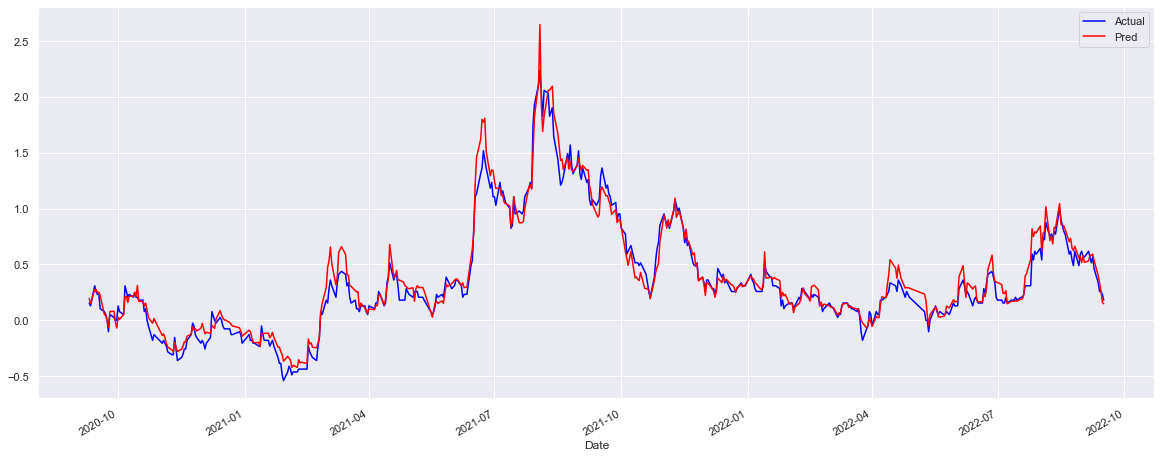

In [15]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['Pred'].plot(legend=True, color='red', figsize=(20,8))

### Evaluation

**Inverse transform scaled Close price**

In [16]:
from joblib import load

In [17]:
close_scaler = load('../feature_engineering/fren_close_scaler.bin')

In [18]:
inversed_pred = close_scaler.inverse_transform(np.array(predictions['Pred']).reshape(-1,1))
inversed_act = close_scaler.inverse_transform(np.array(predictions['Actual']).reshape(-1,1))

In [19]:
inversed = pd.DataFrame(inversed_pred)
inversed['Actual'] = inversed_act
inversed.rename({0:'Pred'}, axis=1, inplace=True)
inversed.index = test_labels.index
inversed.head(2)

,Pred,Actual
Date,,
2020-09-10,82.576241,81.0
2020-09-11,80.813675,80.0


**Plot error distribution**

In [20]:
def plotErrorHist(inversed_df):
    """
    Function to plot error histogram
    """
    error = inversed_df['Pred'] - inversed_df['Actual']
    plt.figure(figsize=(10,6))
    plt.hist(error, bins=25)
    plt.xlabel('Prediction Error [Close]')
    _ = plt.ylabel('Count')

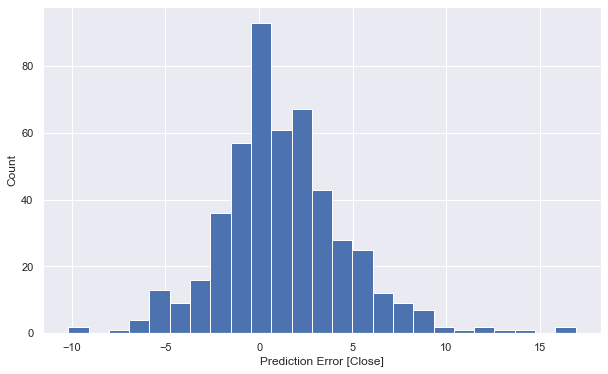

In [21]:
plotErrorHist(inversed)

**RMSE**

In [22]:
from statsmodels.tools.eval_measures import rmse

In [23]:
rmse(inversed['Pred'], inversed['Actual'])

3.6713559049430216

**MAPE**

In [24]:
# mape
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [25]:
mape(inversed['Actual'], inversed['Pred'])

2.996368130186252

**R-squared**

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(inversed['Actual'], inversed['Pred'])

0.9632551210523315

### Save Model

In [28]:
# Save model
model.save_model('./models/fren.json')